Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #60000
X_test = scaler.transform(X_test) #10000

In [ ]:
# pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import time
import seaborn as sns

def train_mlp_pipeline(X_train, y_train, X_test, y_test,
                       hidden_layer_sizes=(64,), activation='relu',
                       solver='adam', alpha=0.0001, learning_rate_init=0.001,
                       learning_rate = 'constant',
                       max_iter=200, early_stopping=True, batch_size=256, n_iter_no_change = 10):
  model = MLPClassifier(
      hidden_layer_sizes=hidden_layer_sizes,
      activation=activation,
      solver=solver,
      alpha=alpha,
      learning_rate_init=learning_rate_init,
      learning_rate = 'constant',
      max_iter=max_iter,
      early_stopping=early_stopping,
      random_state=42,
      n_iter_no_change = n_iter_no_change
    )
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()
  training_time = end_time - start_time
  y_train_pred = model.predict(X_train)
  y_pred = model.predict(X_test)

  acc_train = accuracy_score(y_train, y_train_pred)
  acc = accuracy_score(y_test, y_pred)

  cm = confusion_matrix(y_test, y_pred)

  if early_stopping:
    best_val_score = max(model.validation_scores_)
    print("Best Validation Score:", best_val_score)
  else:
    print("Early stopping not enabled; no validation scores available.")

  print("Train Accuracy", acc_train)
  print("Test Accuracy:", acc)
  print("training time", training_time)
  print("n_iter", model.n_iter_)


  # heat map
  plt.figure(figsize=(6,5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel("Predicted label")
  plt.ylabel("True label")
  plt.title("Confusion Matrix")
  plt.show()
  # loss curve
  plt.figure(figsize=(6,4))
  plt.plot(model.loss_curve_, marker='o')
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title("Loss Curve")
  plt.grid(True)
  plt.show()


  results = {
    'training accuracy' : acc_train,
    'testing accuracy': acc,
    'confusion_matrix': cm,
    'training_time': training_time,
    'n_iter': model.n_iter_,
    'loss_curve': model.loss_curve_
  }
  return results


Train Accuracy 0.9688166666666667
Test Accuracy: 0.8862
training time 69.28629326820374
n_iter 34
Best validation score: 0.8975


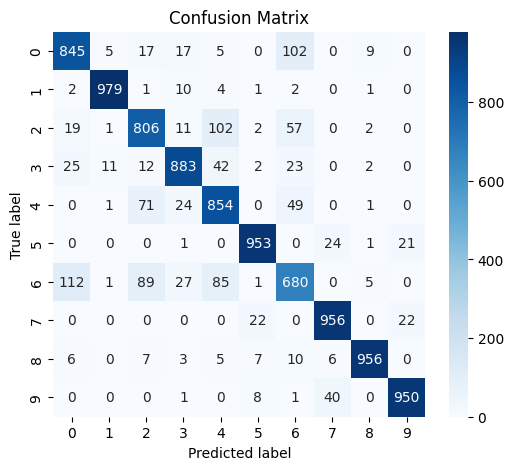

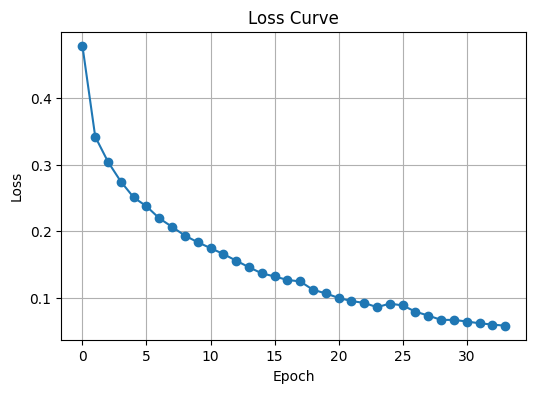

{'training accuracy': 0.9688166666666667,
 'testing accuracy': 0.8862,
 'validation score': 0.8975,
 'confusion_matrix': array([[845,   5,  17,  17,   5,   0, 102,   0,   9,   0],
        [  2, 979,   1,  10,   4,   1,   2,   0,   1,   0],
        [ 19,   1, 806,  11, 102,   2,  57,   0,   2,   0],
        [ 25,  11,  12, 883,  42,   2,  23,   0,   2,   0],
        [  0,   1,  71,  24, 854,   0,  49,   0,   1,   0],
        [  0,   0,   0,   1,   0, 953,   0,  24,   1,  21],
        [112,   1,  89,  27,  85,   1, 680,   0,   5,   0],
        [  0,   0,   0,   0,   0,  22,   0, 956,   0,  22],
        [  6,   0,   7,   3,   5,   7,  10,   6, 956,   0],
        [  0,   0,   0,   1,   0,   8,   1,  40,   0, 950]]),
 'training_time': 69.28629326820374,
 'n_iter': 34,
 'loss_curve': [np.float64(0.4778490907489584),
  np.float64(0.34165752692811513),
  np.float64(0.3039992471135214),
  np.float64(0.274460132941515),
  np.float64(0.2507842010652095),
  np.float64(0.2374913623727597),
  np.flo

In [ ]:
 # baseline
 train_mlp_pipeline(X_train, y_train, X_test, y_test)

Training one layer with size (1,)
Train Accuracy 0.4096166666666667
Test Accuracy: 0.4037
training time 11.228578090667725
n_iter 44
Best validation score: 0.4028333333333333


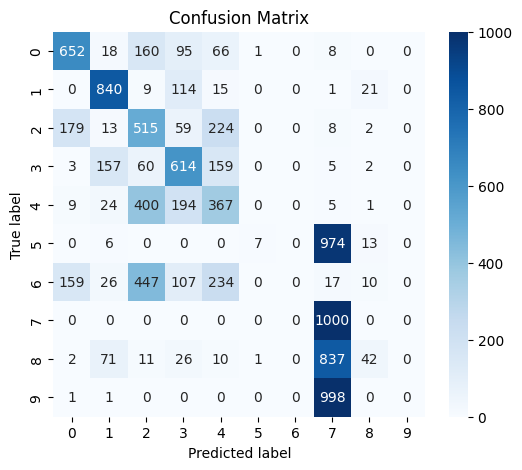

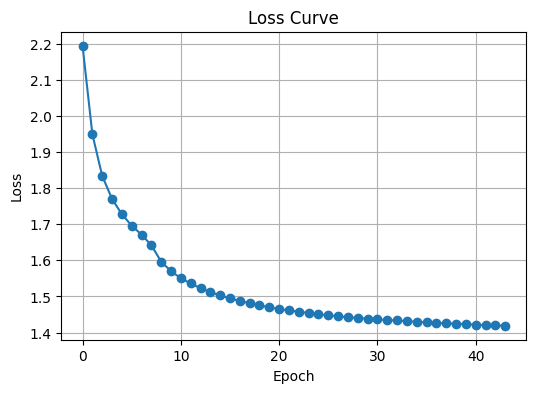

Training one layer with size (2,)
Train Accuracy 0.7406
Test Accuracy: 0.732
training time 33.99046492576599
n_iter 85
Best validation score: 0.7395


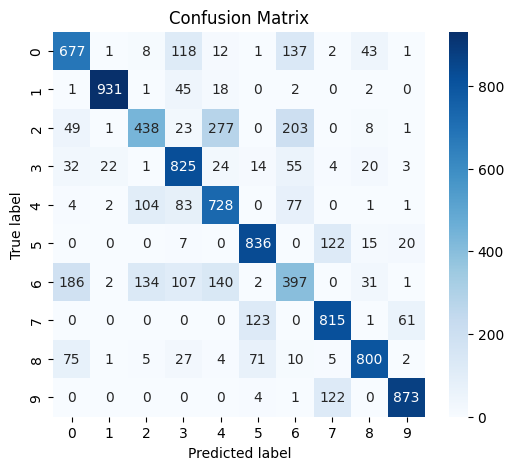

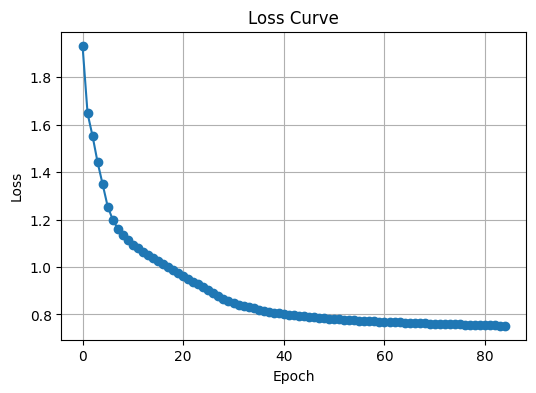

Training one layer with size (4,)
Train Accuracy 0.8373166666666667
Test Accuracy: 0.8135
training time 45.533097982406616
n_iter 84
Best validation score: 0.8208333333333333


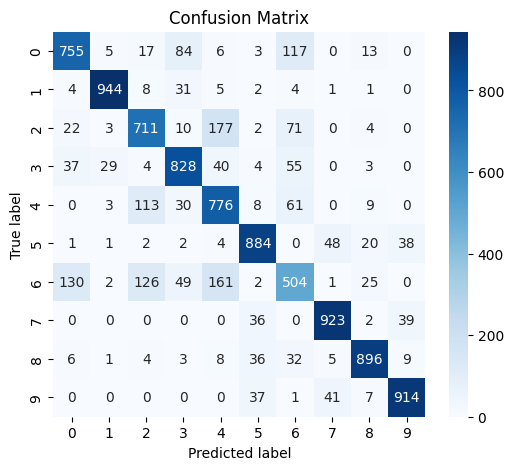

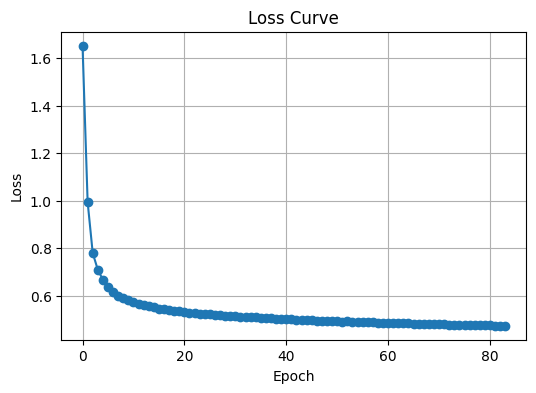

Training one layer with size (8,)
Train Accuracy 0.88195
Test Accuracy: 0.8502
training time 34.59278416633606
n_iter 61
Best validation score: 0.8601666666666666


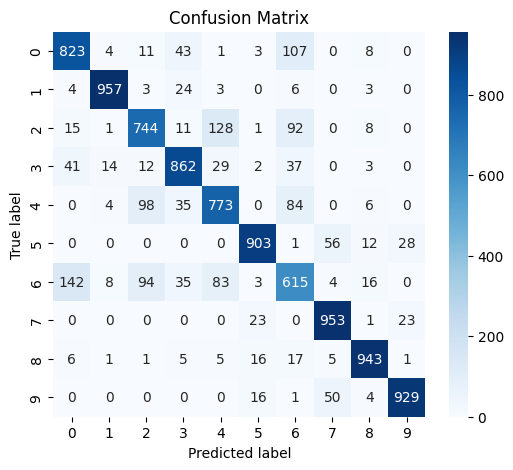

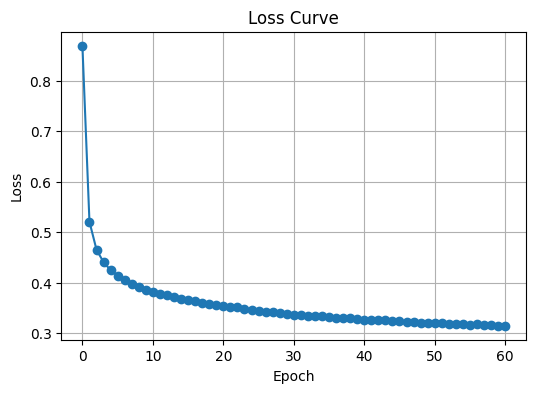

Training one layer with size (16,)
Train Accuracy 0.9009
Test Accuracy: 0.8641
training time 24.987849473953247
n_iter 32
Best validation score: 0.8718333333333333


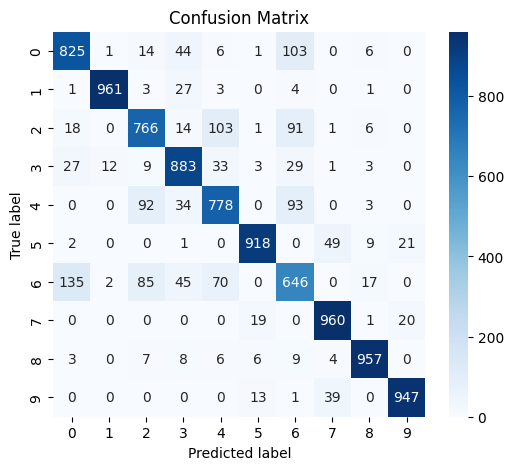

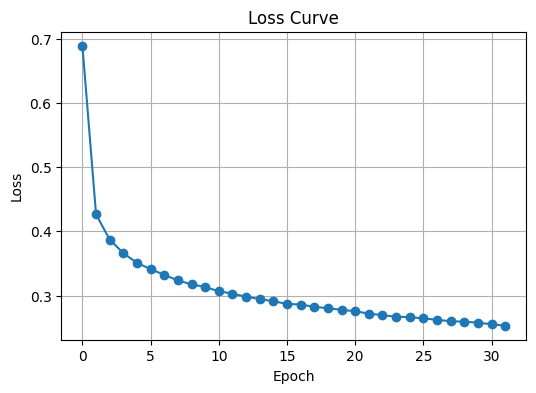

Training one layer with size (32,)
Train Accuracy 0.9296333333333333
Test Accuracy: 0.8732
training time 38.15112352371216
n_iter 35
Best validation score: 0.8855


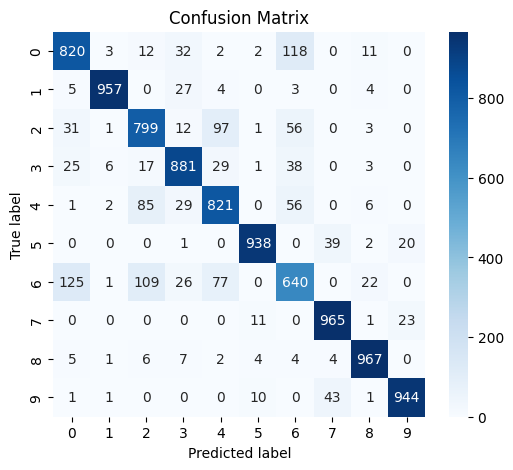

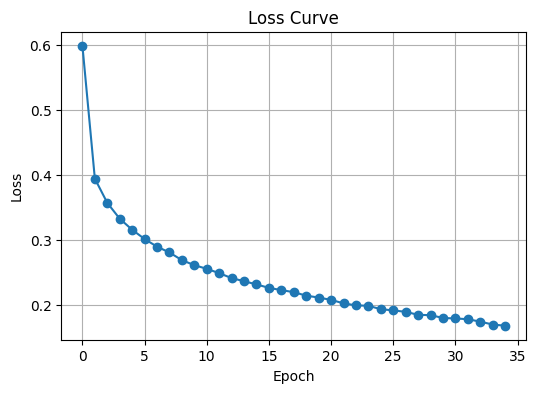

Training one layer with size (64,)
Train Accuracy 0.9280333333333334
Test Accuracy: 0.879
training time 30.34149146080017
n_iter 22
Best validation score: 0.8898333333333334


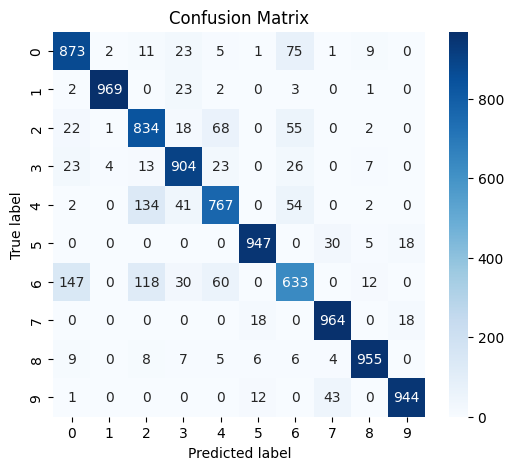

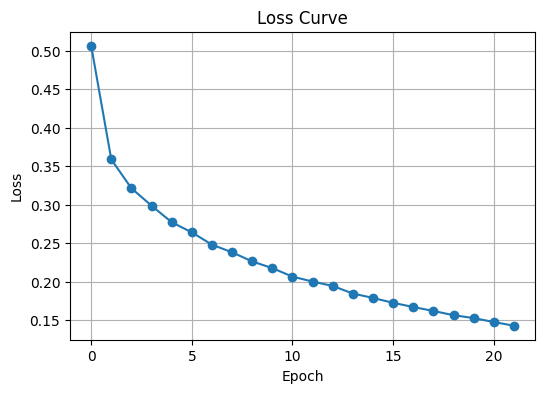

Training one layer with size (128,)
Train Accuracy 0.9688166666666667
Test Accuracy: 0.8862
training time 78.08449029922485
n_iter 34
Best validation score: 0.8975


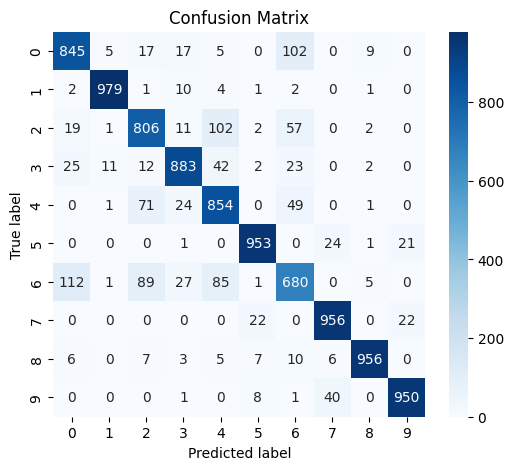

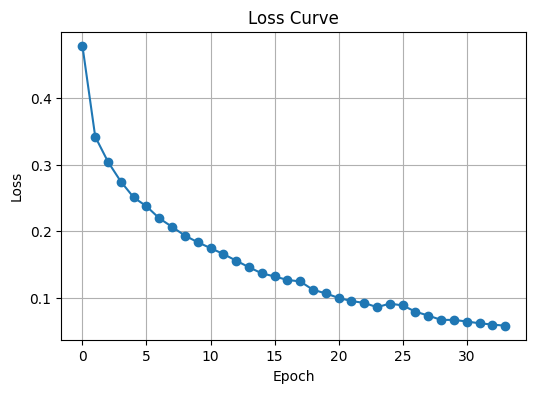

Training one layer with size (256,)
Train Accuracy 0.9691833333333333
Test Accuracy: 0.8911
training time 129.5423390865326
n_iter 31
Best validation score: 0.8958333333333334


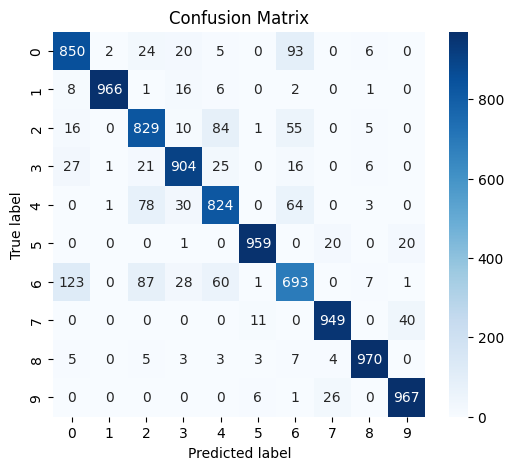

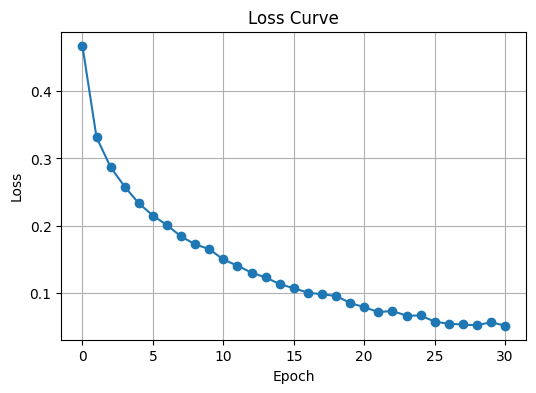

Training one layer with size (512,)
Train Accuracy 0.9701333333333333
Test Accuracy: 0.8901
training time 224.789160490036
n_iter 29
Best validation score: 0.9026666666666666


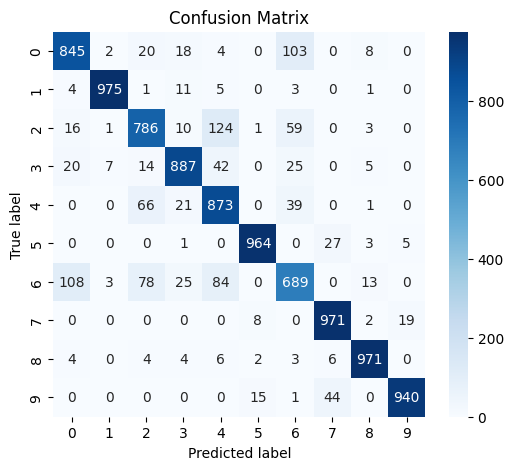

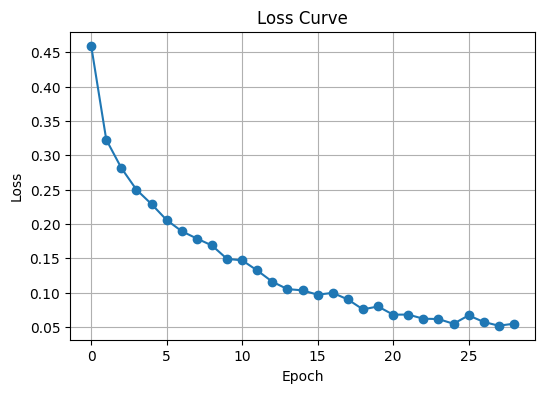

Training two layers with sizes (2, 1)
Train Accuracy 0.4416
Test Accuracy: 0.4362
training time 44.5945725440979
n_iter 105
Best validation score: 0.43466666666666665


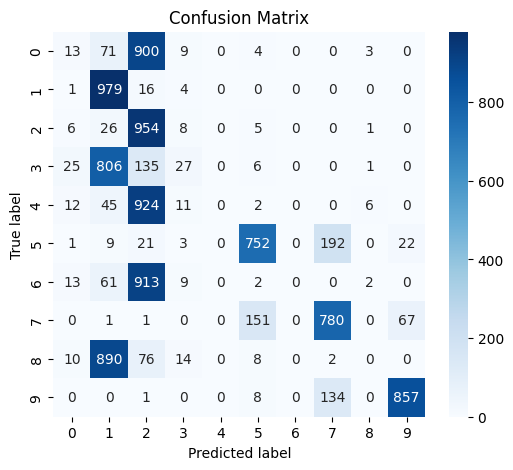

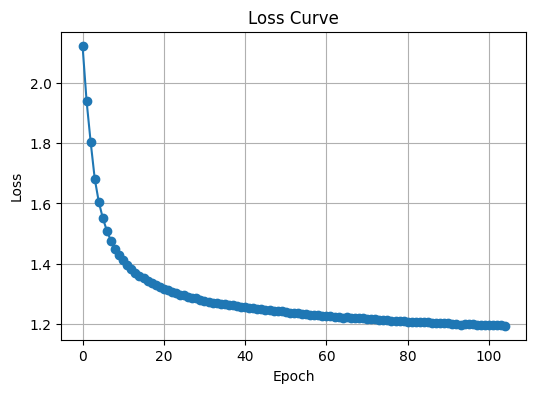

Training two layers with sizes (4, 2)
Train Accuracy 0.8019166666666667
Test Accuracy: 0.7819
training time 37.1436402797699
n_iter 64
Best validation score: 0.79


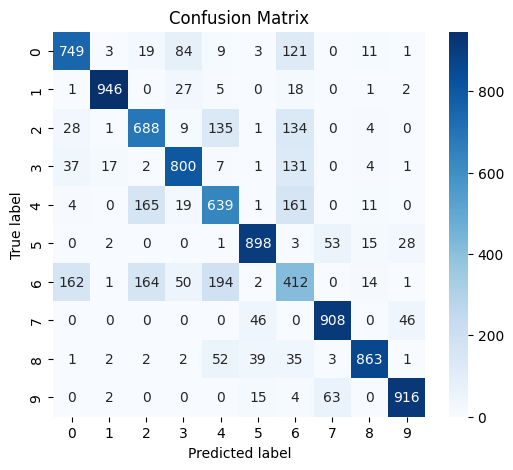

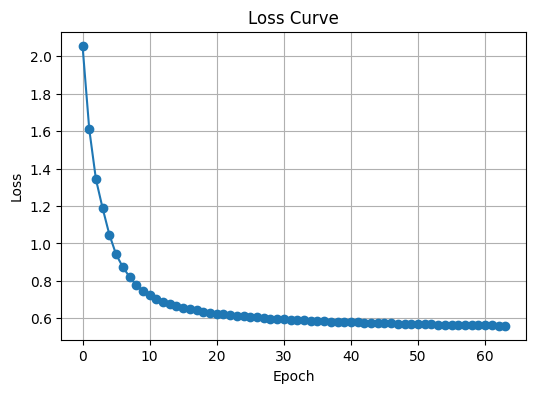

Training two layers with sizes (8, 4)
Train Accuracy 0.8639333333333333
Test Accuracy: 0.8357
training time 23.567174196243286
n_iter 36
Best validation score: 0.85


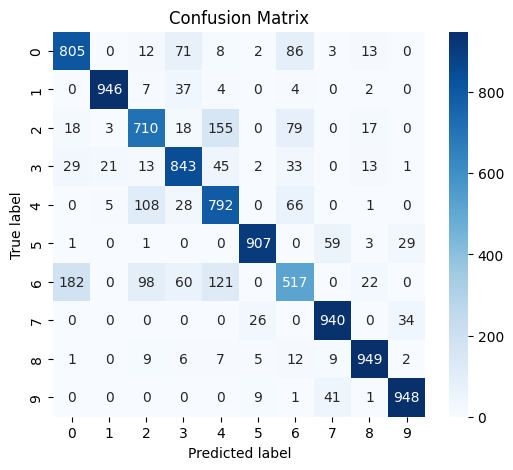

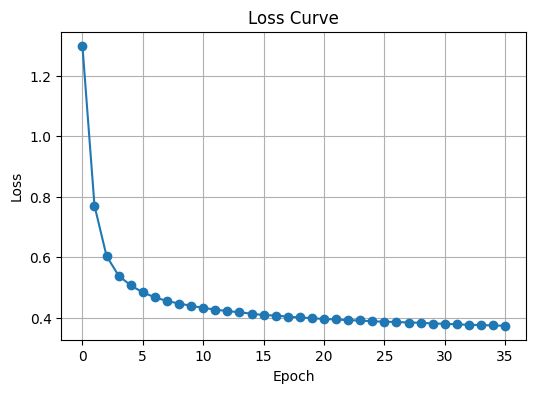

Training two layers with sizes (16, 8)
Train Accuracy 0.90745
Test Accuracy: 0.8623
training time 33.95896887779236
n_iter 44
Best validation score: 0.8743333333333333


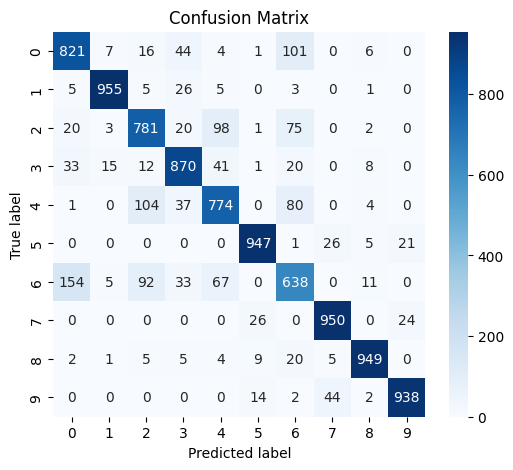

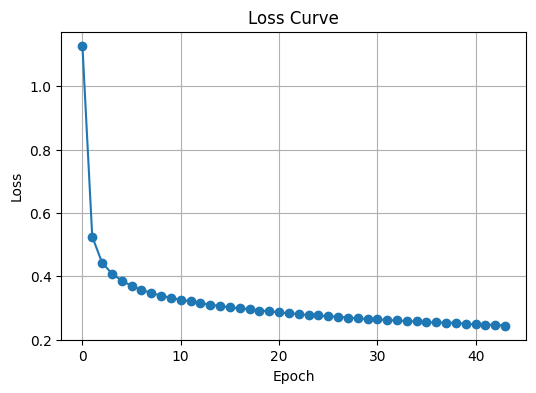

Training two layers with sizes (32, 16)
Train Accuracy 0.9048333333333334
Test Accuracy: 0.8676
training time 22.544549465179443
n_iter 21
Best validation score: 0.8765


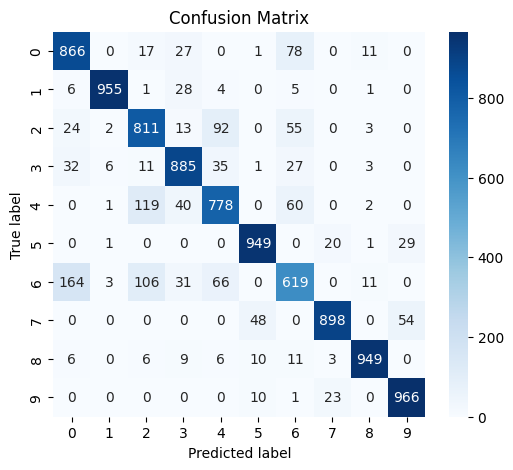

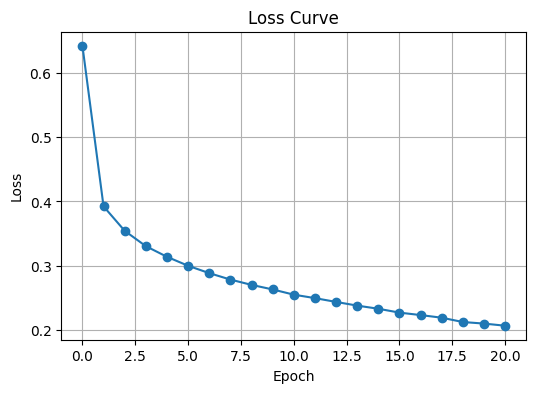

Training two layers with sizes (64, 32)
Train Accuracy 0.92235
Test Accuracy: 0.8745
training time 33.12567067146301
n_iter 20
Best validation score: 0.8873333333333333


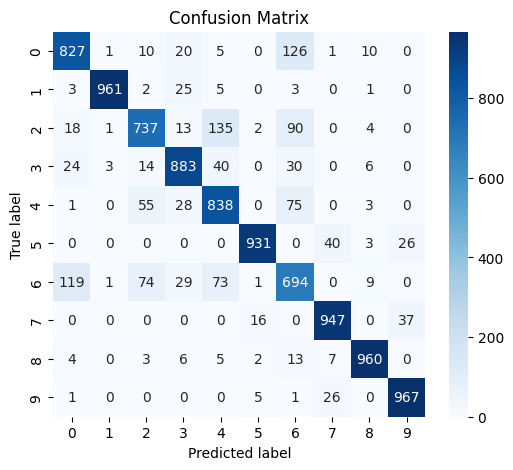

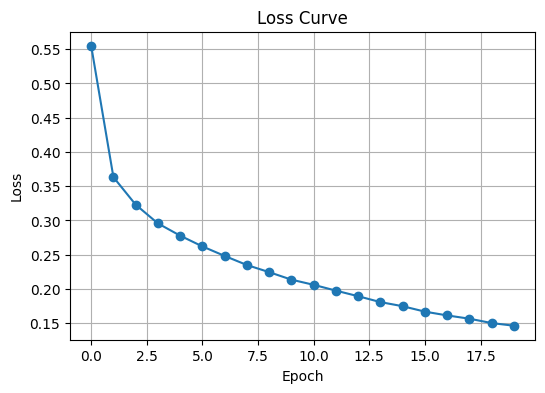

Training two layers with sizes (128, 64)
Train Accuracy 0.96185
Test Accuracy: 0.8833
training time 77.59334659576416
n_iter 29
Best validation score: 0.8951666666666667


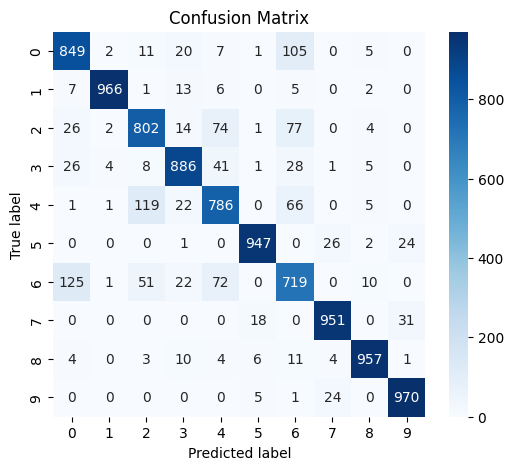

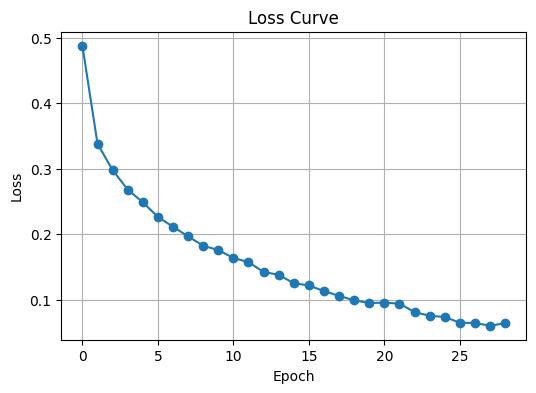

Training two layers with sizes (256, 128)
Train Accuracy 0.9639833333333333
Test Accuracy: 0.8894
training time 126.05667781829834
n_iter 25
Best validation score: 0.897


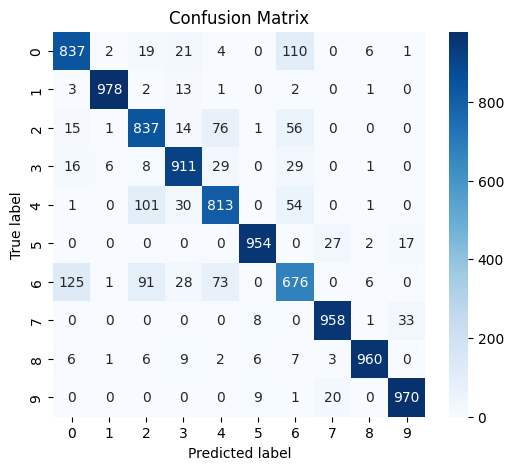

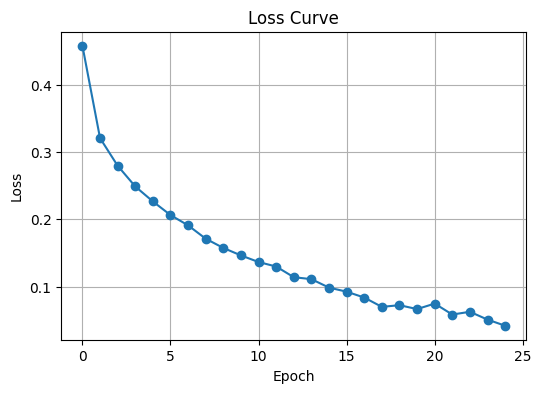

Training two layers with sizes (512, 256)
Train Accuracy 0.9708
Test Accuracy: 0.8915
training time 314.0488257408142
n_iter 29
Best validation score: 0.8986666666666666


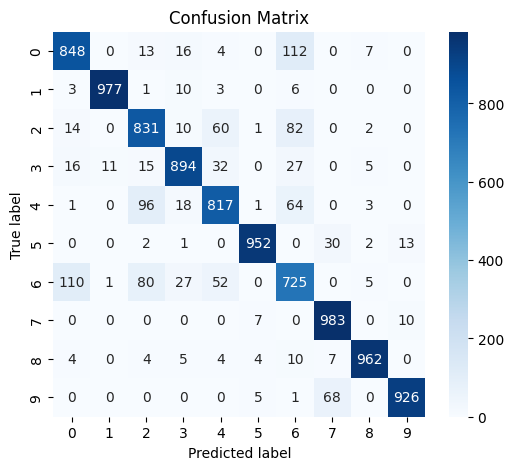

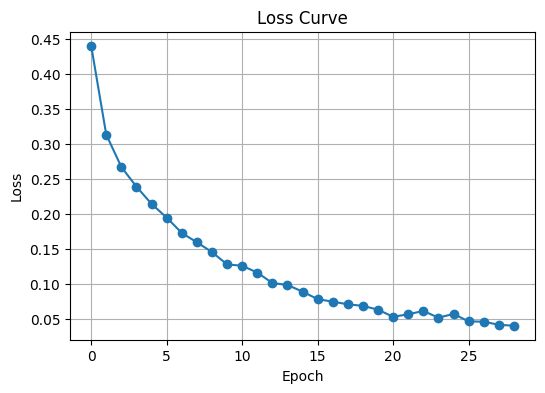

Training three layers with sizes (4, 2, 1)
Train Accuracy 0.49583333333333335
Test Accuracy: 0.4892
training time 23.357473850250244
n_iter 36
Best validation score: 0.4935


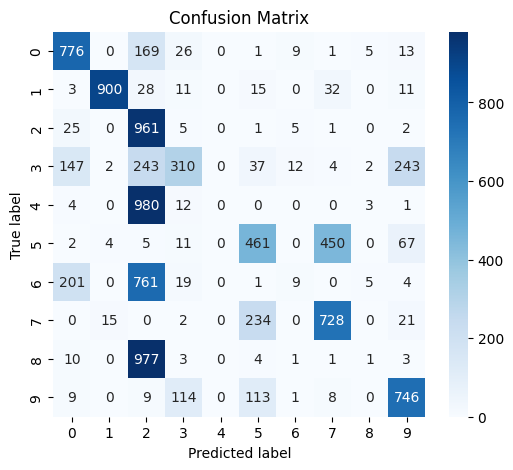

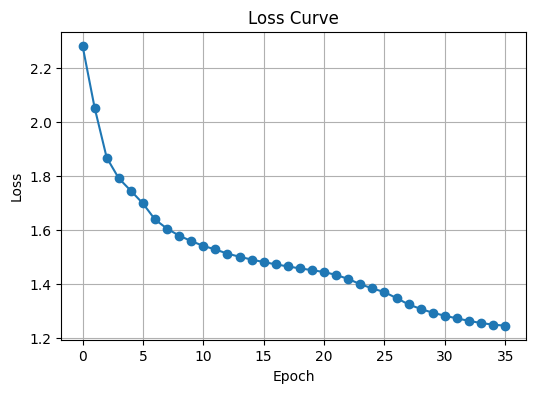

Training three layers with sizes (8, 4, 2)
Train Accuracy 0.8263333333333334
Test Accuracy: 0.8048
training time 35.39651703834534
n_iter 47
Best validation score: 0.814


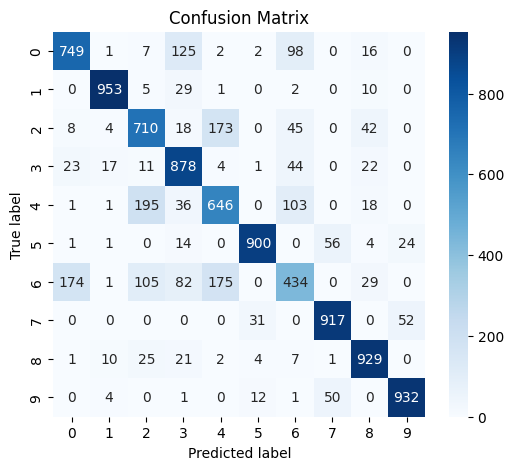

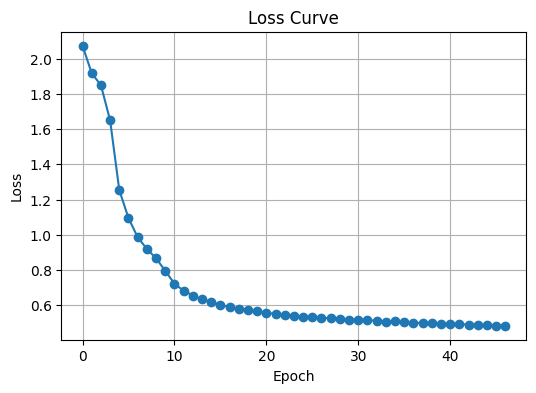

Training three layers with sizes (16, 8, 4)
Train Accuracy 0.8984833333333333
Test Accuracy: 0.849
training time 53.85065507888794
n_iter 63
Best validation score: 0.8558333333333333


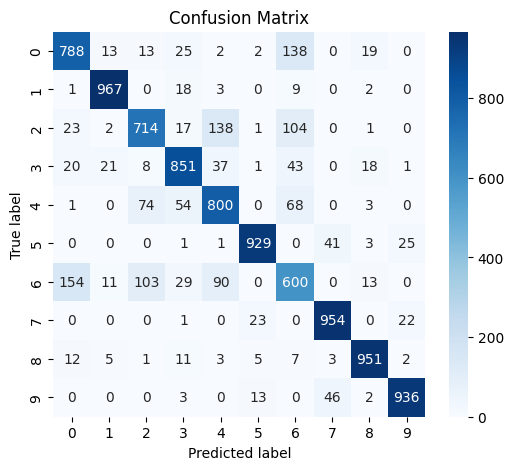

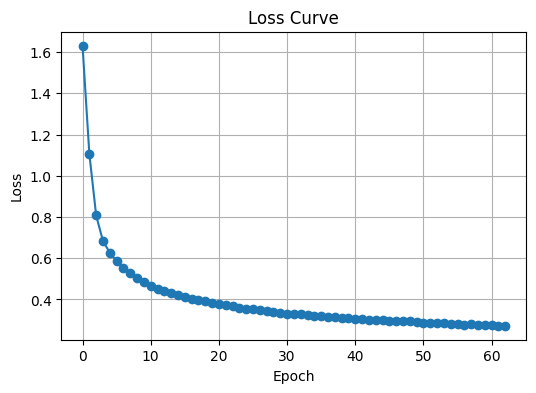

Training three layers with sizes (32, 16, 8)
Train Accuracy 0.9055833333333333
Test Accuracy: 0.8658
training time 21.43544316291809
n_iter 20
Best validation score: 0.8805


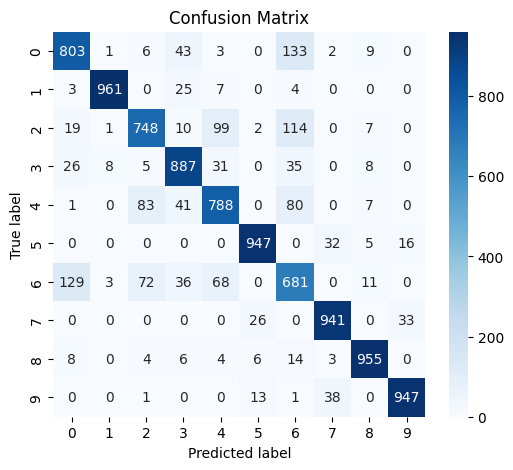

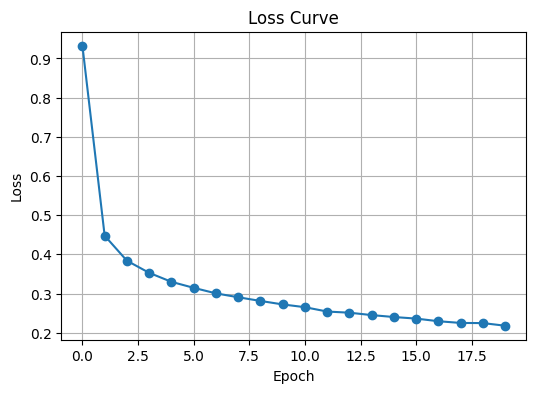

Training three layers with sizes (64, 32, 16)
Train Accuracy 0.9267833333333333
Test Accuracy: 0.8773
training time 35.144296407699585
n_iter 22
Best validation score: 0.8911666666666667


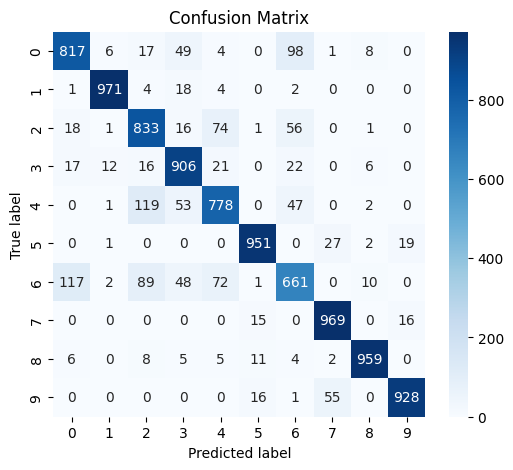

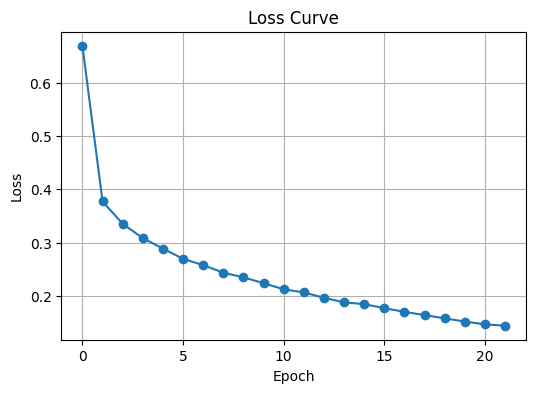

Training three layers with sizes (128, 64, 32)
Train Accuracy 0.9589
Test Accuracy: 0.8825
training time 77.32893705368042
n_iter 28
Best validation score: 0.8973333333333333


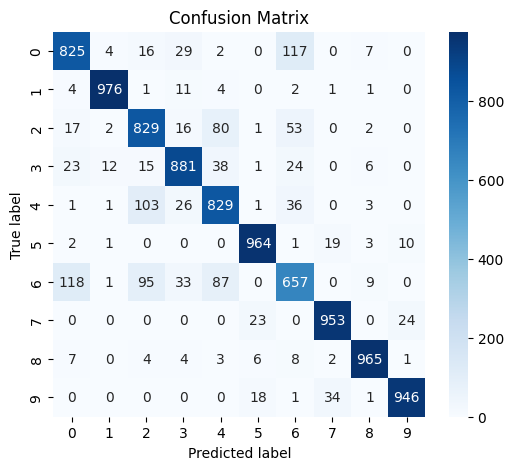

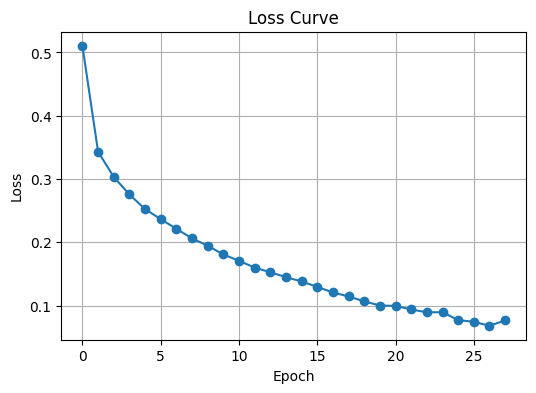

Training three layers with sizes (256, 128, 64)
Train Accuracy 0.9730166666666666
Test Accuracy: 0.889
training time 165.94943380355835
n_iter 31
Best validation score: 0.896


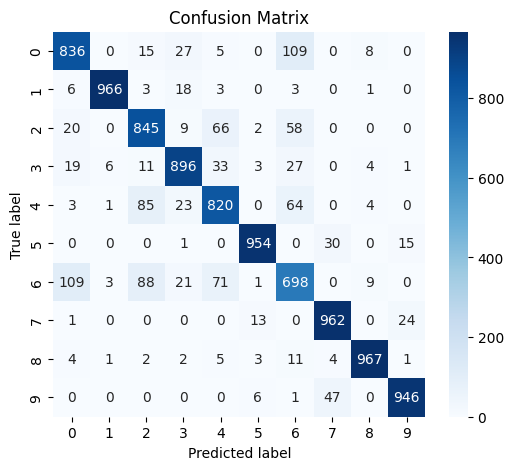

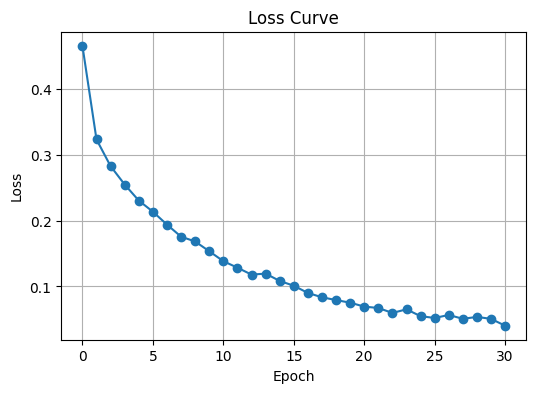

Training three layers with sizes (512, 256, 128)
Train Accuracy 0.9524333333333334
Test Accuracy: 0.8883
training time 247.37518525123596
n_iter 21
Best validation score: 0.8996666666666666


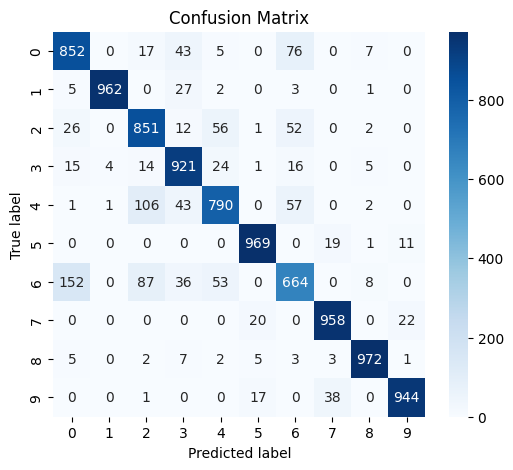

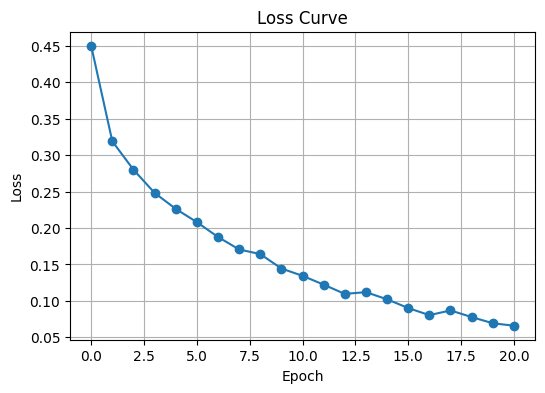

In [ ]:
# nunmbers of hidden layers and neurons

results_dict = {
    '1-layer': [],
    '2-layer': [],
    '3-layer': []
}

# --- one hidden layer ---
for n in [2**i for i in range(0, 10)]:
    print(f"Training one layer with size ({n},)")
    result = train_mlp_pipeline(
        X_train, y_train, X_test, y_test,
        hidden_layer_sizes=(n,)
    )
    result['hidden_layer'] = (n,)
    results_dict['1-layer'].append(result)

# --- two hidden layers ---
for n in [2**i for i in range(0, 9)]:
    print(f"Training two layers with sizes ({2*n}, {n})")
    result = train_mlp_pipeline(
        X_train, y_train, X_test, y_test,
        hidden_layer_sizes=(2*n, n)
    )
    result['hidden_layer'] = (2*n, n)
    results_dict['2-layer'].append(result)

# --- three hidden layers ---
for n in [2**i for i in range(0, 8)]:
    print(f"Training three layers with sizes ({4*n}, {2*n}, {n})")
    result = train_mlp_pipeline(
        X_train, y_train, X_test, y_test,
        hidden_layer_sizes=(4*n, 2*n, n)
    )
    result['hidden_layer'] = (4*n, 2*n, n)
    results_dict['3-layer'].append(result)


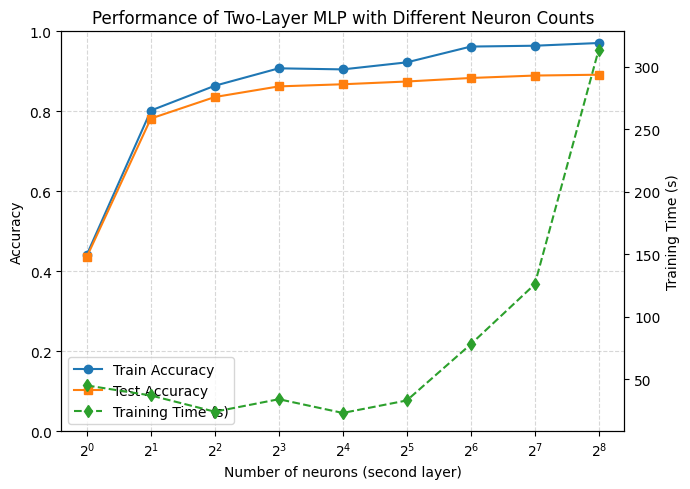

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

neuron_nums = np.array([1,2,4,8,16,32,64,128,256])
train_acc = np.array([0.4416,0.8019,0.8639,0.9075,0.9048,0.9224,0.9619,0.9640,0.9708])
test_acc  = np.array([0.4362,0.7819,0.8357,0.8623,0.8676,0.8745,0.8833,0.8894,0.8915])
training_time = np.array([45,37,24,34,23,33,78,126,314])

fig, ax1 = plt.subplots(figsize=(7,5))

# Plot train & test accuracy
ax1.plot(neuron_nums, train_acc, 'o-', label='Train Accuracy', color='tab:blue')
ax1.plot(neuron_nums, test_acc, 's-', label='Test Accuracy', color='tab:orange')
ax1.set_xlabel('Number of neurons (second layer)')
ax1.set_ylabel('Accuracy')
ax1.set_xscale('log', base=2)
ax1.set_xticks(neuron_nums)


exponents = np.log2(neuron_nums).astype(int)
ax1.set_xticklabels([f'$2^{e}$' for e in exponents])

ax1.set_ylim(0,1)
ax1.grid(True, linestyle='--', alpha=0.5)

# Plot training time on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(neuron_nums, training_time, 'd--', label='Training Time (s)', color='tab:green')
ax2.set_ylabel('Training Time (s)')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="best")

plt.title("Performance of Two-Layer MLP with Different Neuron Counts")
plt.tight_layout()
plt.show()


logistic
Train Accuracy 0.9377166666666666
Test Accuracy: 0.8788
training time 49.960068702697754
n_iter 37
Best validation score: 0.8863333333333333


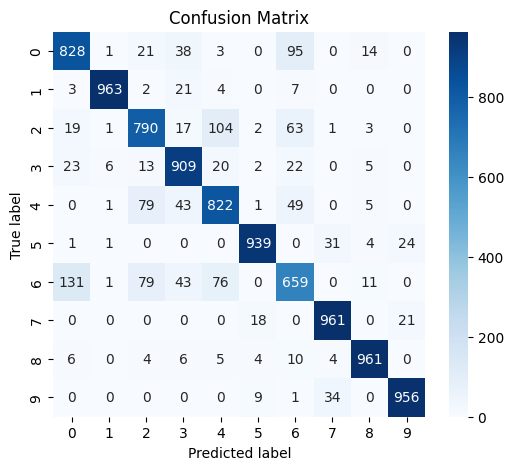

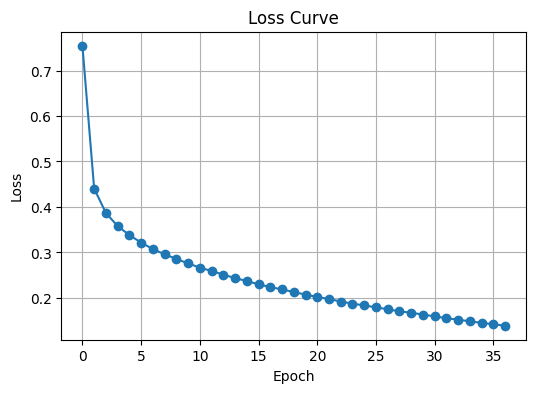

tanh
Train Accuracy 0.91845
Test Accuracy: 0.8718
training time 30.127553462982178
n_iter 19
Best validation score: 0.8826666666666667


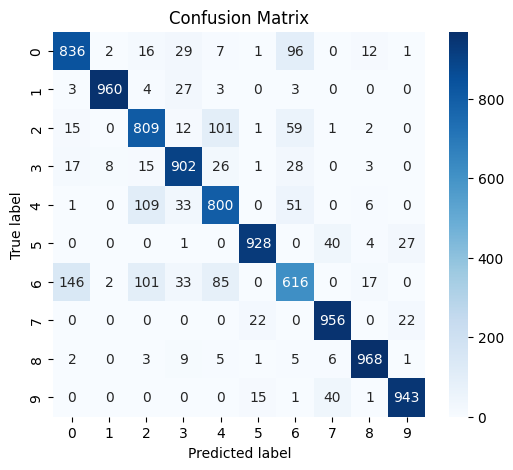

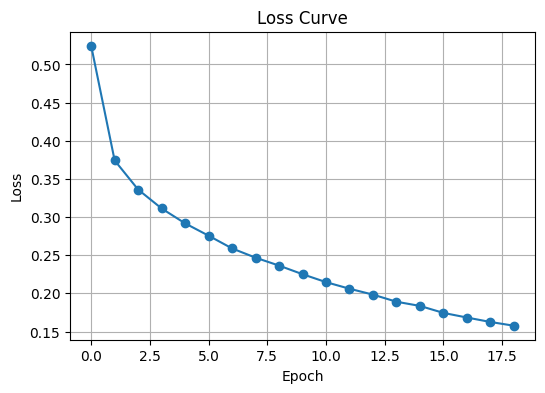

relu
Train Accuracy 0.9280333333333334
Test Accuracy: 0.879
training time 28.85929775238037
n_iter 22
Best validation score: 0.8898333333333334


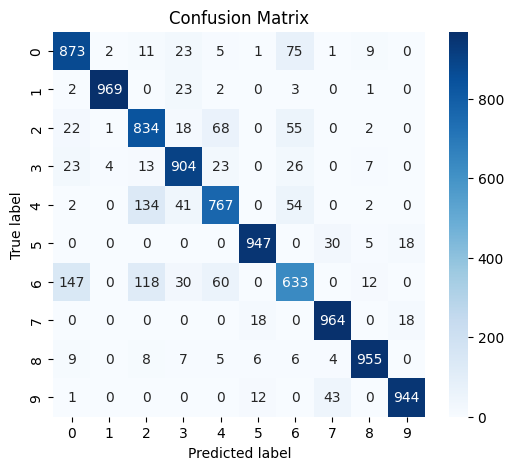

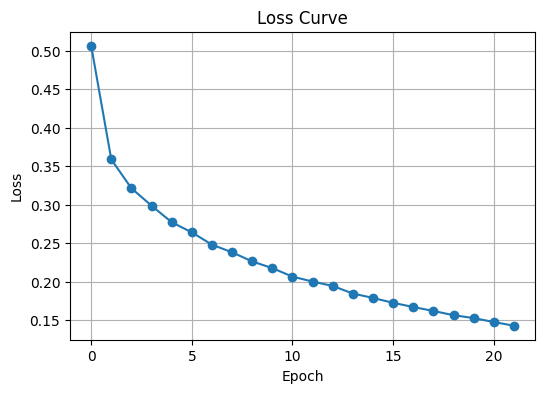

{'training accuracy': 0.9280333333333334,
 'testing accuracy': 0.879,
 'validation score': 0.8898333333333334,
 'confusion_matrix': array([[873,   2,  11,  23,   5,   1,  75,   1,   9,   0],
        [  2, 969,   0,  23,   2,   0,   3,   0,   1,   0],
        [ 22,   1, 834,  18,  68,   0,  55,   0,   2,   0],
        [ 23,   4,  13, 904,  23,   0,  26,   0,   7,   0],
        [  2,   0, 134,  41, 767,   0,  54,   0,   2,   0],
        [  0,   0,   0,   0,   0, 947,   0,  30,   5,  18],
        [147,   0, 118,  30,  60,   0, 633,   0,  12,   0],
        [  0,   0,   0,   0,   0,  18,   0, 964,   0,  18],
        [  9,   0,   8,   7,   5,   6,   6,   4, 955,   0],
        [  1,   0,   0,   0,   0,  12,   0,  43,   0, 944]]),
 'training_time': 28.85929775238037,
 'n_iter': 22,
 'loss_curve': [np.float64(0.5066122262089645),
  np.float64(0.35870956893420847),
  np.float64(0.3212581152443881),
  np.float64(0.2985727652288061),
  np.float64(0.2771167514343164),
  np.float64(0.263935120361314

In [ ]:
print("logistic")
train_mlp_pipeline(X_train, y_train, X_test, y_test, activation='logistic')
print("tanh")
train_mlp_pipeline(X_train, y_train, X_test, y_test, activation='tanh')
print("relu")
train_mlp_pipeline(X_train, y_train, X_test, y_test, activation='relu')

adam
learning rate: 0.1
Train Accuracy 0.79515
Test Accuracy: 0.7801
training time 20.940958976745605
n_iter 15
Best validation score: 0.7888333333333334


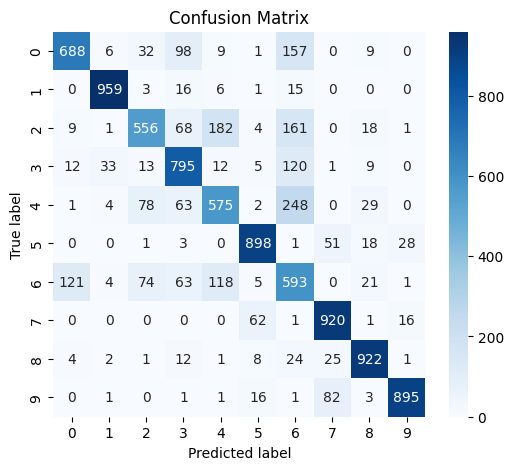

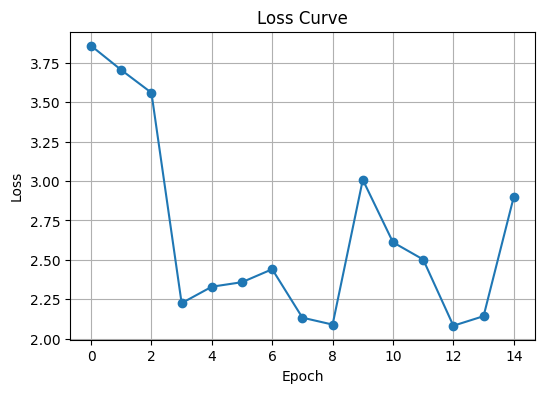

learning rate: 0.03162277660168379
Train Accuracy 0.8504
Test Accuracy: 0.8236
training time 22.636223554611206
n_iter 18
Best validation score: 0.8353333333333334


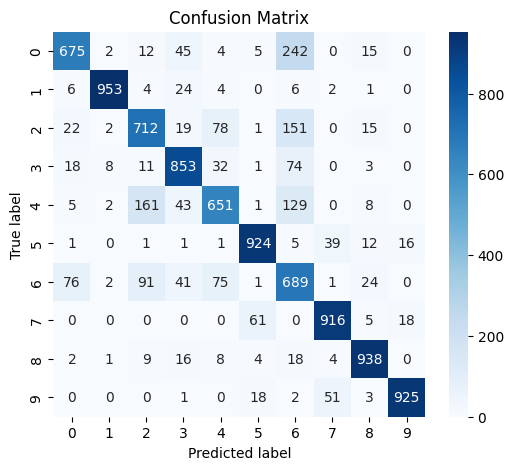

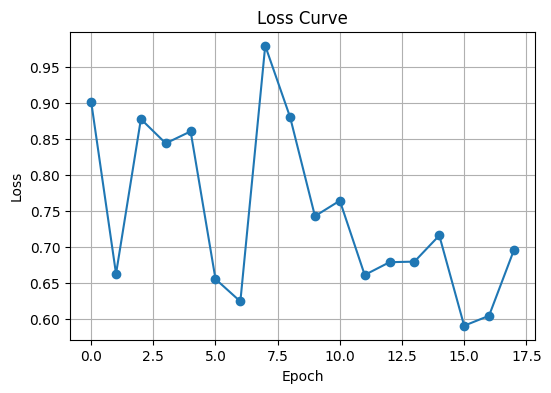

learning rate: 0.01
Train Accuracy 0.9108
Test Accuracy: 0.8676
training time 26.50377082824707
n_iter 22
Best validation score: 0.8771666666666667


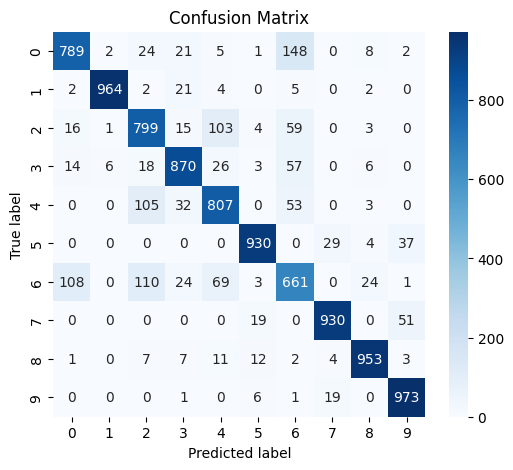

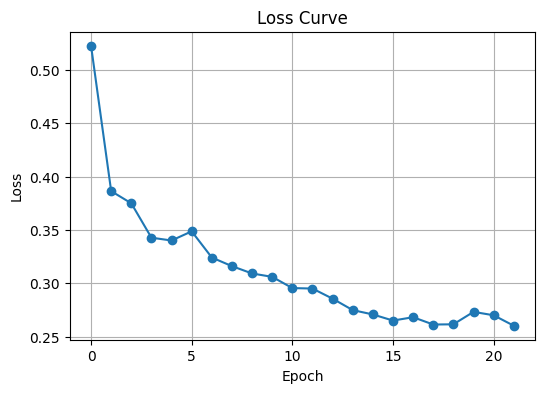

learning rate: 0.0031622776601683794
Train Accuracy 0.9305166666666667
Test Accuracy: 0.8777
training time 29.30862545967102
n_iter 22
Best validation score: 0.8865


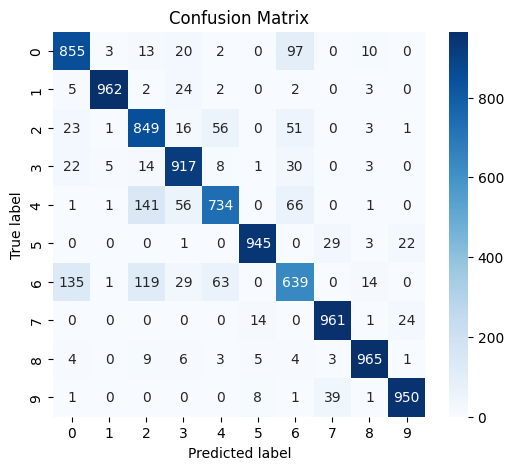

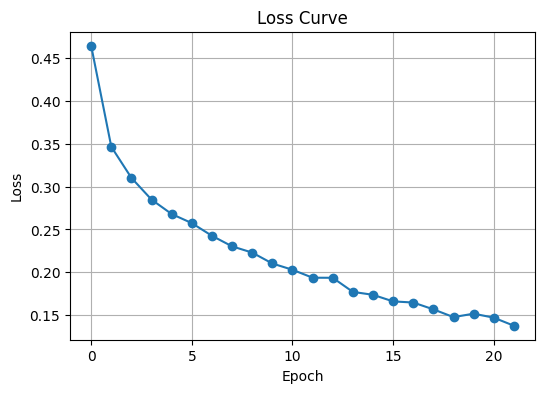

learning rate: 0.001
Train Accuracy 0.9280333333333334
Test Accuracy: 0.879
training time 29.132808923721313
n_iter 22
Best validation score: 0.8898333333333334


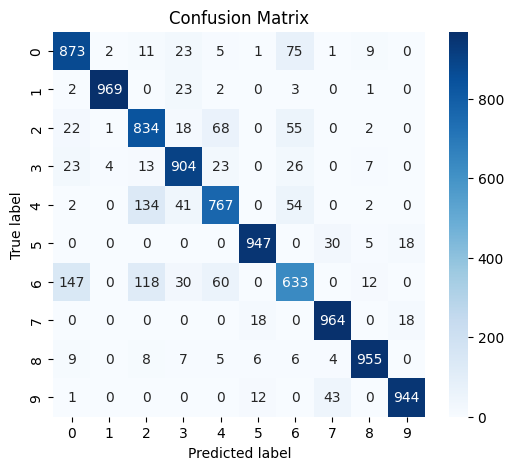

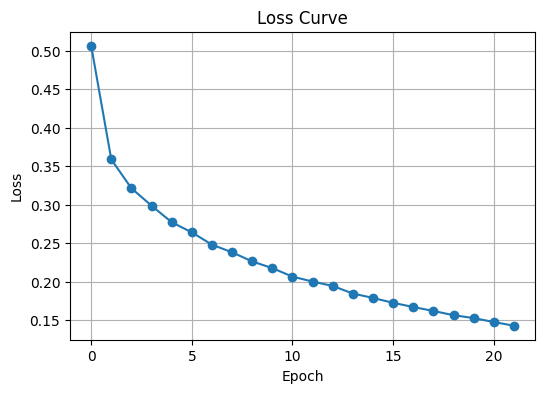

learning rate: 0.00031622776601683794
Train Accuracy 0.9435666666666667
Test Accuracy: 0.8786
training time 58.36354327201843
n_iter 48
Best validation score: 0.8898333333333334


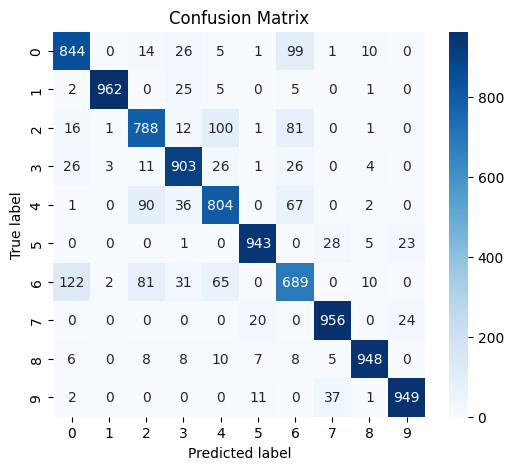

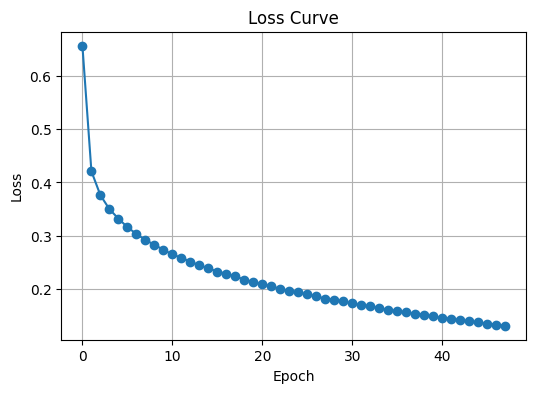

learning rate: 0.0001
Train Accuracy 0.93185
Test Accuracy: 0.8791
training time 92.38975024223328
n_iter 77
Best validation score: 0.892


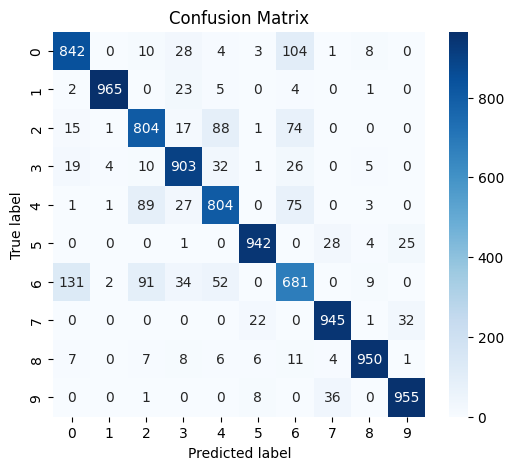

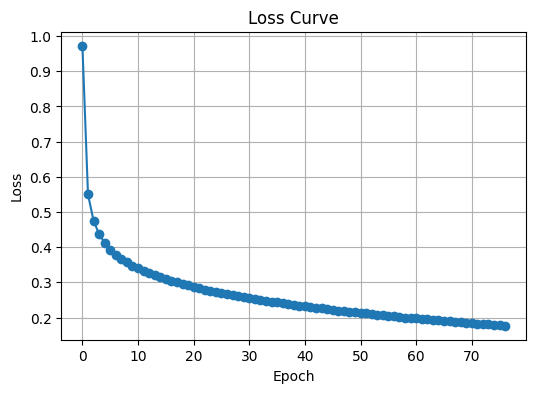

learning rate: 3.1622776601683795e-05
Train Accuracy 0.9043333333333333
Test Accuracy: 0.8707
training time 107.58116030693054
n_iter 87
Best validation score: 0.885


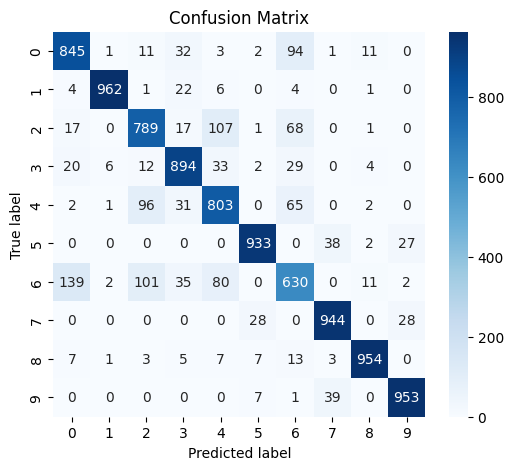

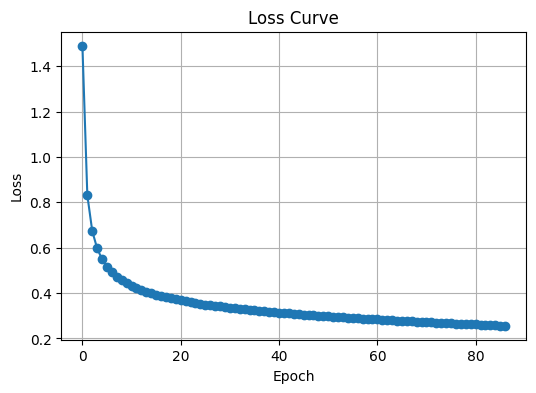

learning rate: 1e-05
Train Accuracy 0.8945
Test Accuracy: 0.8663
training time 217.52908611297607
n_iter 168
Best validation score: 0.8785


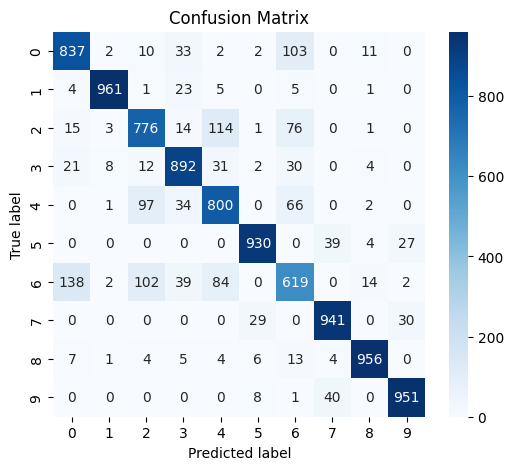

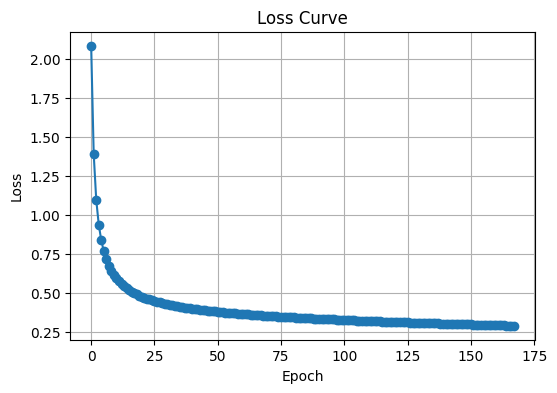

In [ ]:
# solver&learning rate (adam)

import numpy as np

lrs = np.logspace(-1, -5, num=9)
print("adam")
for lr in lrs:
  print(f"learning rate: {lr}")
  train_mlp_pipeline(X_train, y_train, X_test, y_test, solver='adam', learning_rate_init=lr)

learning rate: 0.1
sgd+constant
Train Accuracy 0.9286166666666666
Test Accuracy: 0.8686
training time 26.627338886260986
n_iter 24
Best validation score: 0.8821666666666667


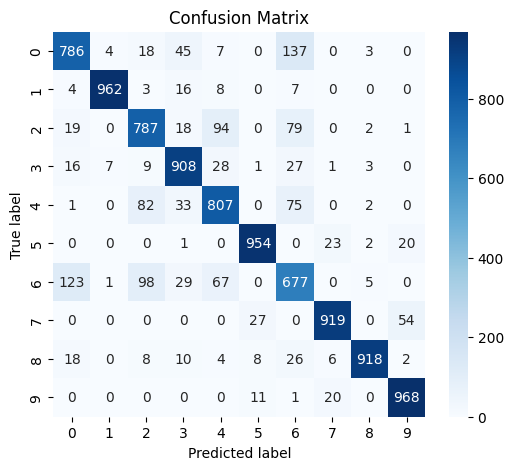

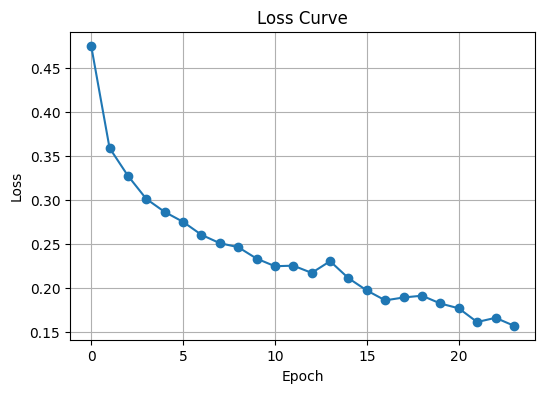

sgd+invscaling
Train Accuracy 0.9286166666666666
Test Accuracy: 0.8686
training time 26.52526831626892
n_iter 24
Best validation score: 0.8821666666666667


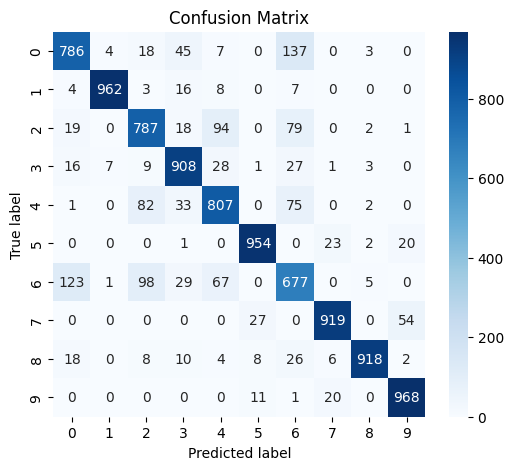

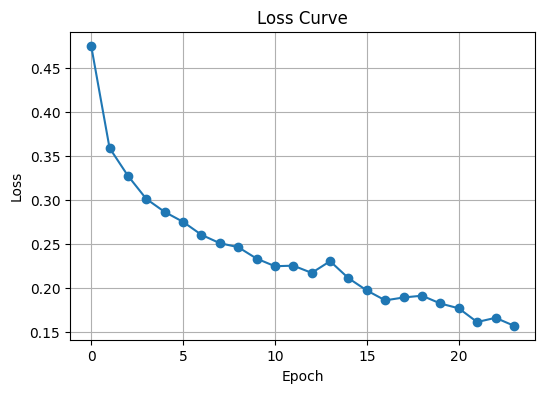

sgd+adaptive
Train Accuracy 0.9286166666666666
Test Accuracy: 0.8686
training time 26.547533750534058
n_iter 24
Best validation score: 0.8821666666666667


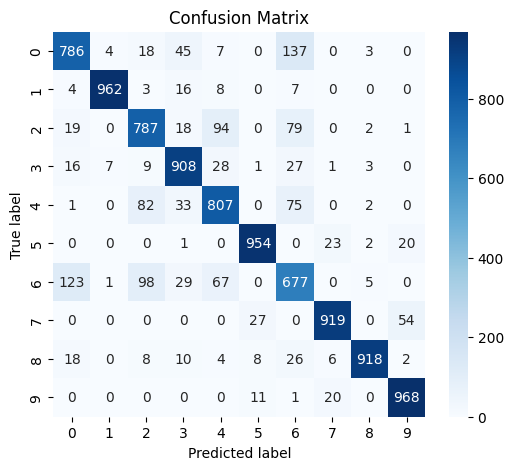

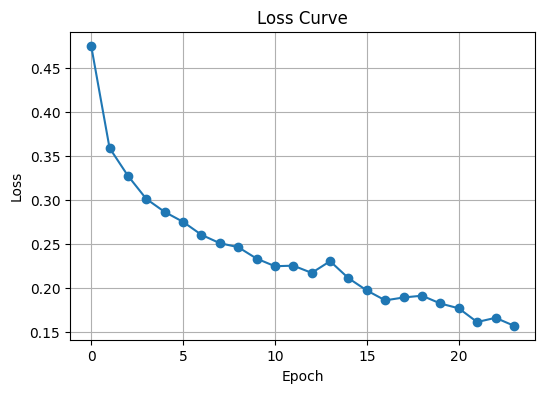

learning rate: 0.03162277660168379
sgd+constant
Train Accuracy 0.923
Test Accuracy: 0.8752
training time 23.619413137435913
n_iter 19
Best validation score: 0.8886666666666667


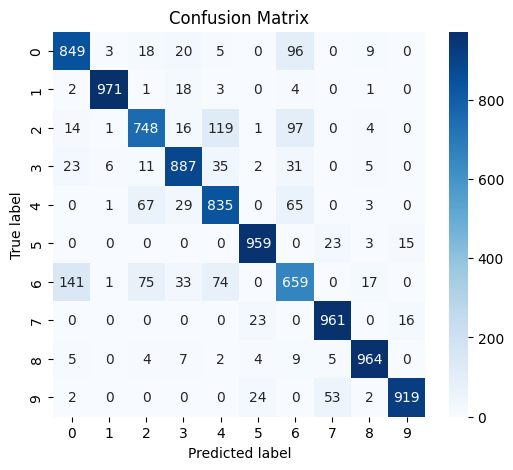

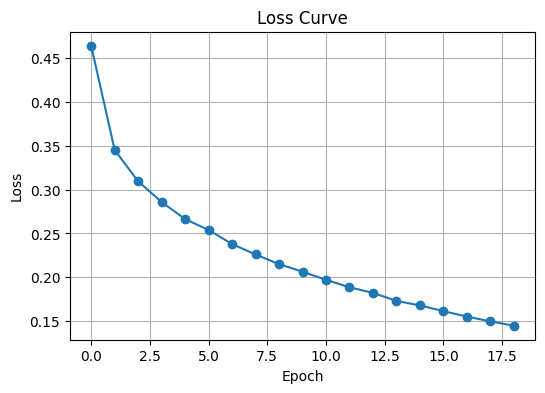

sgd+invscaling
Train Accuracy 0.923
Test Accuracy: 0.8752
training time 20.105385780334473
n_iter 19
Best validation score: 0.8886666666666667


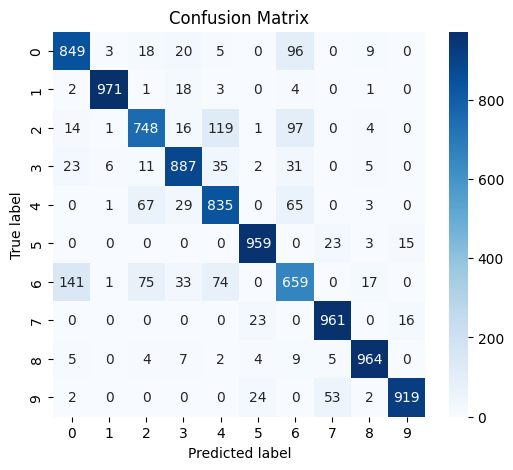

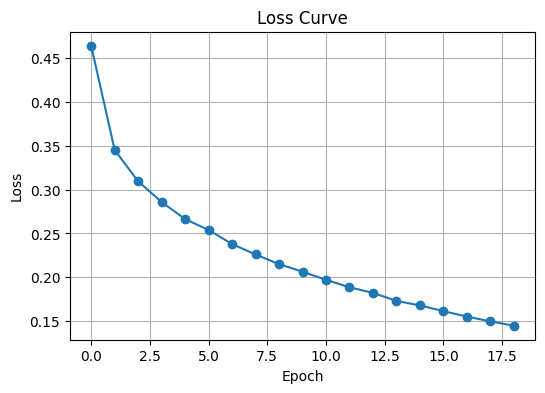

sgd+adaptive
Train Accuracy 0.923
Test Accuracy: 0.8752
training time 20.49020504951477
n_iter 19
Best validation score: 0.8886666666666667


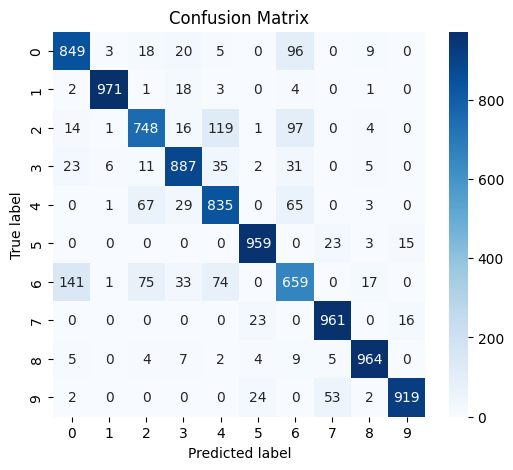

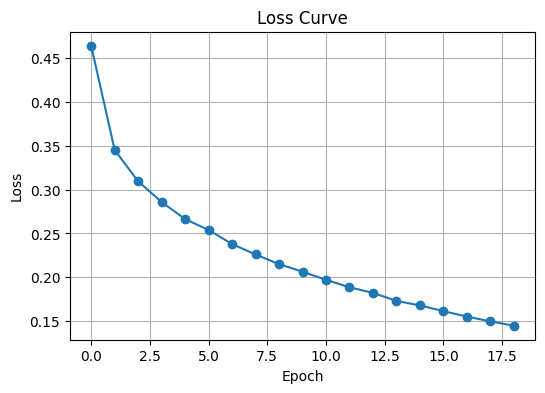

learning rate: 0.01
sgd+constant
Train Accuracy 0.93825
Test Accuracy: 0.879
training time 38.09090852737427
n_iter 33
Best validation score: 0.8913333333333333


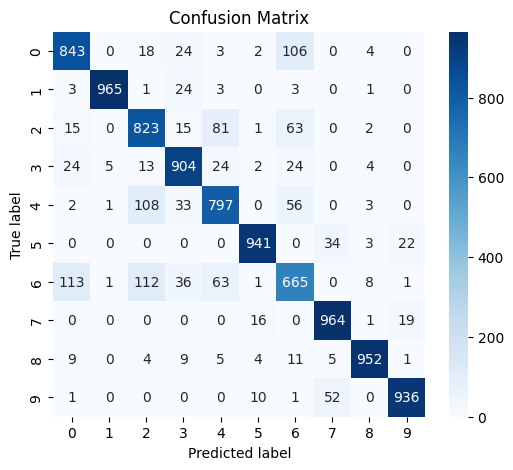

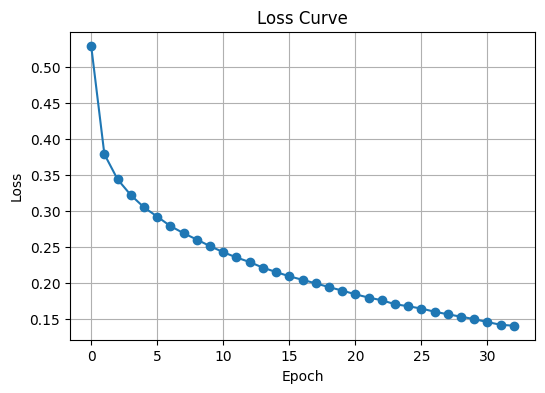

sgd+invscaling
Train Accuracy 0.93825
Test Accuracy: 0.879
training time 37.17212247848511
n_iter 33
Best validation score: 0.8913333333333333


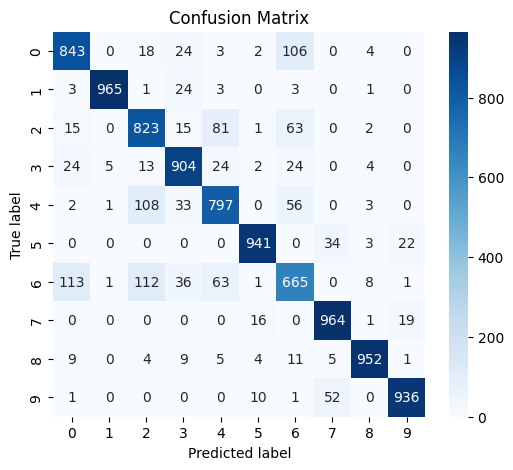

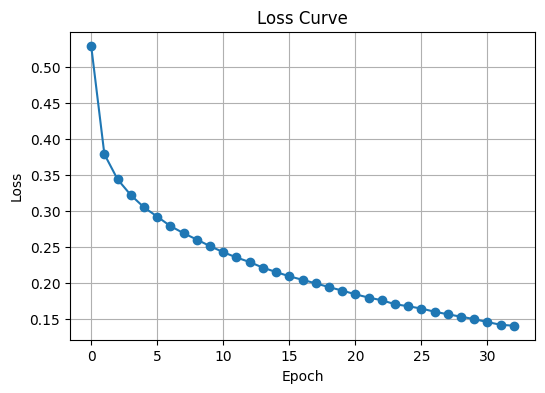

sgd+adaptive
Train Accuracy 0.93825
Test Accuracy: 0.879
training time 37.54579305648804
n_iter 33
Best validation score: 0.8913333333333333


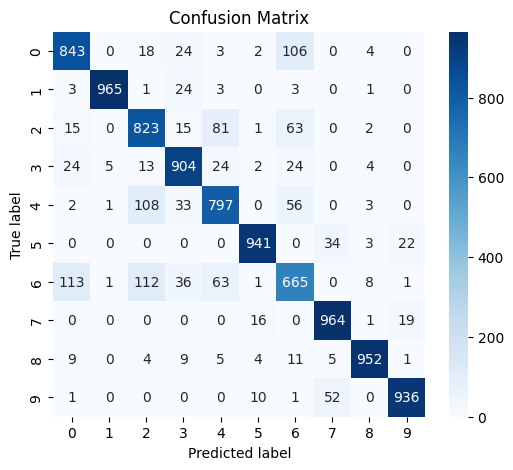

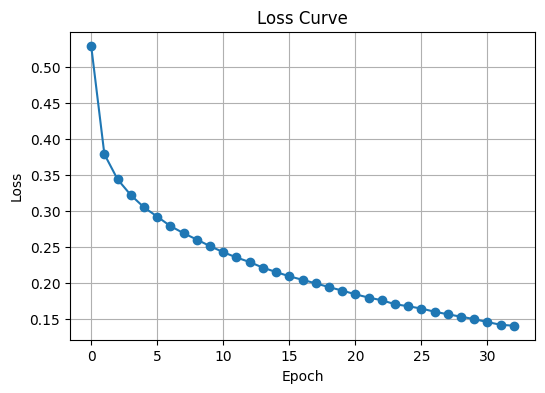

learning rate: 0.0031622776601683794
sgd+constant
Train Accuracy 0.9168833333333334
Test Accuracy: 0.8768
training time 43.47783422470093
n_iter 40
Best validation score: 0.889


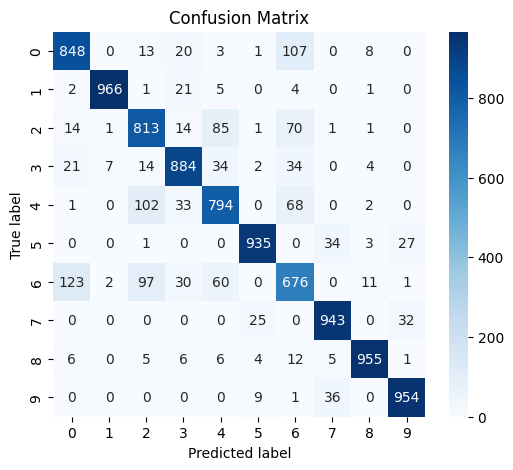

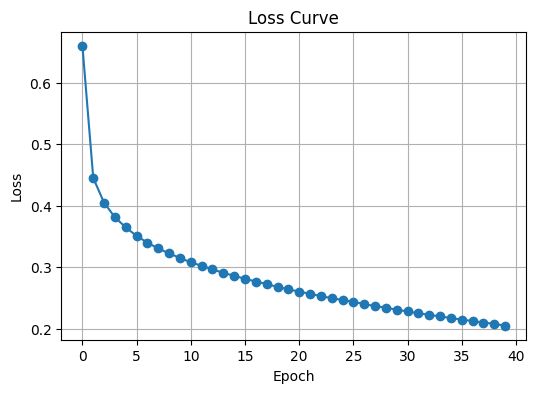

sgd+invscaling
Train Accuracy 0.9168833333333334
Test Accuracy: 0.8768
training time 45.7590012550354
n_iter 40
Best validation score: 0.889


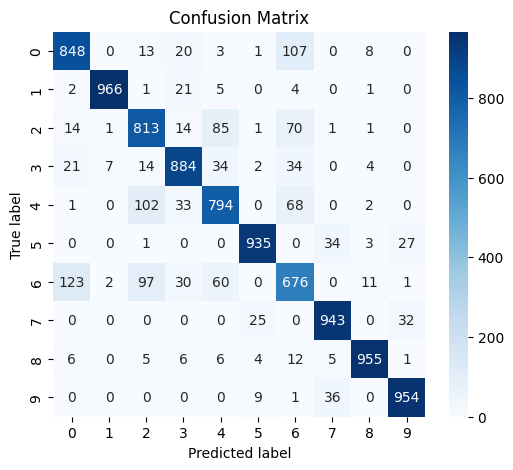

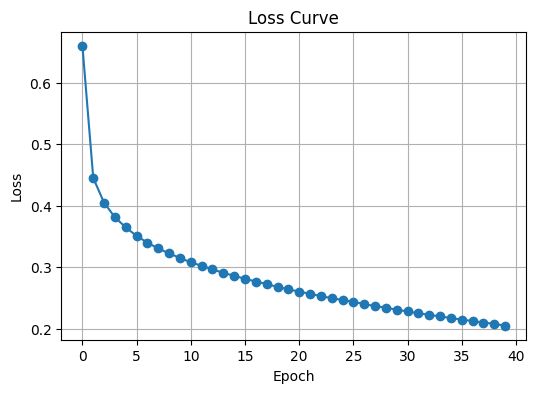

sgd+adaptive
Train Accuracy 0.9168833333333334
Test Accuracy: 0.8768
training time 43.67179250717163
n_iter 40
Best validation score: 0.889


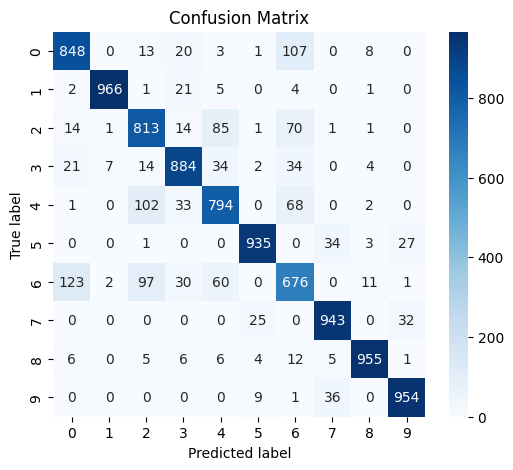

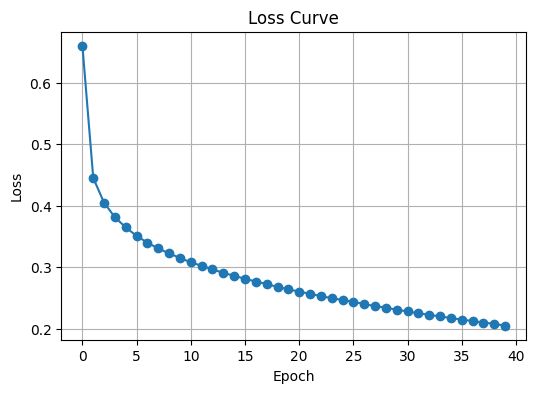

learning rate: 0.001
sgd+constant
Train Accuracy 0.90405
Test Accuracy: 0.8722
training time 74.48176503181458
n_iter 66
Best validation score: 0.8848333333333334


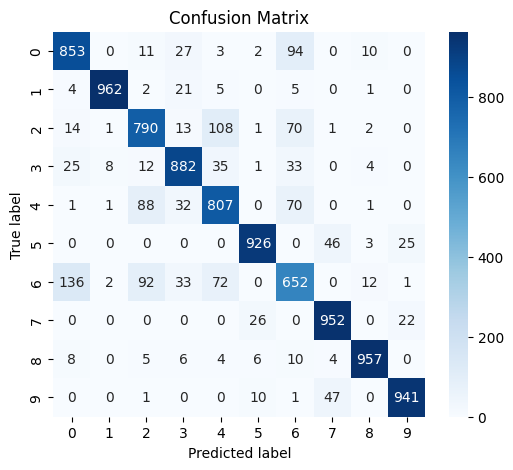

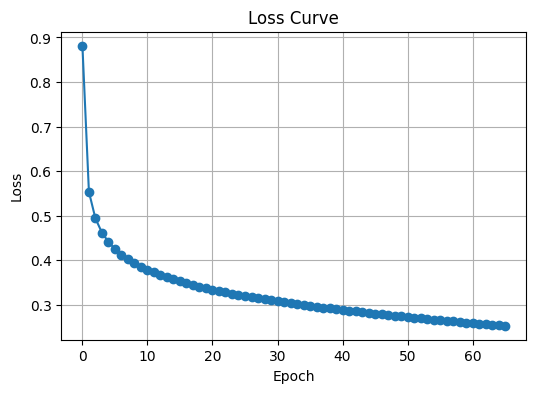

sgd+invscaling
Train Accuracy 0.90405
Test Accuracy: 0.8722
training time 71.55677890777588
n_iter 66
Best validation score: 0.8848333333333334


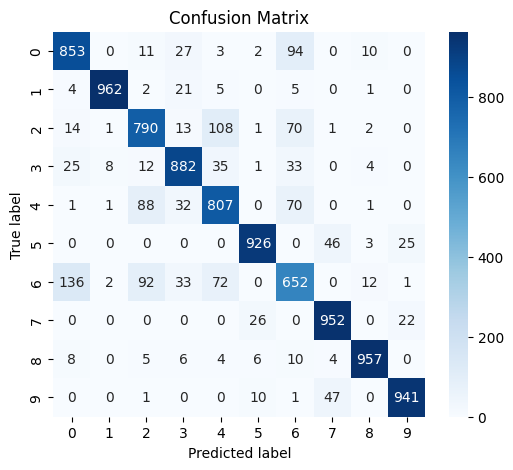

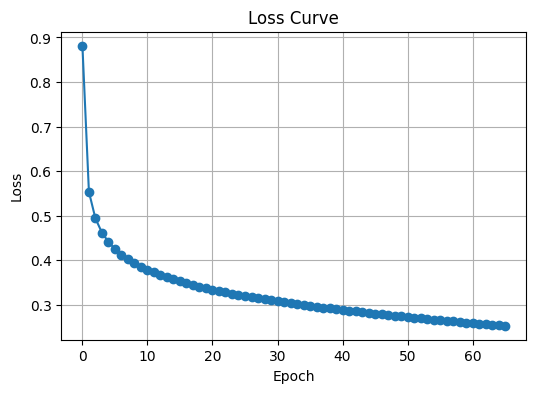

sgd+adaptive
Train Accuracy 0.90405
Test Accuracy: 0.8722
training time 76.71627259254456
n_iter 66
Best validation score: 0.8848333333333334


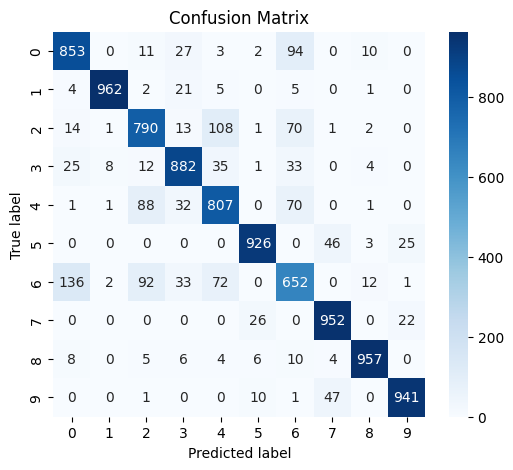

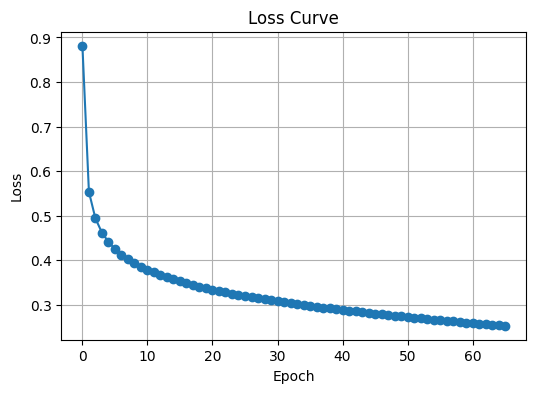

learning rate: 0.00031622776601683794
sgd+constant
Train Accuracy 0.8960333333333333
Test Accuracy: 0.868
training time 148.14271593093872
n_iter 135
Best validation score: 0.8803333333333333


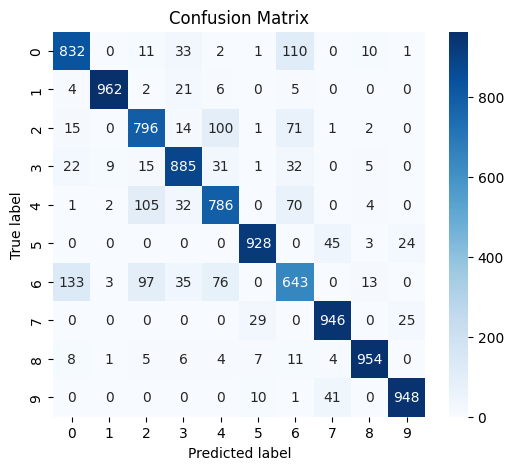

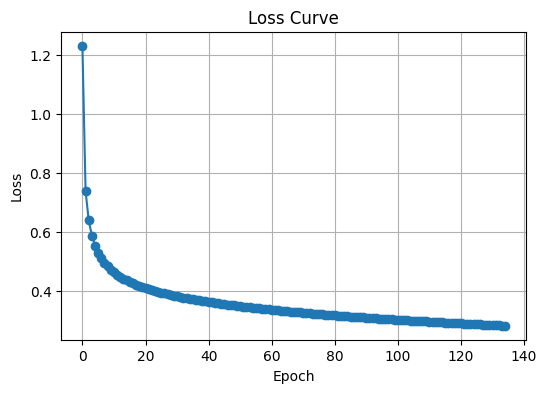

sgd+invscaling
Train Accuracy 0.8960333333333333
Test Accuracy: 0.868
training time 151.23194694519043
n_iter 135
Best validation score: 0.8803333333333333


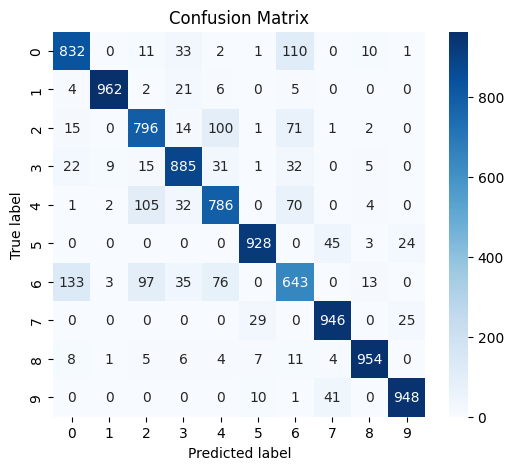

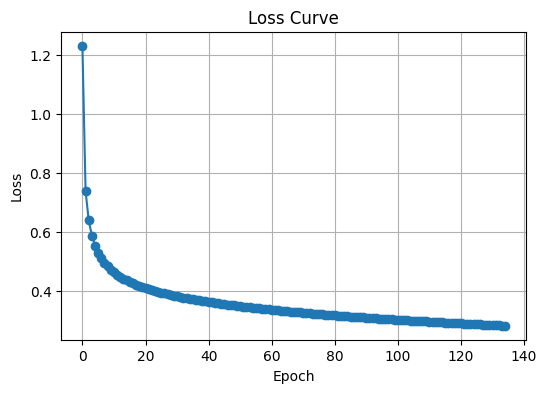

sgd+adaptive
Train Accuracy 0.8960333333333333
Test Accuracy: 0.868
training time 149.29886746406555
n_iter 135
Best validation score: 0.8803333333333333


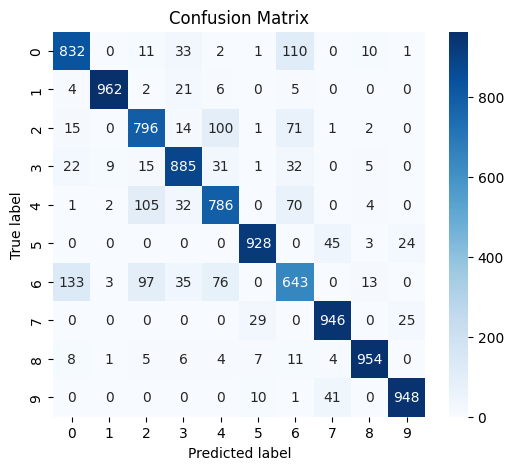

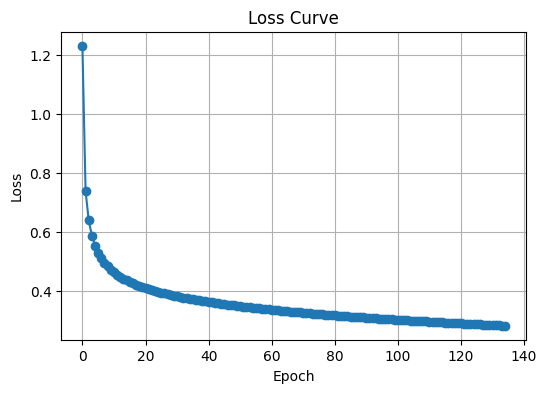

learning rate: 0.0001
sgd+constant
Train Accuracy 0.8758
Test Accuracy: 0.8537
training time 178.71291160583496
n_iter 164
Best validation score: 0.8676666666666667


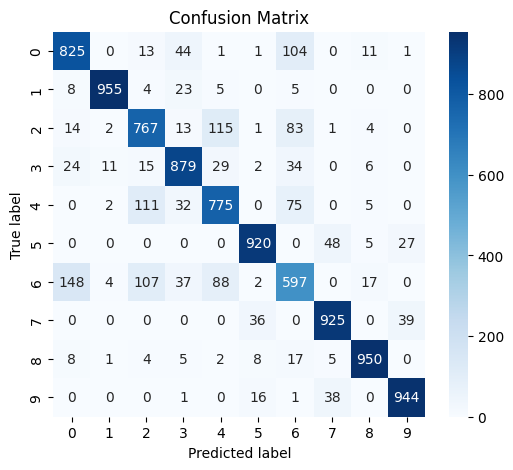

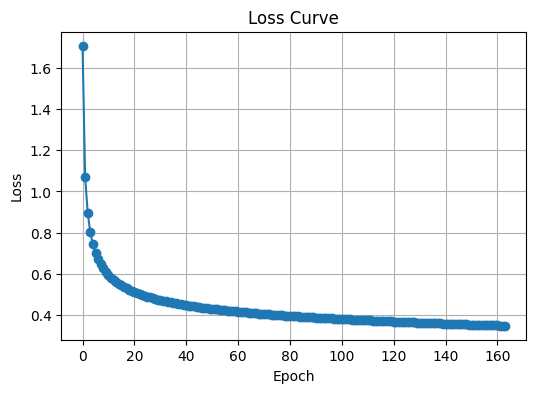

sgd+invscaling
Train Accuracy 0.8758
Test Accuracy: 0.8537
training time 183.07253313064575
n_iter 164
Best validation score: 0.8676666666666667


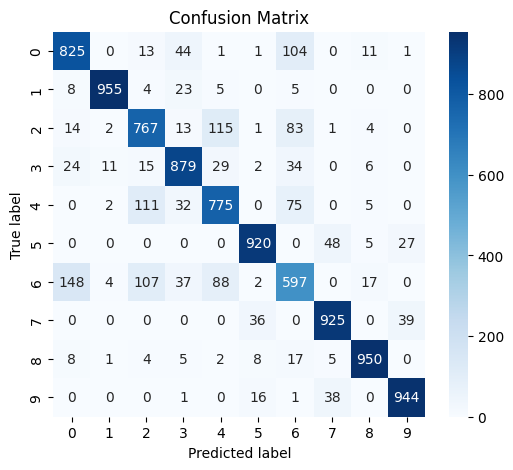

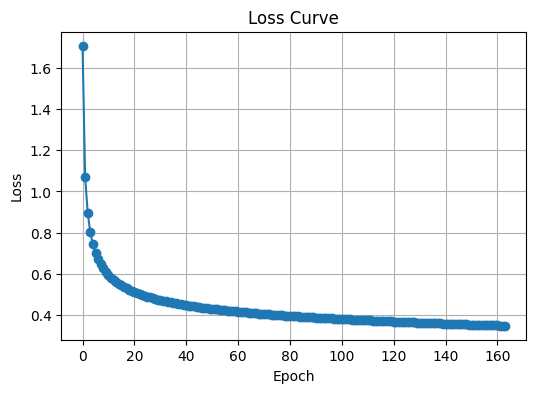

sgd+adaptive
Train Accuracy 0.8758
Test Accuracy: 0.8537
training time 182.03648400306702
n_iter 164
Best validation score: 0.8676666666666667


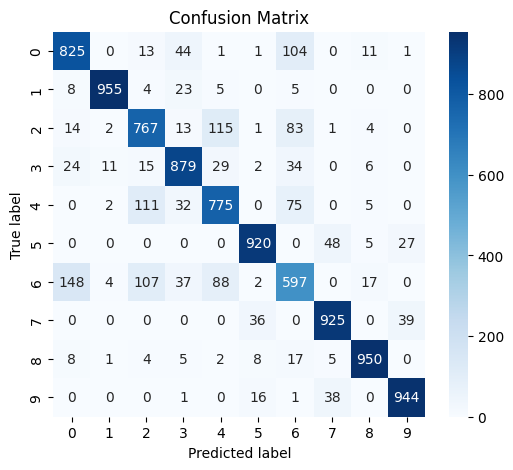

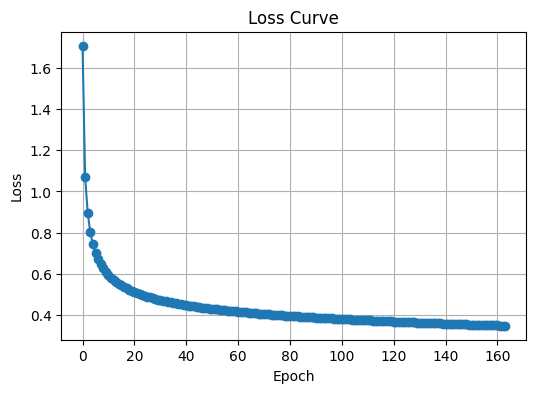

learning rate: 3.1622776601683795e-05
sgd+constant


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy 0.8551166666666666
Test Accuracy: 0.8386
training time 222.96625471115112
n_iter 200
Best validation score: 0.8461666666666666


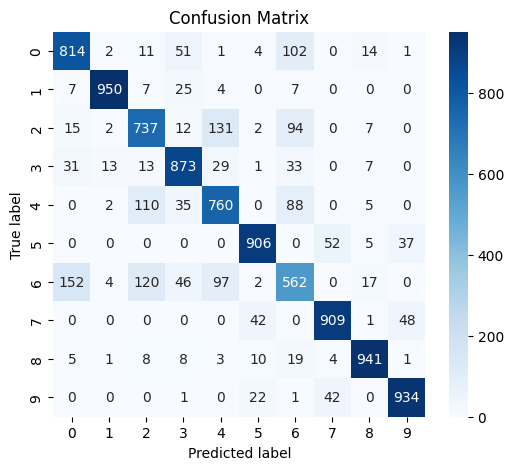

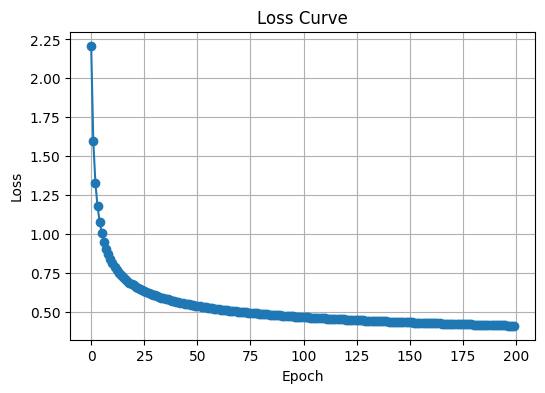

sgd+invscaling


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy 0.8551166666666666
Test Accuracy: 0.8386
training time 222.27987813949585
n_iter 200
Best validation score: 0.8461666666666666


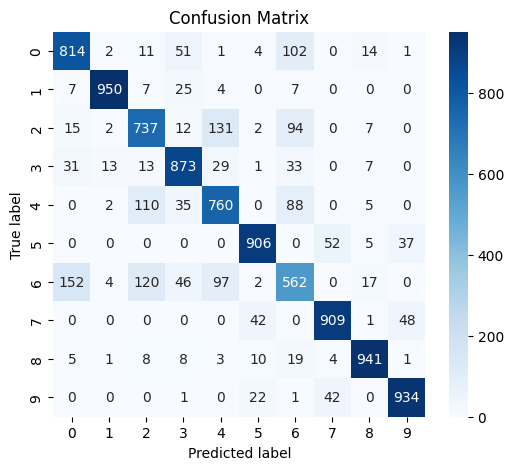

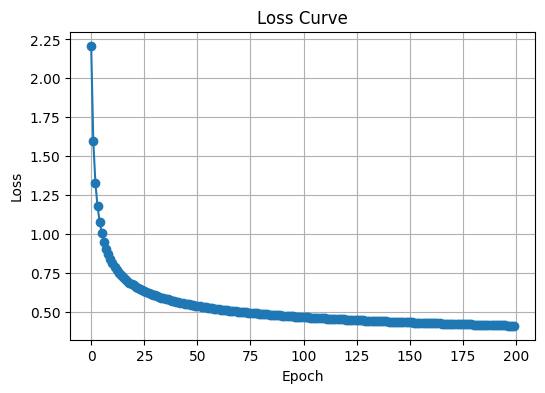

sgd+adaptive


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy 0.8551166666666666
Test Accuracy: 0.8386
training time 221.18798899650574
n_iter 200
Best validation score: 0.8461666666666666


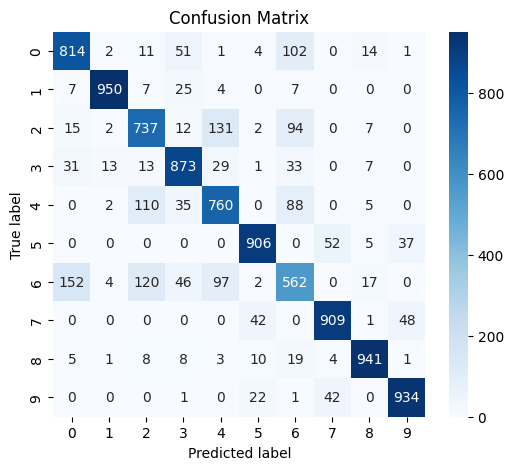

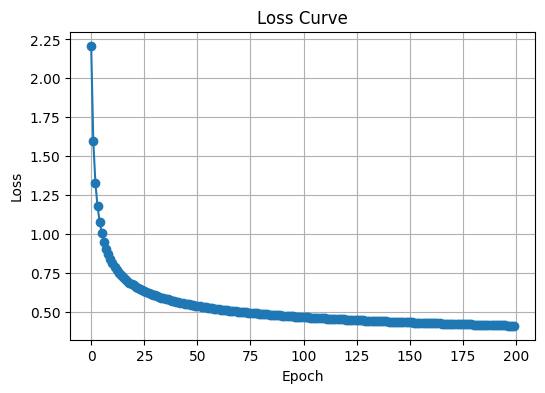

learning rate: 1e-05
sgd+constant


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy 0.8207333333333333
Test Accuracy: 0.8072
training time 224.8480384349823
n_iter 200
Best validation score: 0.8108333333333333


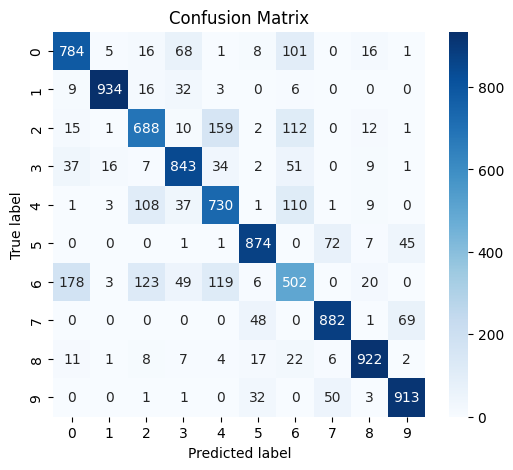

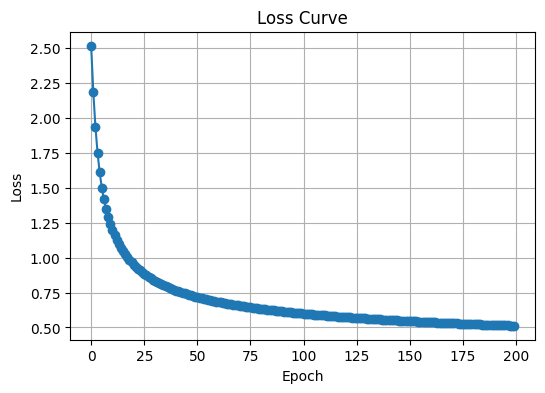

sgd+invscaling


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy 0.8207333333333333
Test Accuracy: 0.8072
training time 222.73583030700684
n_iter 200
Best validation score: 0.8108333333333333


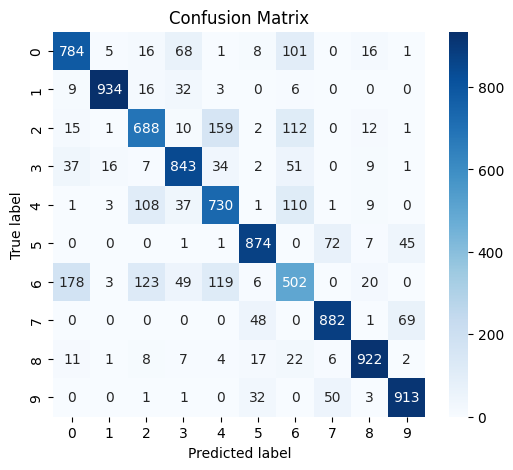

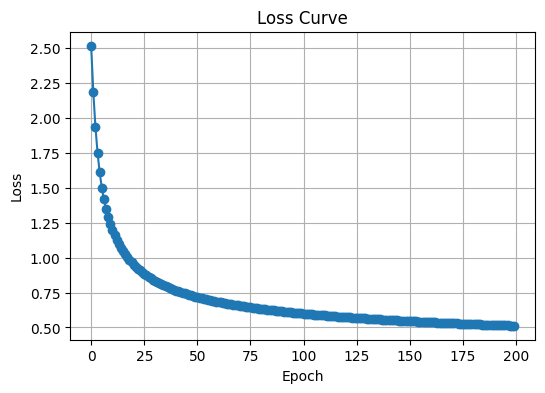

sgd+adaptive


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy 0.8207333333333333
Test Accuracy: 0.8072
training time 219.82864141464233
n_iter 200
Best validation score: 0.8108333333333333


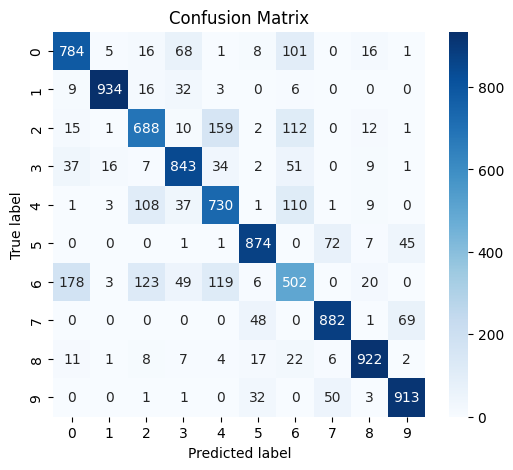

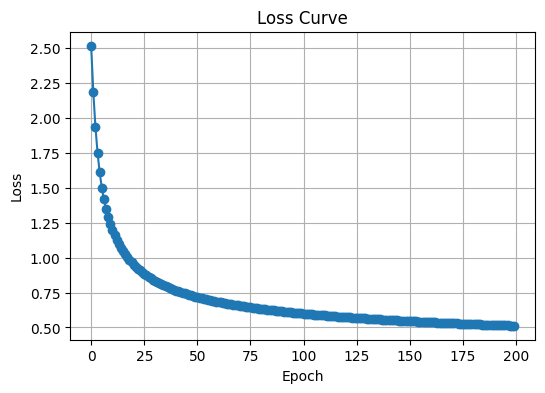

In [ ]:
import numpy as np

lrs = np.logspace(-1, -5, num=9)

for lr in lrs:
  print(f"learning rate: {lr}")
  print("sgd+constant")
  train_mlp_pipeline(X_train, y_train, X_test, y_test, solver='sgd', learning_rate = 'constant', learning_rate_init = lr)
  print("sgd+invscaling")
  train_mlp_pipeline(X_train, y_train, X_test, y_test, solver='sgd', learning_rate = 'invscaling', learning_rate_init = lr)
  print("sgd+adaptive")
  train_mlp_pipeline(X_train, y_train, X_test, y_test, solver='sgd', learning_rate = 'adaptive', learning_rate_init = lr)


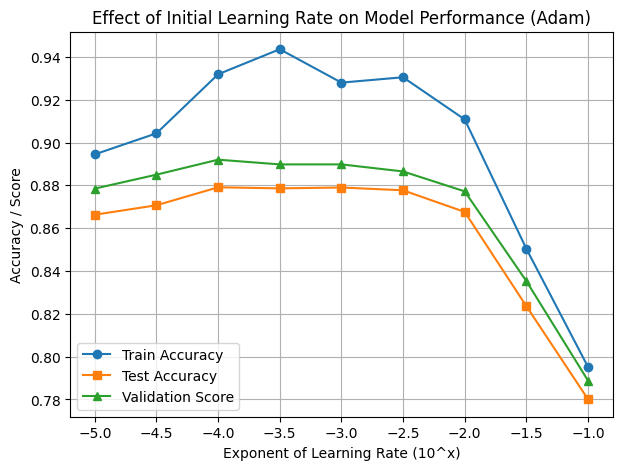

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
lr_exp = np.array([-1, -1.5, -2, -2.5, -3, -3.5, -4, -4.5, -5])  # exponent part of 10^x
train_acc = np.array([0.7952, 0.8504, 0.9108, 0.9305, 0.9280, 0.9436, 0.9319, 0.9043, 0.8945])
test_acc = np.array([0.7801, 0.8236, 0.8676, 0.8777, 0.8790, 0.8786, 0.8791, 0.8707, 0.8663])
val_score = np.array([0.7888, 0.8353, 0.8772, 0.8865, 0.8898, 0.8898, 0.8920, 0.8850, 0.8785])

# Plot
plt.figure(figsize=(7,5))
plt.plot(lr_exp, train_acc, marker='o', label='Train Accuracy')
plt.plot(lr_exp, test_acc, marker='s', label='Test Accuracy')
plt.plot(lr_exp, val_score, marker='^', label='Validation Score')

plt.xlabel('Exponent of Learning Rate (10^x)')
plt.ylabel('Accuracy / Score')
plt.title('Effect of Initial Learning Rate on Model Performance (Adam)')
plt.legend()
plt.grid(True)
plt.show()



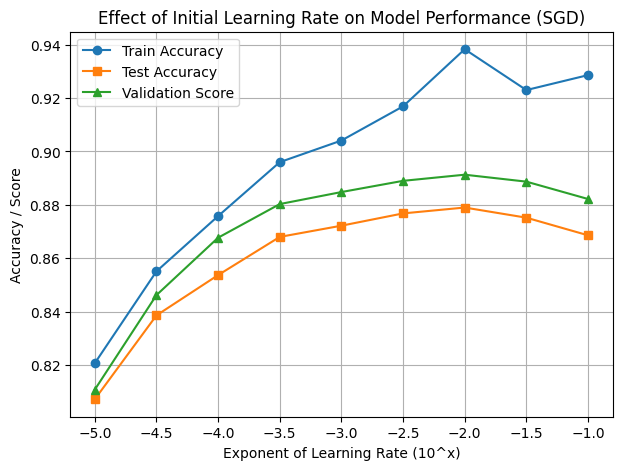

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for SGD
lr_exp = np.array([-5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1])  # exponent part of 10^x
train_acc = np.array([0.8207, 0.8551, 0.8758, 0.8960, 0.9041, 0.9169, 0.9383, 0.9230, 0.9286])
test_acc = np.array([0.8072, 0.8386, 0.8537, 0.8680, 0.8722, 0.8768, 0.8790, 0.8752, 0.8686])
val_score = np.array([0.8108, 0.8462, 0.8677, 0.8803, 0.8848, 0.8890, 0.8913, 0.8887, 0.8822])

# Plot
plt.figure(figsize=(7,5))
plt.plot(lr_exp, train_acc, marker='o', label='Train Accuracy')
plt.plot(lr_exp, test_acc, marker='s', label='Test Accuracy')
plt.plot(lr_exp, val_score, marker='^', label='Validation Score')

plt.xlabel('Exponent of Learning Rate (10^x)')
plt.ylabel('Accuracy / Score')
plt.title('Effect of Initial Learning Rate on Model Performance (SGD)')
plt.legend()
plt.grid(True)
plt.show()


Best Validation Score: 0.8898333333333334
Train Accuracy 0.9280333333333334
Test Accuracy: 0.879
training time 24.071035385131836
n_iter 17


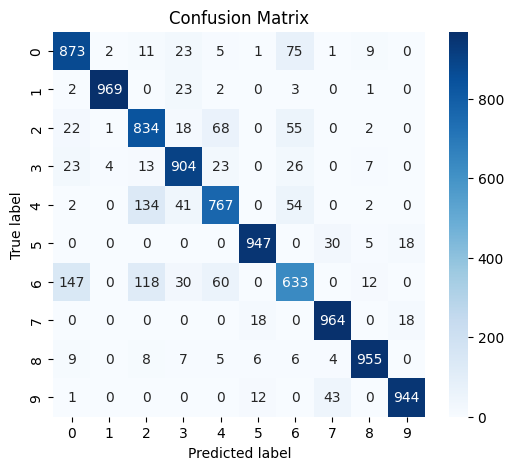

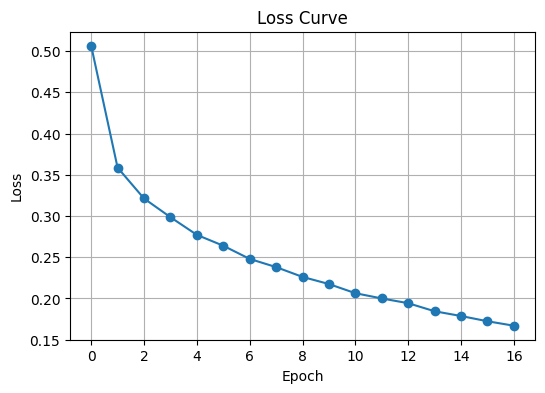

Best Validation Score: 0.8898333333333334
Train Accuracy 0.9280333333333334
Test Accuracy: 0.879
training time 47.33884644508362
n_iter 32


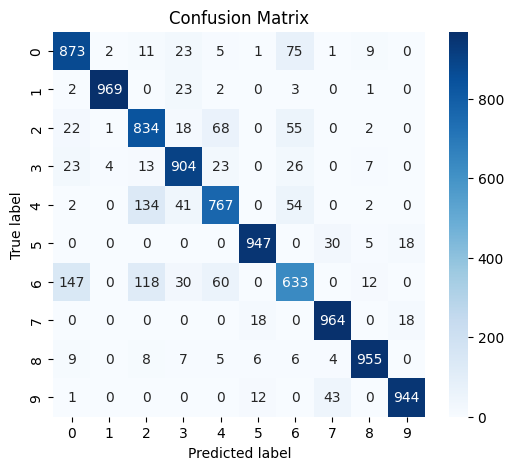

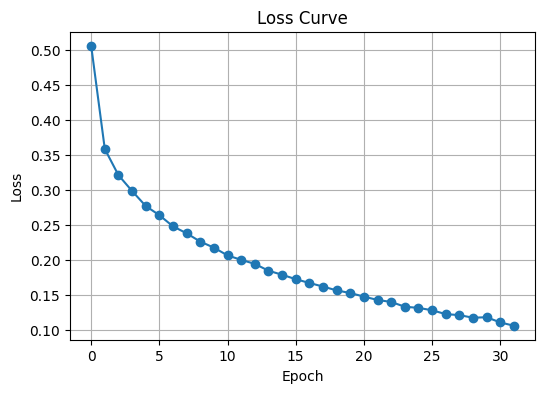

Early stopping not enabled; no validation scores available.
Train Accuracy 0.9902166666666666
Test Accuracy: 0.8701
training time 226.1821002960205
n_iter 138


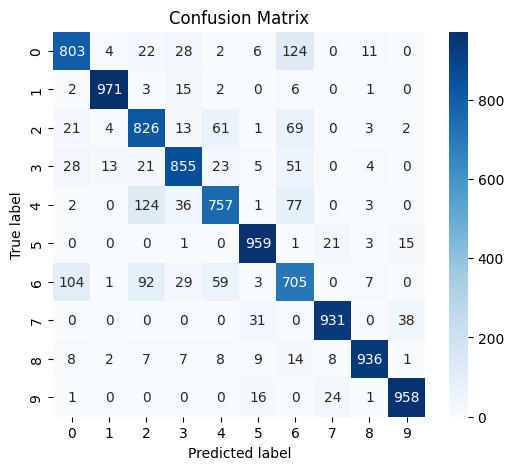

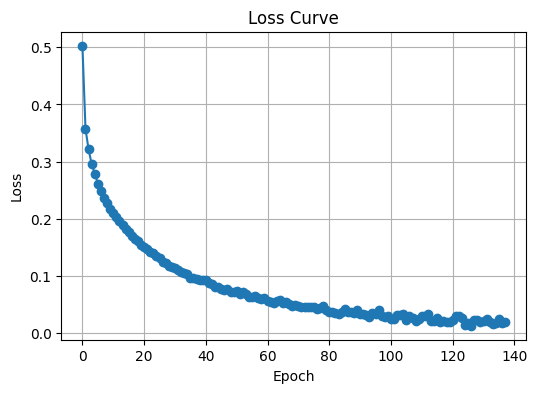

{'training accuracy': 0.9902166666666666,
 'testing accuracy': 0.8701,
 'confusion_matrix': array([[803,   4,  22,  28,   2,   6, 124,   0,  11,   0],
        [  2, 971,   3,  15,   2,   0,   6,   0,   1,   0],
        [ 21,   4, 826,  13,  61,   1,  69,   0,   3,   2],
        [ 28,  13,  21, 855,  23,   5,  51,   0,   4,   0],
        [  2,   0, 124,  36, 757,   1,  77,   0,   3,   0],
        [  0,   0,   0,   1,   0, 959,   1,  21,   3,  15],
        [104,   1,  92,  29,  59,   3, 705,   0,   7,   0],
        [  0,   0,   0,   0,   0,  31,   0, 931,   0,  38],
        [  8,   2,   7,   7,   8,   9,  14,   8, 936,   1],
        [  1,   0,   0,   0,   0,  16,   0,  24,   1, 958]]),
 'training_time': 226.1821002960205,
 'n_iter': 138,
 'loss_curve': [np.float64(0.5026885617361319),
  np.float64(0.3572587449159551),
  np.float64(0.32142732926917583),
  np.float64(0.29569161636116736),
  np.float64(0.2791264406109437),
  np.float64(0.26184510967565117),
  np.float64(0.24861417564637578)

In [ ]:
train_mlp_pipeline(X_train, y_train, X_test, y_test, n_iter_no_change=5)
train_mlp_pipeline(X_train, y_train, X_test, y_test, n_iter_no_change=20)
train_mlp_pipeline(X_train, y_train, X_test, y_test, early_stopping=False)

alpha: 0.01
Best Validation Score: 0.892
Train Accuracy 0.9374833333333333
Test Accuracy: 0.8795
training time 37.232409954071045
n_iter 26


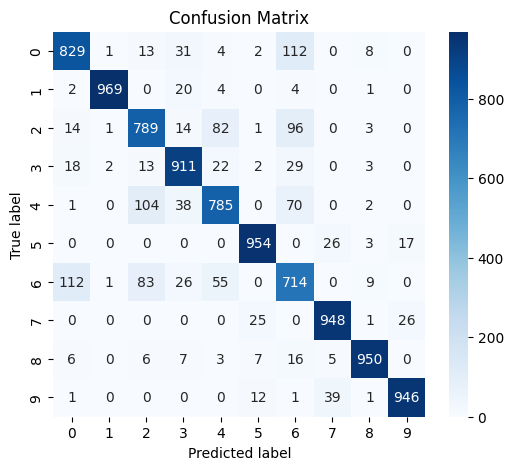

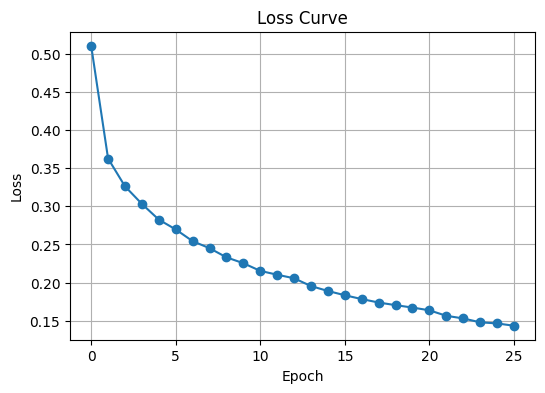

alpha: 0.0031622776601683794
Best Validation Score: 0.8901666666666667
Train Accuracy 0.94215
Test Accuracy: 0.88
training time 45.423670530319214
n_iter 30


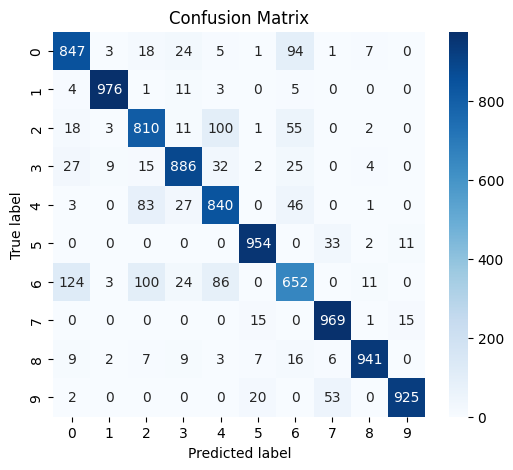

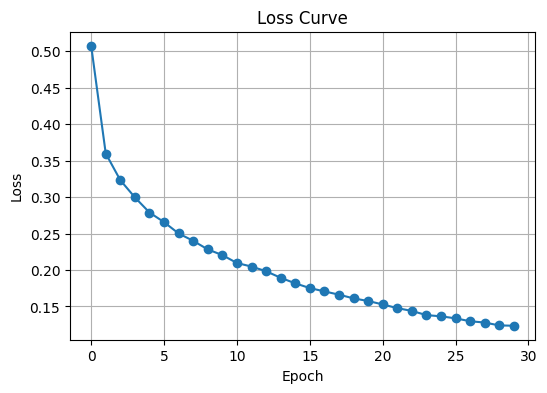

alpha: 0.001
Best Validation Score: 0.8906666666666667
Train Accuracy 0.92825
Test Accuracy: 0.8816
training time 33.872905015945435
n_iter 22


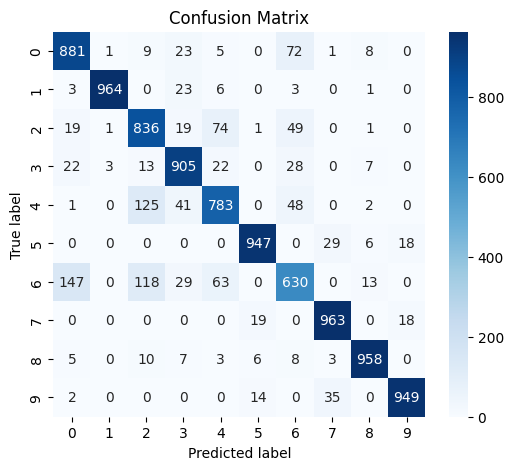

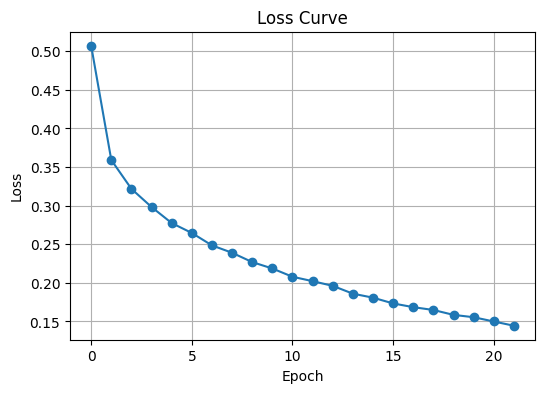

alpha: 0.00031622776601683794
Best Validation Score: 0.8916666666666667
Train Accuracy 0.9365166666666667
Test Accuracy: 0.8795
training time 34.86517262458801
n_iter 25


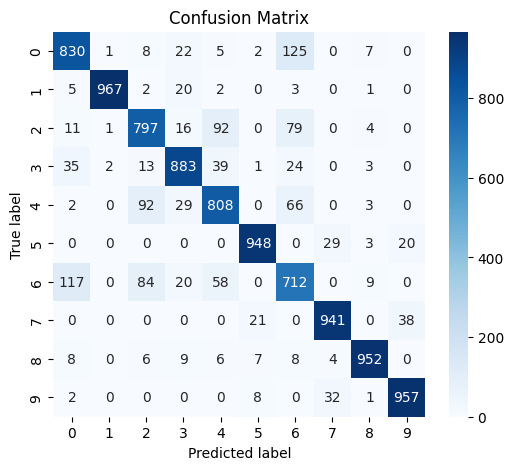

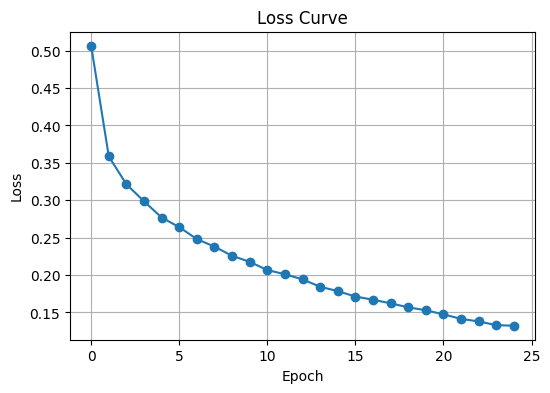

alpha: 0.0001
Best Validation Score: 0.8898333333333334
Train Accuracy 0.9280333333333334
Test Accuracy: 0.879
training time 33.22208833694458
n_iter 22


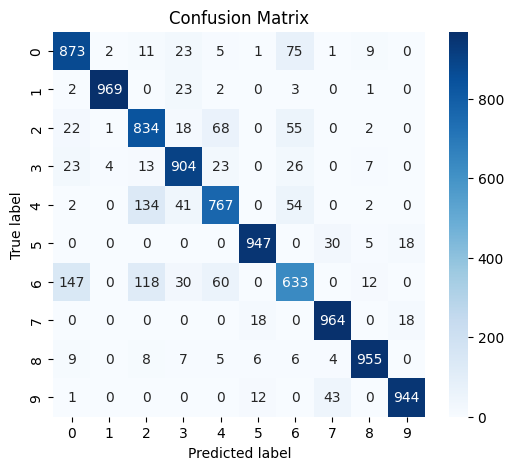

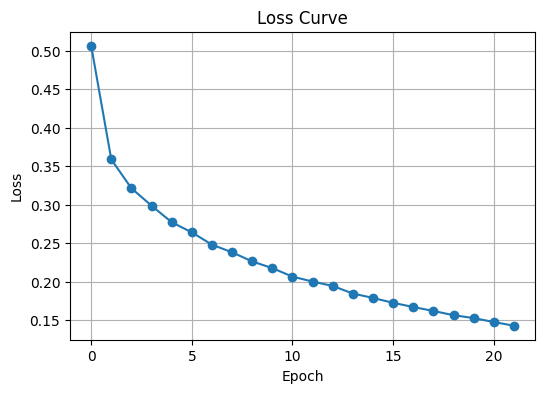

alpha: 3.1622776601683795e-05
Best Validation Score: 0.8905
Train Accuracy 0.9285833333333333
Test Accuracy: 0.8797
training time 31.423476457595825
n_iter 22


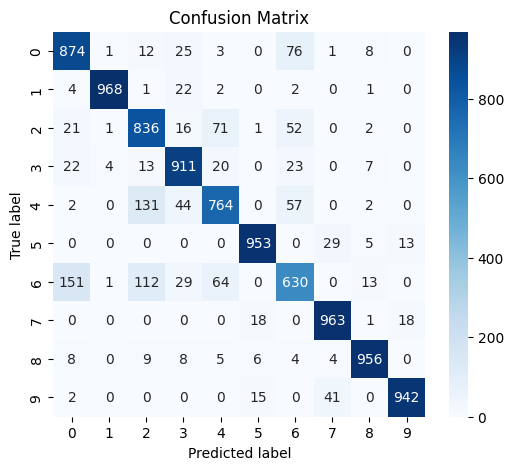

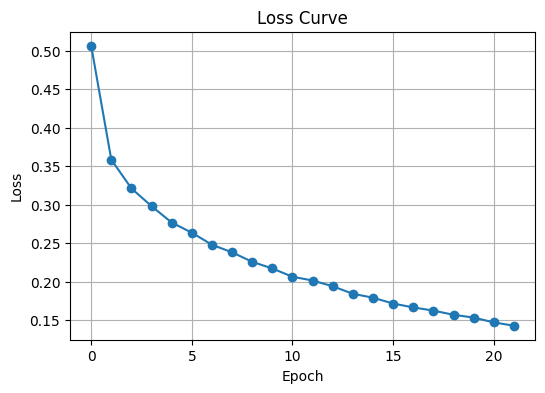

alpha: 1e-05
Best Validation Score: 0.89
Train Accuracy 0.9286
Test Accuracy: 0.8795
training time 35.73212718963623
n_iter 22


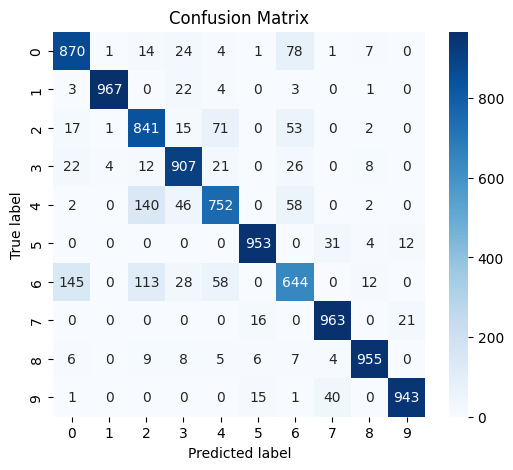

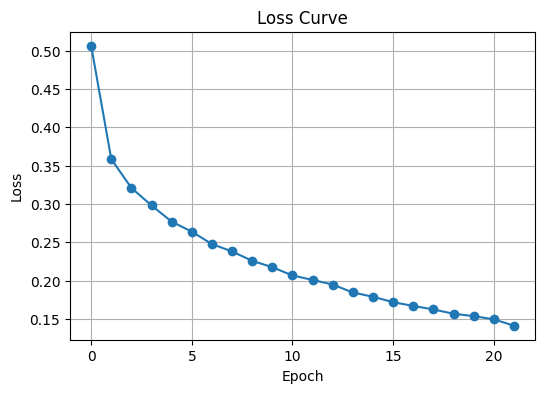

alpha: 3.162277660168379e-06
Best Validation Score: 0.8906666666666667
Train Accuracy 0.92835
Test Accuracy: 0.8804
training time 32.51935648918152
n_iter 22


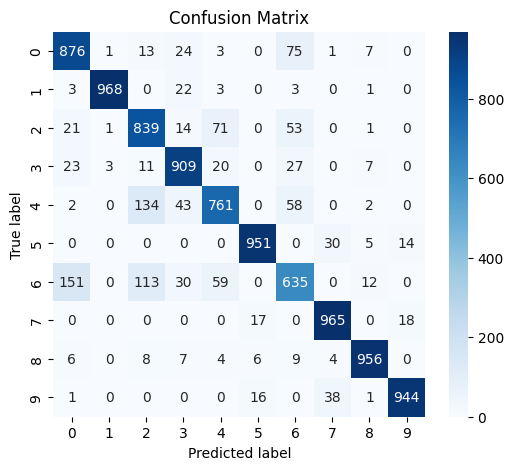

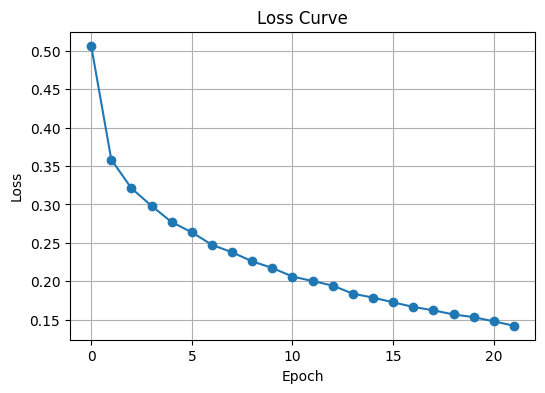

alpha: 1e-06
Best Validation Score: 0.8895
Train Accuracy 0.9512333333333334
Test Accuracy: 0.8804
training time 47.14048719406128
n_iter 33


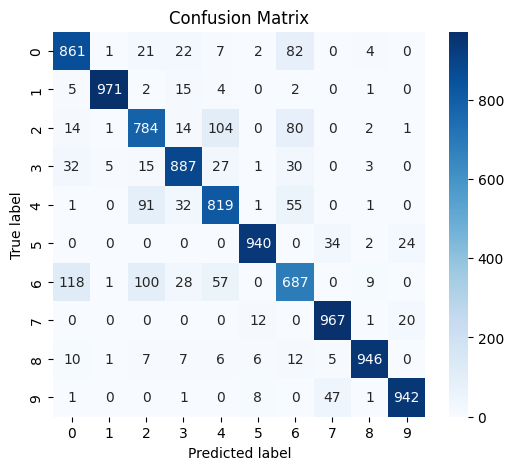

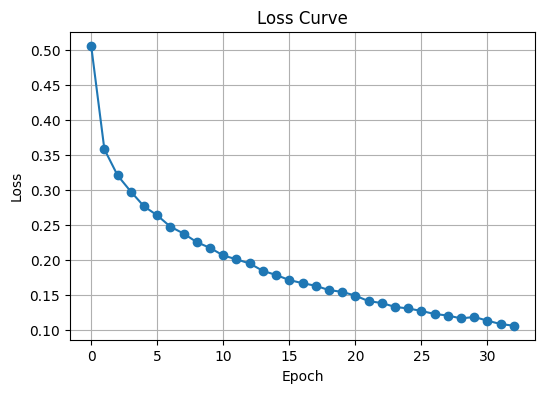

In [ ]:
# Regularization
import numpy as np
lrs = np.logspace(-2, -6, num=9)
for lr in lrs:
  print(f"alpha: {lr}")
  train_mlp_pipeline(X_train, y_train, X_test, y_test, alpha=lr, early_stopping=True)

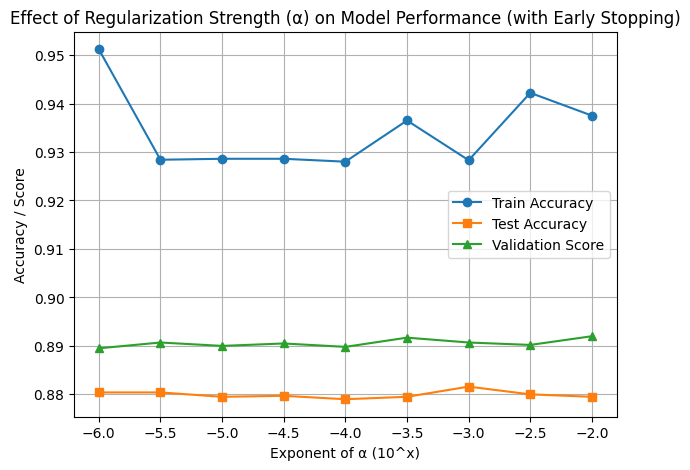

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
alpha_exp = np.array([-6, -5.5, -5, -4.5, -4, -3.5, -3, -2.5, -2])
train_acc = np.array([0.9512, 0.9284, 0.9286, 0.9286, 0.9280, 0.9365, 0.9283, 0.9422, 0.9375])
test_acc = np.array([0.8804, 0.8804, 0.8795, 0.8797, 0.8790, 0.8795, 0.8816, 0.8800, 0.8795])
val_score = np.array([0.8895, 0.8907, 0.8900, 0.8905, 0.8898, 0.8917, 0.8907, 0.8902, 0.8920])

# Plot
plt.figure(figsize=(7,5))
plt.plot(alpha_exp, train_acc, marker='o', label='Train Accuracy')
plt.plot(alpha_exp, test_acc, marker='s', label='Test Accuracy')
plt.plot(alpha_exp, val_score, marker='^', label='Validation Score')

plt.xlabel('Exponent of α (10^x)')
plt.ylabel('Accuracy / Score')
plt.title('Effect of Regularization Strength (α) on Model Performance (with Early Stopping)')
plt.legend()
plt.grid(True)
plt.show()


alpha: 1.0
Early stopping not enabled; no validation scores available.
Train Accuracy 0.8979
Test Accuracy: 0.8708
training time 101.99176549911499
n_iter 61


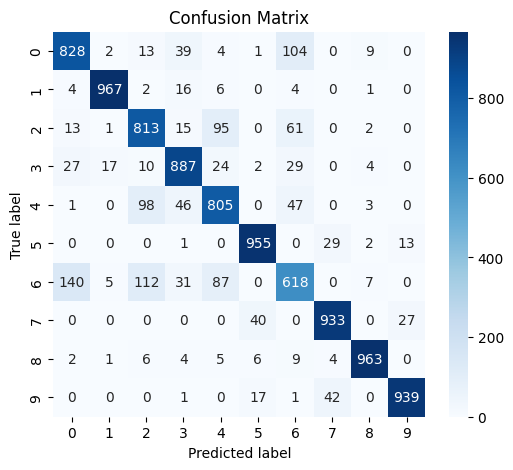

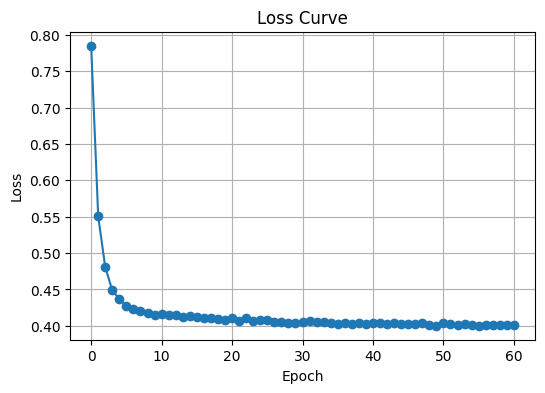

alpha: 0.31622776601683794
Early stopping not enabled; no validation scores available.
Train Accuracy 0.9343833333333333
Test Accuracy: 0.887
training time 100.76460528373718
n_iter 60


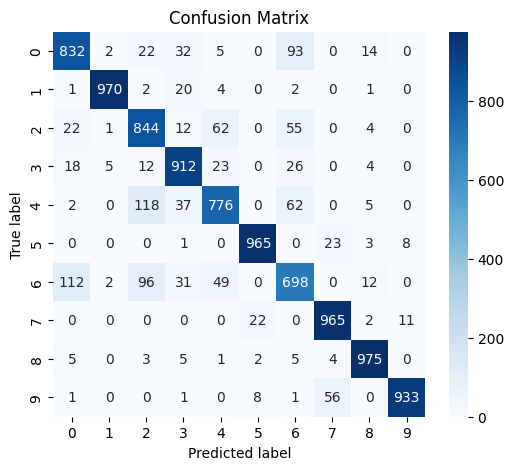

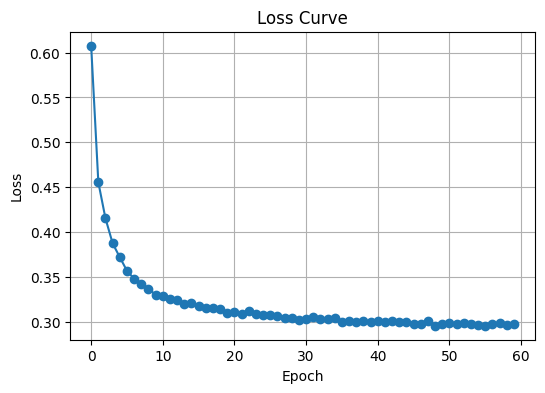

alpha: 0.1
Early stopping not enabled; no validation scores available.
Train Accuracy 0.9681333333333333
Test Accuracy: 0.8796
training time 250.40880966186523
n_iter 142


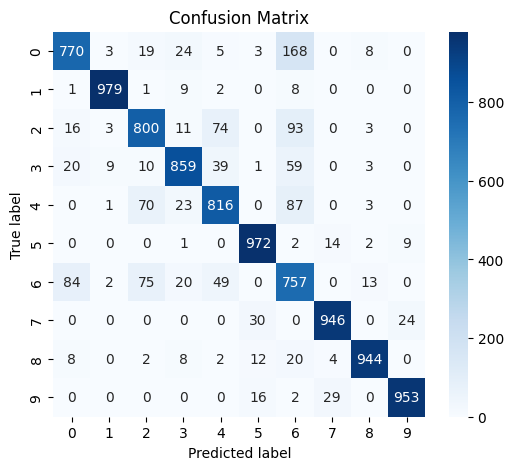

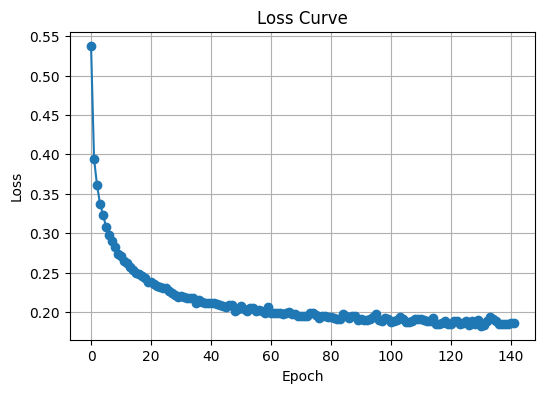

alpha: 0.03162277660168379
Early stopping not enabled; no validation scores available.
Train Accuracy 0.9806666666666667
Test Accuracy: 0.8718
training time 184.301424741745
n_iter 112


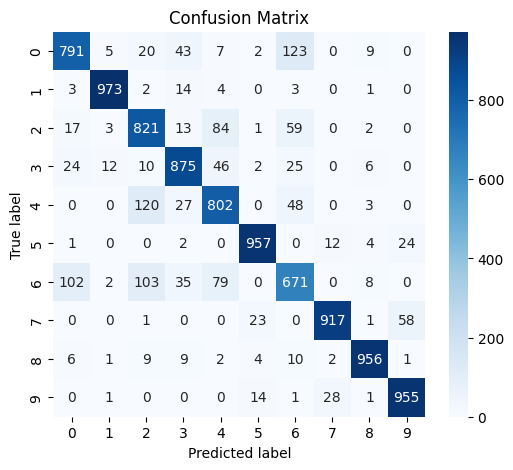

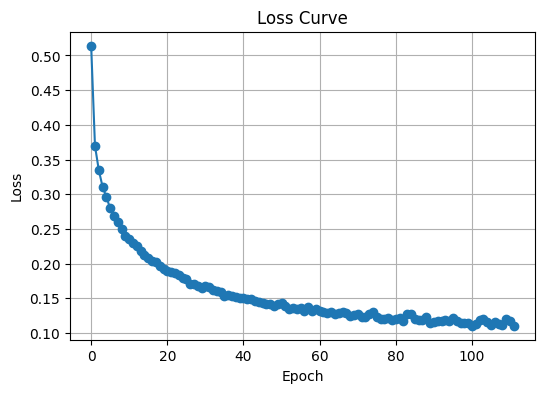

alpha: 0.01
Early stopping not enabled; no validation scores available.
Train Accuracy 0.9866833333333334
Test Accuracy: 0.8745
training time 188.61744809150696
n_iter 112


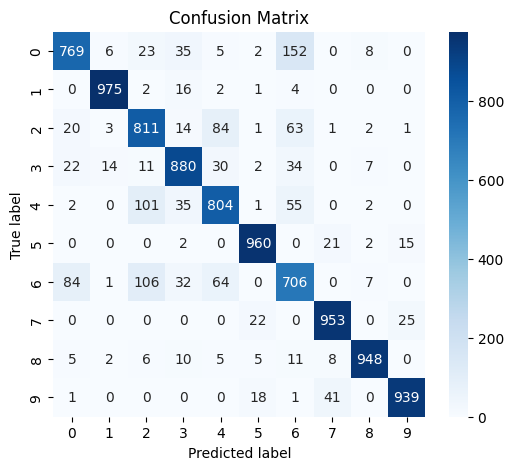

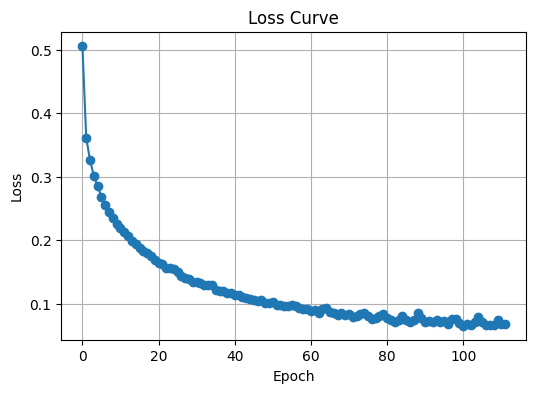

alpha: 0.0031622776601683794
Early stopping not enabled; no validation scores available.
Train Accuracy 0.99585
Test Accuracy: 0.8713
training time 213.0361566543579
n_iter 130


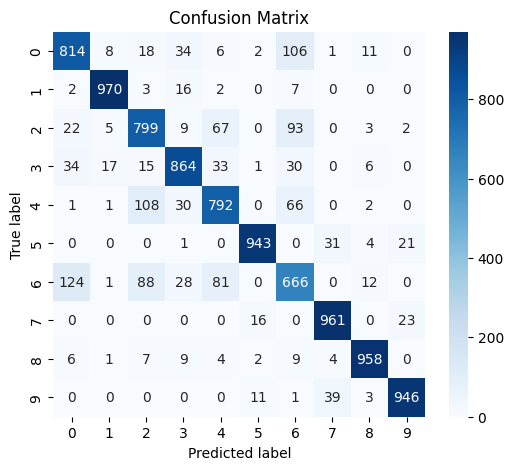

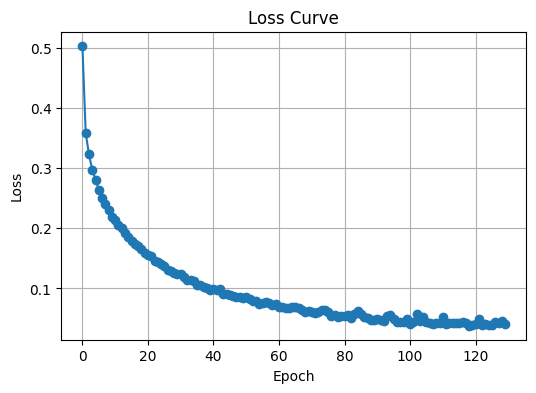

alpha: 0.001
Early stopping not enabled; no validation scores available.
Train Accuracy 0.9847166666666667
Test Accuracy: 0.8691
training time 256.5807592868805
n_iter 158


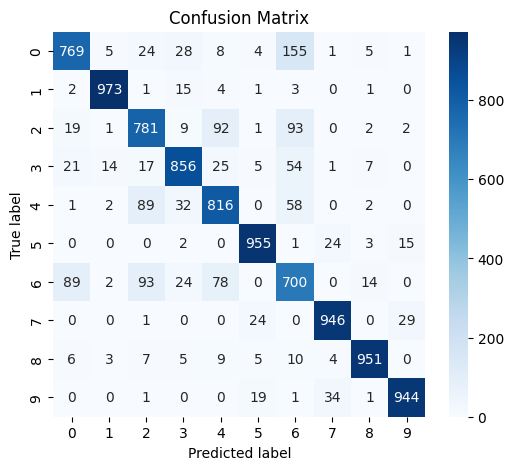

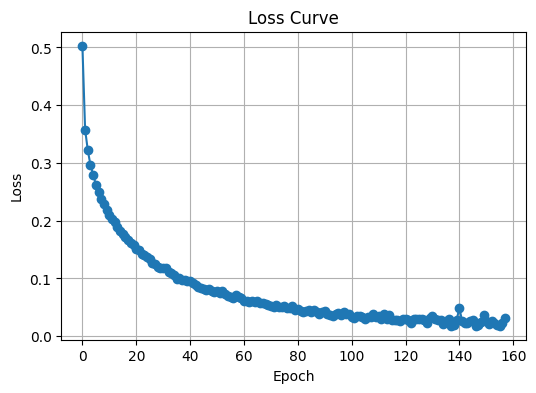

alpha: 0.00031622776601683794
Early stopping not enabled; no validation scores available.
Train Accuracy 0.9962
Test Accuracy: 0.8711
training time 222.58588242530823
n_iter 136


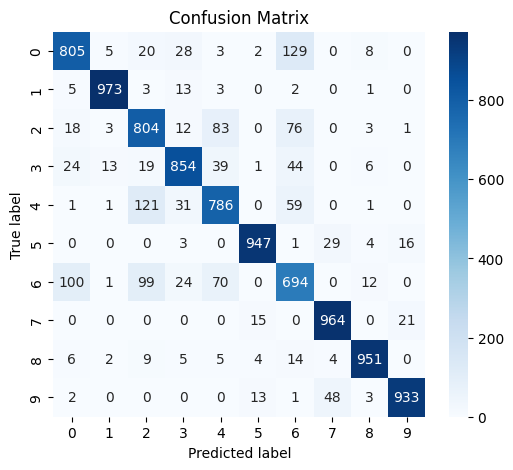

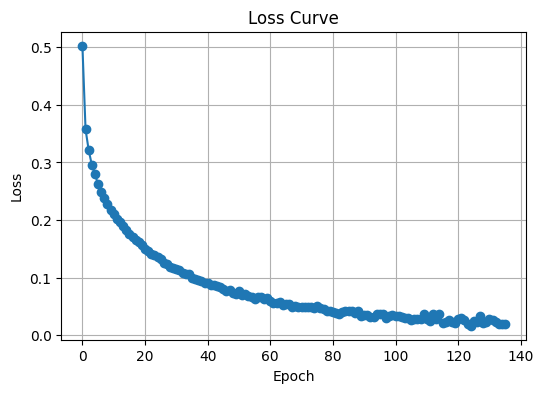

alpha: 0.0001
Early stopping not enabled; no validation scores available.
Train Accuracy 0.9902166666666666
Test Accuracy: 0.8701
training time 228.57757425308228
n_iter 138


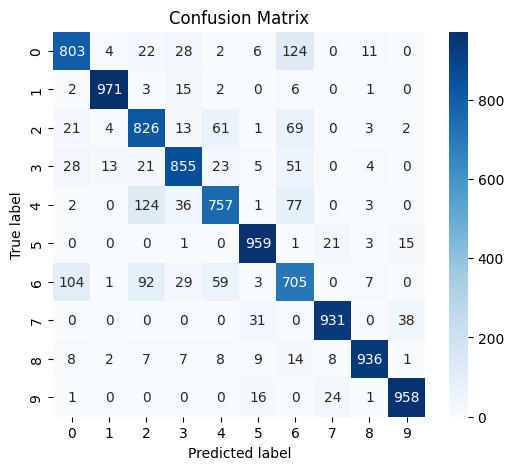

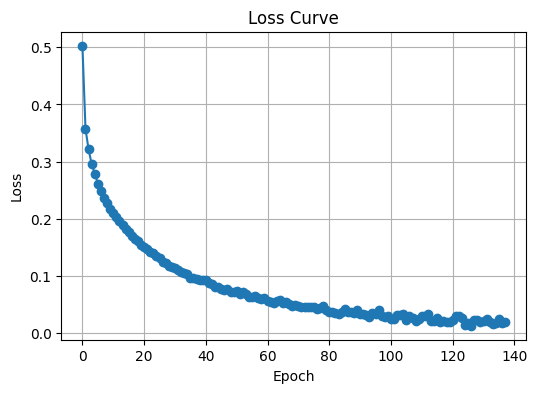

In [ ]:
# Regularization
import numpy as np
lrs = np.logspace(0, -4, num=9)
for lr in lrs:
  print(f"alpha: {lr}")
  train_mlp_pipeline(X_train, y_train, X_test, y_test, alpha=lr, early_stopping=False)

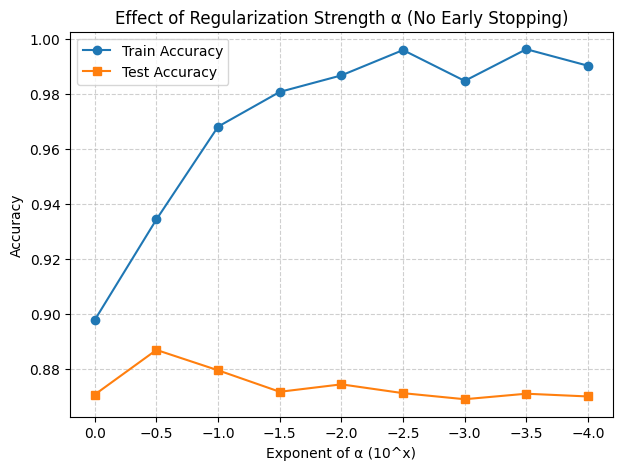

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
alpha_exp = np.array([-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0])
train_acc = np.array([0.9902, 0.9962, 0.9847, 0.9959, 0.9867, 0.9807, 0.9681, 0.9344, 0.8979])
test_acc  = np.array([0.8701, 0.8711, 0.8691, 0.8713, 0.8745, 0.8718, 0.8796, 0.8870, 0.8708])

# Plot
plt.figure(figsize=(7, 5))
plt.plot(alpha_exp, train_acc, marker='o', label='Train Accuracy')
plt.plot(alpha_exp, test_acc, marker='s', label='Test Accuracy')

# Labels and formatting
plt.xlabel('Exponent of α (10^x)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization Strength α (No Early Stopping)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Optional: invert x-axis so larger α (smaller regularization) is to the right
plt.gca().invert_xaxis()

plt.show()


# 3. Fashion-MNIST image classification  using pytorch

In [ ]:
import random
import numpy as np
import torch

def set_seed(seed=42):

    random.seed(seed)

    np.random.seed(seed)

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed = 42
set_seed(seed)

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True, worker_init_fn=lambda worker_id: np.random.seed(seed + worker_id))
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# your code here

In [ ]:
import torch
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self, hidden_layers = [512, 256], activation_fn=nn.ReLU):


        """
        input_size: int, e.g. 28*28 for MNIST
        hidden_layers: list of int, e.g. [128, 64, 32]
        output_size: int, e.g. 10 for 10 classes
        activation_fn: class (not instance), e.g. nn.ReLU or nn.Sigmoid
        """

        super().__init__()

        layers = []
        in_features = 28*28

        for h in hidden_layers:
            layers.append(nn.Linear(in_features, h))
            layers.append(activation_fn())
            in_features = h

        layers.append(nn.Linear(in_features, 10))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = torch.flatten(x, 1)
        return self.model(x)


In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    correct = 0
    train_loss = 0


    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()*X.size(0)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    train_loss /= len(dataloader.dataset)
    correct /= size
    return correct, train_loss

In [ ]:
from sklearn.metrics import confusion_matrix
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()*X.size(0)
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

            all_preds.extend(pred.argmax(1).cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    test_loss /= len(dataloader.dataset)


    correct /= size
    cm = confusion_matrix(all_labels, all_preds)
    return test_loss, correct, cm

In [57]:
import seaborn as sns
def train_pipeline(model_class,
                   model_params={},
                   optimizer_class=torch.optim.AdamW,
                   optimizer_params={"lr":1e-3, "weight_decay": 1e-4},
                   loss_fn_class=nn.CrossEntropyLoss,
                   epochs=200,
                   early_stopping=True,
                   patience=10,
                   min_delta=1e-4,   # now applies to val_score improvement
                   device=device):

    model = model_class(**model_params)
    model.to(device)

    loss_fn = loss_fn_class()
    optimizer = optimizer_class(model.parameters(), **optimizer_params)

    best_val_score = 0
    val_losses = []
    train_losses = []
    start_time = time.time()
    n_iter = epochs
    trigger_times = 0
    best_model_wts = copy.deepcopy(model.state_dict())
    best_epoch = 0
    best_train_acc = 0
    best_val_loss = float('inf')

    for epoch in range(epochs):
        # train
        train_acc, train_loss = train(train_loader, model, loss_fn, optimizer)
        val_loss, val_acc, cm_val = test(val_loader, model, loss_fn)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if early_stopping:
            # --- early stopping based on validation SCORE (accuracy) ---
            if val_acc > best_val_score + min_delta:
                best_val_score = val_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_train_acc = train_acc
                best_val_loss = val_loss
                trigger_times = 0
                best_epoch = epoch + 1
            else:
                trigger_times += 1

            if trigger_times >= patience:
                n_iter = epoch - patience + 1
                print(f"Early stopping at epoch {n_iter}")
                break

    end_time = time.time()
    training_time = end_time - start_time

    model.load_state_dict(best_model_wts)
    print("Train Accuracy:", best_train_acc)
    if early_stopping:
        print("Best epoch:", best_epoch)
        print("Validation Score:", best_val_score)
    print("Training Time:", training_time, "seconds")

    # Loss curve
    plt.figure(figsize=(6,4))
    plt.plot(val_losses[:n_iter], marker='o', label='Validation Loss')
    plt.plot(train_losses[:n_iter], marker='x', label='Training Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Test
    test_loss, test_acc, cm = test(test_loader, model, loss_fn)
    print("Test Accuracy:", test_acc)

    # Confusion Matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.show()

    results = {
        'training accuracy' : best_train_acc,
        'testing accuracy': test_acc,
        'validation score': best_val_score,
        'confusion_matrix': cm,
        'training_time': training_time,
        'n_iter': n_iter,
    }
    return results


In [58]:
import numpy as np
import copy
import time
import torch
import torch.nn as nn

def train_pipeline_stats(model_class,
                         model_params={},
                         optimizer_class=torch.optim.AdamW,
                         optimizer_params={"lr":1e-3, "weight_decay": 1e-4},
                         loss_fn_class=nn.CrossEntropyLoss,
                         epochs=200,
                         early_stopping=True,
                         patience=10,
                         min_delta=1e-4,
                         device=device,
                         n_runs=5):

    stats = {
        'training accuracy': [],
        'testing accuracy': [],
        'validation score': [],
        'training time': [],
        'n_iter': []
    }

    for run in range(n_runs):
        model = model_class(**model_params)
        model.to(device)

        loss_fn = loss_fn_class()
        optimizer = optimizer_class(model.parameters(), **optimizer_params)

        best_val_score = 0
        best_val_loss = float('inf')
        best_train_loss = float('inf')
        best_train_acc = 0
        best_model_wts = copy.deepcopy(model.state_dict())
        best_epoch = 0

        start_time = time.time()
        n_iter = epochs
        trigger_times = 0
        conv_times = 0

        for epoch in range(epochs):
            # train
            train_acc, train_loss = train(train_loader, model, loss_fn, optimizer)
            val_loss, val_acc, _ = test(val_loader, model, loss_fn)

            # Early stopping (based on validation accuracy)
            if early_stopping:
                if val_acc > best_val_score + min_delta:
                    best_val_score = val_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    best_train_acc = train_acc
                    best_val_loss = val_loss
                    trigger_times = 0
                    best_epoch = epoch + 1
                else:
                    trigger_times += 1
                if trigger_times >= patience:
                    n_iter = epoch - patience + 1
                    break

        end_time = time.time()
        training_time = end_time - start_time

        model.load_state_dict(best_model_wts)
        test_loss, test_acc, _ = test(test_loader, model, loss_fn)

        stats['training accuracy'].append(best_train_acc)
        stats['testing accuracy'].append(test_acc)
        stats['validation score'].append(best_val_score)
        stats['training time'].append(training_time)
        stats['n_iter'].append(n_iter)

    # Compute mean and std
    summary = {k: (np.mean(v), np.std(v)) for k, v in stats.items()}

    # Print results
    print(f"=== Training Summary over {n_runs} runs ===")
    for metric, (mean_val, std_val) in summary.items():
        if "accuracy" in metric or "score" in metric:
            print(f"{metric.title()}: {mean_val*100:.2f}% ± {std_val*100:.2f}%")
        elif "time" in metric:
            print(f"{metric.title()}: {mean_val:.2f}s ± {std_val:.2f}s")
        else:
            print(f"{metric.title()}: {mean_val:.1f} ± {std_val:.1f}")

    return summary


Early stopping at epoch 27
Train Accuracy: 0.956
Best epoch: 27
Validation Score: 0.9015
Training Time: 46.57301092147827 seconds


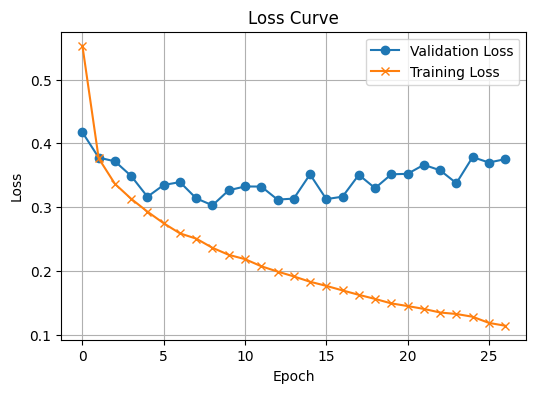

Test Accuracy: 0.8963


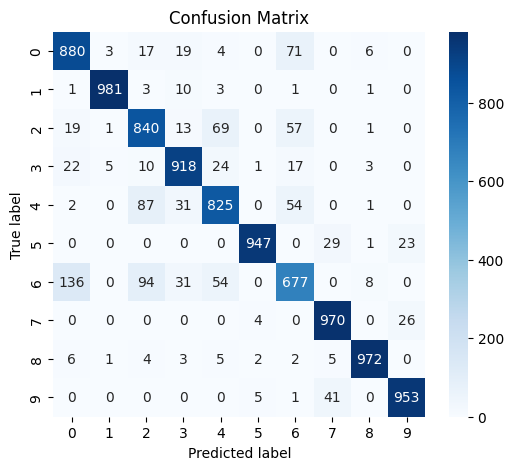

{'training accuracy': 0.956,
 'testing accuracy': 0.8963,
 'validation score': 0.9015,
 'confusion_matrix': array([[880,   3,  17,  19,   4,   0,  71,   0,   6,   0],
        [  1, 981,   3,  10,   3,   0,   1,   0,   1,   0],
        [ 19,   1, 840,  13,  69,   0,  57,   0,   1,   0],
        [ 22,   5,  10, 918,  24,   1,  17,   0,   3,   0],
        [  2,   0,  87,  31, 825,   0,  54,   0,   1,   0],
        [  0,   0,   0,   0,   0, 947,   0,  29,   1,  23],
        [136,   0,  94,  31,  54,   0, 677,   0,   8,   0],
        [  0,   0,   0,   0,   0,   4,   0, 970,   0,  26],
        [  6,   1,   4,   3,   5,   2,   2,   5, 972,   0],
        [  0,   0,   0,   0,   0,   5,   1,  41,   0, 953]]),
 'training_time': 46.57301092147827,
 'n_iter': 27}

In [59]:
# Neural Network Baseline
train_pipeline(model_class = NeuralNetwork, model_params={'hidden_layers': [512, 256]})


In [60]:
train_pipeline_stats(model_class = NeuralNetwork)

=== Training Summary over 5 runs ===
Training Accuracy: 94.28% ± 1.43%
Testing Accuracy: 89.02% ± 0.21%
Validation Score: 89.74% ± 0.09%
Training Time: 41.25s ± 9.46s
N_Iter: 21.4 ± 7.5


{'training accuracy': (np.float64(0.942808), np.float64(0.014267420790037691)),
 'testing accuracy': (np.float64(0.8901600000000001),
  np.float64(0.0020771133815947625)),
 'validation score': (np.float64(0.8973599999999999),
  np.float64(0.000893532316147555)),
 'training time': (np.float64(41.247475719451906),
  np.float64(9.460334957795839)),
 'n_iter': (np.float64(21.4), np.float64(7.49933330370107))}

In [61]:
# Change activation functions

print("GELU")
train_pipeline_stats(model_class = NeuralNetwork, model_params = {'activation_fn': nn.GELU})
print("LeakyReLU")
train_pipeline_stats(model_class = NeuralNetwork, model_params = {'activation_fn': lambda: nn.LeakyReLU(negative_slope=0.01)})
print("ELU")
train_pipeline_stats(model_class = NeuralNetwork, model_params = {'activation_fn': lambda: nn.ELU(alpha=1.0)})
print("PReLU")
train_pipeline_stats(model_class = NeuralNetwork, model_params = {'activation_fn': nn.PReLU})

GELU
=== Training Summary over 5 runs ===
Training Accuracy: 94.78% ± 1.07%
Testing Accuracy: 89.32% ± 0.26%
Validation Score: 90.00% ± 0.13%
Training Time: 33.39s ± 4.93s
N_Iter: 17.6 ± 4.0
LeakyReLU
=== Training Summary over 5 runs ===
Training Accuracy: 94.78% ± 1.26%
Testing Accuracy: 89.22% ± 0.20%
Validation Score: 89.89% ± 0.08%
Training Time: 40.26s ± 6.95s
N_Iter: 23.2 ± 5.9
ELU
=== Training Summary over 5 runs ===
Training Accuracy: 95.60% ± 1.04%
Testing Accuracy: 89.24% ± 0.27%
Validation Score: 89.91% ± 0.25%
Training Time: 48.82s ± 5.99s
N_Iter: 30.2 ± 5.0
PReLU
=== Training Summary over 5 runs ===
Training Accuracy: 95.40% ± 1.01%
Testing Accuracy: 89.22% ± 0.34%
Validation Score: 89.93% ± 0.17%
Training Time: 45.80s ± 7.33s
N_Iter: 26.0 ± 5.7


{'training accuracy': (np.float64(0.9539960000000001),
  np.float64(0.01012736016936298)),
 'testing accuracy': (np.float64(0.89222), np.float64(0.0033807691432571957)),
 'validation score': (np.float64(0.8993), np.float64(0.0017204650534085228)),
 'training time': (np.float64(45.79788165092468),
  np.float64(7.325665651870049)),
 'n_iter': (np.float64(26.0), np.float64(5.727128425310541))}

In [62]:
# Dropout
class MLPWithDropout(nn.Module):
    def __init__(self, hidden_layers=[512, 256], activation_fn=nn.ReLU, dropout_prob=0.2):
        super().__init__()

        layers = []
        in_features = 28*28

        for i in range(len(hidden_layers)):
            layers.append(nn.Linear(in_features, hidden_layers[i]))
            layers.append(activation_fn())
            layers.append(nn.Dropout(dropout_prob))
            in_features = hidden_layers[i]

        layers.append(nn.Linear(in_features, 10))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = torch.flatten(x, 1)
        return self.model(x)

In [63]:
for i in range(1, 10):
  print("Dropout with p =", i*0.1)
  train_pipeline_stats(model_class = MLPWithDropout, model_params = {'dropout_prob': i*0.1})

Dropout with p = 0.1
=== Training Summary over 5 runs ===
Training Accuracy: 94.65% ± 0.96%
Testing Accuracy: 89.45% ± 0.12%
Validation Score: 90.21% ± 0.09%
Training Time: 53.70s ± 9.90s
N_Iter: 32.0 ± 7.6
Dropout with p = 0.2
=== Training Summary over 5 runs ===
Training Accuracy: 93.75% ± 0.82%
Testing Accuracy: 89.75% ± 0.33%
Validation Score: 90.19% ± 0.18%
Training Time: 58.60s ± 11.11s
N_Iter: 35.8 ± 8.7
Dropout with p = 0.30000000000000004
=== Training Summary over 5 runs ===
Training Accuracy: 92.93% ± 0.48%
Testing Accuracy: 89.42% ± 0.22%
Validation Score: 90.11% ± 0.09%
Training Time: 63.33s ± 7.70s
N_Iter: 40.0 ± 6.1
Dropout with p = 0.4
=== Training Summary over 5 runs ===
Training Accuracy: 91.56% ± 1.05%
Testing Accuracy: 89.26% ± 0.33%
Validation Score: 89.96% ± 0.36%
Training Time: 61.25s ± 18.51s
N_Iter: 38.4 ± 14.6
Dropout with p = 0.5
=== Training Summary over 5 runs ===
Training Accuracy: 90.73% ± 0.55%
Testing Accuracy: 89.15% ± 0.18%
Validation Score: 89.83% ± 0

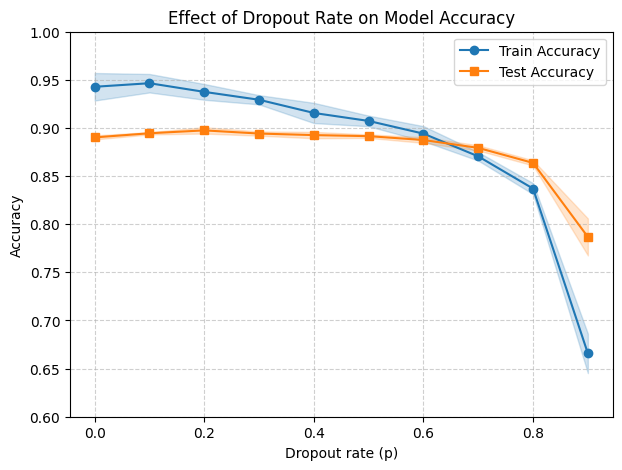

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data (from latest table, mean ± std, converted to decimals)
p = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
train_acc_mean = np.array([94.28, 94.65, 93.75, 92.93, 91.56, 90.73, 89.41, 87.05, 83.70, 66.58]) / 100
train_acc_std  = np.array([1.43, 0.96, 0.82, 0.48, 1.05, 0.55, 0.78, 0.44, 0.57, 2.05]) / 100
test_acc_mean  = np.array([89.02, 89.45, 89.75, 89.42, 89.26, 89.15, 88.75, 87.93, 86.37, 78.68]) / 100
test_acc_std   = np.array([0.21, 0.12, 0.33, 0.22, 0.33, 0.18, 0.30, 0.27, 0.27, 1.92]) / 100

# Plot
plt.figure(figsize=(7, 5))
plt.plot(p, train_acc_mean, marker='o', color='tab:blue', label='Train Accuracy')
plt.fill_between(p,
                 train_acc_mean - train_acc_std,
                 train_acc_mean + train_acc_std,
                 color='tab:blue', alpha=0.2)

plt.plot(p, test_acc_mean, marker='s', color='tab:orange', label='Test Accuracy')
plt.fill_between(p,
                 test_acc_mean - test_acc_std,
                 test_acc_mean + test_acc_std,
                 color='tab:orange', alpha=0.2)

# Labels and formatting
plt.xlabel('Dropout rate (p)')
plt.ylabel('Accuracy')
plt.title('Effect of Dropout Rate on Model Accuracy')
plt.ylim(0.6, 1.0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


In [66]:
# Batch Norm
import torch.nn as nn

class MLPWithBatchNorm(nn.Module):
    def __init__(self, hidden_layers=[512, 256, 128], activation_fn=nn.ReLU):
        super().__init__()
        layers = []
        in_features = 28 * 28

        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(in_features, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(activation_fn())
            in_features = hidden_dim

        layers.append(nn.Linear(in_features, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = torch.flatten(x, 1)
        return self.model(x)


In [65]:
# Batch Norm

wds = np.logspace(-1, -4, num = 7)
for wd in wds:
  print("Batch norm with alpha:", wd)
  train_pipeline_stats(model_class = MLPWithBatchNorm, optimizer_params={"lr":1e-3, "weight_decay": wd})
  print("No batch norm with alpha:", wd)
  train_pipeline_stats(model_class = NeuralNetwork, optimizer_params={"lr":1e-3, "weight_decay": wd})

Batch norm with alpha: 0.1
=== Training Summary over 5 runs ===
Training Accuracy: 94.36% ± 1.39%
Testing Accuracy: 88.89% ± 0.21%
Validation Score: 89.36% ± 0.19%
Training Time: 40.70s ± 13.25s
N_Iter: 16.8 ± 8.9
No batch norm with alpha: 0.1
=== Training Summary over 5 runs ===
Training Accuracy: 93.95% ± 0.72%
Testing Accuracy: 89.33% ± 0.20%
Validation Score: 89.77% ± 0.14%
Training Time: 43.19s ± 7.54s
N_Iter: 26.0 ± 6.4
Batch norm with alpha: 0.03162277660168379
=== Training Summary over 5 runs ===
Training Accuracy: 94.96% ± 1.99%
Testing Accuracy: 88.91% ± 0.34%
Validation Score: 89.56% ± 0.23%
Training Time: 41.95s ± 16.43s
N_Iter: 17.8 ± 11.1
No batch norm with alpha: 0.03162277660168379
=== Training Summary over 5 runs ===
Training Accuracy: 93.73% ± 0.63%
Testing Accuracy: 89.18% ± 0.28%
Validation Score: 89.87% ± 0.20%
Training Time: 35.47s ± 3.60s
N_Iter: 19.6 ± 3.2
Batch norm with alpha: 0.01
=== Training Summary over 5 runs ===
Training Accuracy: 94.55% ± 2.38%
Testing 

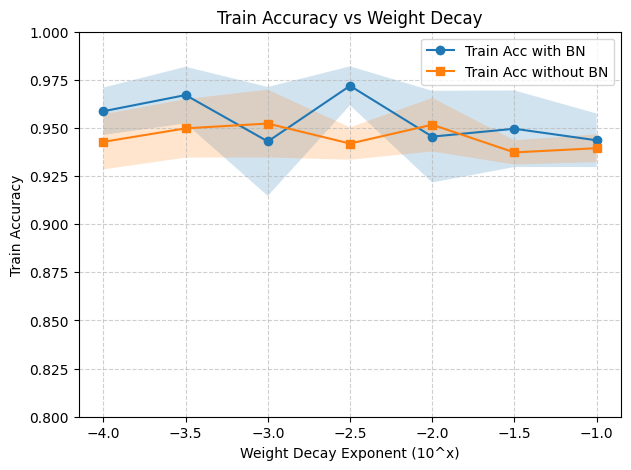

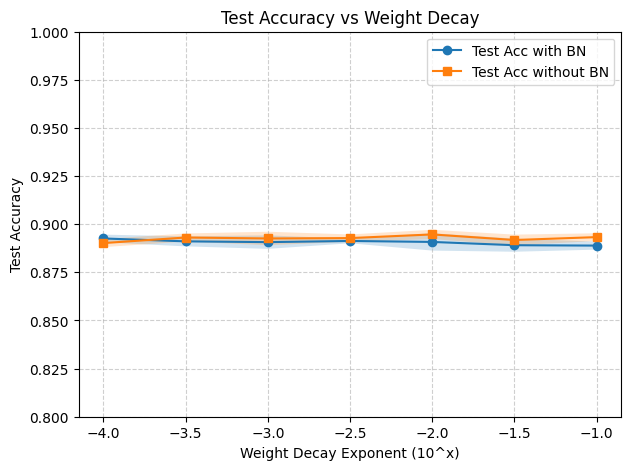

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Data (from latest table)
alpha_exp = np.array([-1, -1.5, -2, -2.5, -3, -3.5, -4])

# === Train Accuracy (mean, decimal) ===
train_bn = np.array([0.9436, 0.9496, 0.9455, 0.9719, 0.9430, 0.9671, 0.9587])
train_no_bn = np.array([0.9395, 0.9373, 0.9517, 0.9419, 0.9523, 0.9498, 0.9428])

# === Train Accuracy (std, decimal) ===
train_bn_std = np.array([0.0139, 0.0199, 0.0238, 0.0101, 0.0283, 0.0147, 0.0123])
train_no_bn_std = np.array([0.0072, 0.0063, 0.0139, 0.0084, 0.0176, 0.0152, 0.0143])

# === Test Accuracy (mean, decimal) ===
test_bn = np.array([0.8889, 0.8891, 0.8908, 0.8913, 0.8907, 0.8911, 0.8926])
test_no_bn = np.array([0.8933, 0.8918, 0.8947, 0.8928, 0.8926, 0.8931, 0.8902])

# === Test Accuracy (std, decimal) ===
test_bn_std = np.array([0.0021, 0.0034, 0.0045, 0.0012, 0.0035, 0.0026, 0.0020])
test_no_bn_std = np.array([0.0020, 0.0028, 0.0024, 0.0019, 0.0035, 0.0021, 0.0021])

# === Plot Train Accuracy ===
plt.figure(figsize=(7,5))
plt.plot(alpha_exp, train_bn, marker='o', label='Train Acc with BN')
plt.fill_between(alpha_exp, train_bn - train_bn_std, train_bn + train_bn_std, alpha=0.2)
plt.plot(alpha_exp, train_no_bn, marker='s', label='Train Acc without BN')
plt.fill_between(alpha_exp, train_no_bn - train_no_bn_std, train_no_bn + train_no_bn_std, alpha=0.2)
plt.ylim(0.8, 1)
plt.xlabel('Weight Decay Exponent (10^x)')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy vs Weight Decay')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# === Plot Test Accuracy ===
plt.figure(figsize=(7,5))
plt.plot(alpha_exp, test_bn, marker='o', label='Test Acc with BN')
plt.fill_between(alpha_exp, test_bn - test_bn_std, test_bn + test_bn_std, alpha=0.2)
plt.plot(alpha_exp, test_no_bn, marker='s', label='Test Acc without BN')
plt.fill_between(alpha_exp, test_no_bn - test_no_bn_std, test_no_bn + test_no_bn_std, alpha=0.2)
plt.ylim(0.8, 1)
plt.xlabel('Weight Decay Exponent (10^x)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Weight Decay')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [68]:
import torch
from torch import nn

class SimpleCNN(nn.Module):
    def __init__(self, out_ch=32, k=3, pool_size=2):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, out_ch, k, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(pool_size),

            nn.Conv2d(out_ch, out_ch * 2, k, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(pool_size)
        )

        with torch.no_grad():
            dummy = torch.zeros(1, 1, 28, 28)
            dummy_out = self.conv_layers(dummy)
            self.flatten_dim = dummy_out.view(1, -1).size(1)

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flatten_dim, out_ch * 4),
            nn.ReLU(),
            nn.Linear(out_ch * 4, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


Early stopping at epoch 19
Train Accuracy: 0.98192
Best epoch: 19
Validation Score: 0.9221
Training Time: 51.025946855545044 seconds


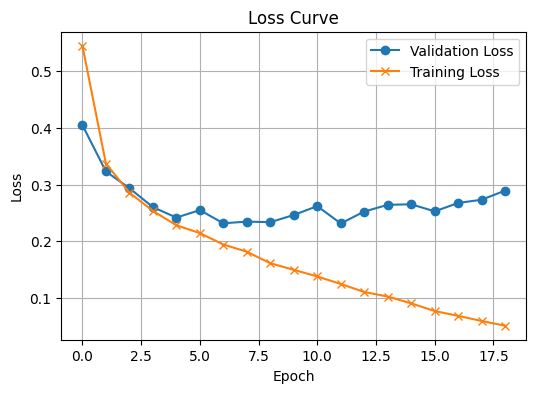

Test Accuracy: 0.9142


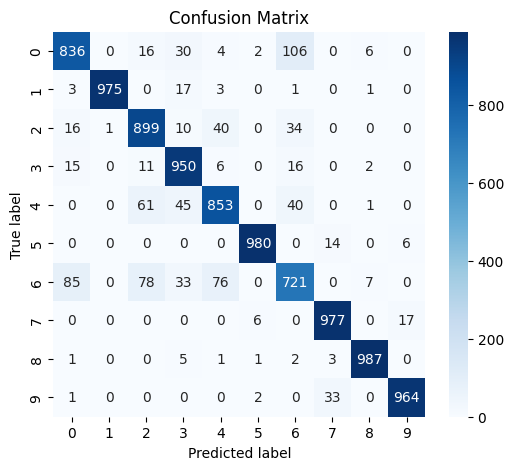

{'training accuracy': 0.98192,
 'testing accuracy': 0.9142,
 'validation score': 0.9221,
 'confusion_matrix': array([[836,   0,  16,  30,   4,   2, 106,   0,   6,   0],
        [  3, 975,   0,  17,   3,   0,   1,   0,   1,   0],
        [ 16,   1, 899,  10,  40,   0,  34,   0,   0,   0],
        [ 15,   0,  11, 950,   6,   0,  16,   0,   2,   0],
        [  0,   0,  61,  45, 853,   0,  40,   0,   1,   0],
        [  0,   0,   0,   0,   0, 980,   0,  14,   0,   6],
        [ 85,   0,  78,  33,  76,   0, 721,   0,   7,   0],
        [  0,   0,   0,   0,   0,   6,   0, 977,   0,  17],
        [  1,   0,   0,   5,   1,   1,   2,   3, 987,   0],
        [  1,   0,   0,   0,   0,   2,   0,  33,   0, 964]]),
 'training_time': 51.025946855545044,
 'n_iter': 19}

In [69]:
train_pipeline(model_class=SimpleCNN)

In [70]:
for i in range(1,11):
  print("CNN with k =", i)
  train_pipeline_stats(model_class = SimpleCNN, model_params = {'k': i})

CNN with k = 1
=== Training Summary over 5 runs ===
Training Accuracy: 92.15% ± 0.60%
Testing Accuracy: 88.93% ± 0.37%
Validation Score: 89.59% ± 0.14%
Training Time: 80.36s ± 10.49s
N_Iter: 31.2 ± 5.5
CNN with k = 2
=== Training Summary over 5 runs ===
Training Accuracy: 96.91% ± 1.09%
Testing Accuracy: 91.37% ± 0.08%
Validation Score: 91.89% ± 0.11%
Training Time: 52.92s ± 8.11s
N_Iter: 21.8 ± 4.8
CNN with k = 3
=== Training Summary over 5 runs ===
Training Accuracy: 97.62% ± 0.90%
Testing Accuracy: 91.94% ± 0.13%
Validation Score: 92.43% ± 0.13%
Training Time: 49.62s ± 4.15s
N_Iter: 18.4 ± 2.4
CNN with k = 4
=== Training Summary over 5 runs ===
Training Accuracy: 96.70% ± 1.19%
Testing Accuracy: 91.66% ± 0.13%
Validation Score: 92.34% ± 0.09%
Training Time: 41.99s ± 6.20s
N_Iter: 14.8 ± 3.8
CNN with k = 5
=== Training Summary over 5 runs ===
Training Accuracy: 96.69% ± 1.39%
Testing Accuracy: 91.31% ± 0.17%
Validation Score: 92.00% ± 0.06%
Training Time: 49.78s ± 9.31s
N_Iter: 17.0 

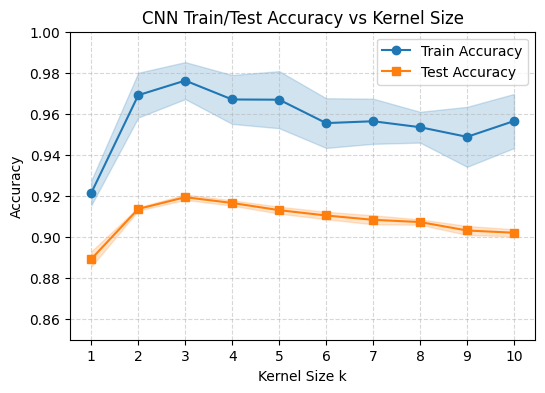

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Data (updated with new CNN results)
k = np.array([1,2,3,4,5,6,7,8,9,10])

# Train/Test accuracy (mean, decimal)
train_acc = np.array([0.9215, 0.9691, 0.9762, 0.9670, 0.9669, 0.9555, 0.9564, 0.9535, 0.9488, 0.9565])
test_acc  = np.array([0.8893, 0.9137, 0.9194, 0.9166, 0.9131, 0.9105, 0.9084, 0.9073, 0.9032, 0.9021])

# Train/Test accuracy (std, decimal)
train_std = np.array([0.0060, 0.0109, 0.0090, 0.0119, 0.0139, 0.0121, 0.0110, 0.0075, 0.0146, 0.0132])
test_std  = np.array([0.0037, 0.0008, 0.0013, 0.0013, 0.0017, 0.0018, 0.0022, 0.0013, 0.0022, 0.0017])

# Plot
plt.figure(figsize=(6,4))
plt.plot(k, train_acc, marker='o', color='tab:blue', label='Train Accuracy')
plt.fill_between(k, train_acc - train_std, train_acc + train_std, color='tab:blue', alpha=0.2)

plt.plot(k, test_acc, marker='s', color='tab:orange', label='Test Accuracy')
plt.fill_between(k, test_acc - test_std, test_acc + test_std, color='tab:orange', alpha=0.2)

plt.xlabel('Kernel Size k')
plt.ylabel('Accuracy')
plt.title('CNN Train/Test Accuracy vs Kernel Size')
plt.xticks(k)
plt.ylim(0.85, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


CNN with out_ch = 4
Early stopping at epoch 70
Train Accuracy: 0.90532
Best epoch: 70
Validation Score: 0.8925
Training Time: 130.78594255447388 seconds


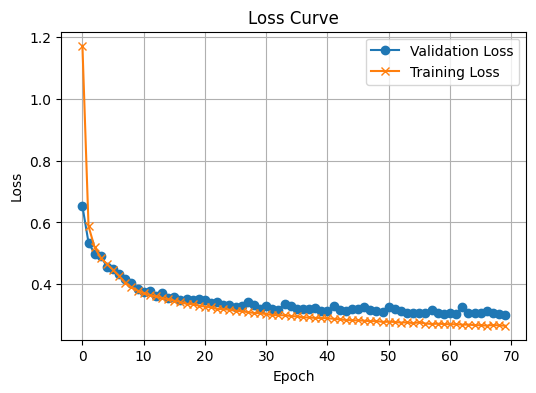

Test Accuracy: 0.8845


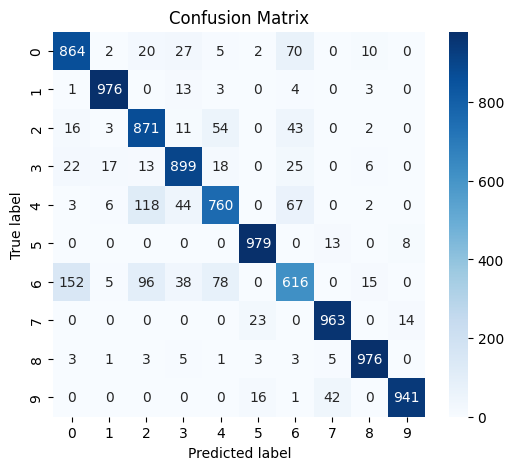

CNN with out_ch = 8
Early stopping at epoch 35
Train Accuracy: 0.93488
Best epoch: 35
Validation Score: 0.9134
Training Time: 63.241419076919556 seconds


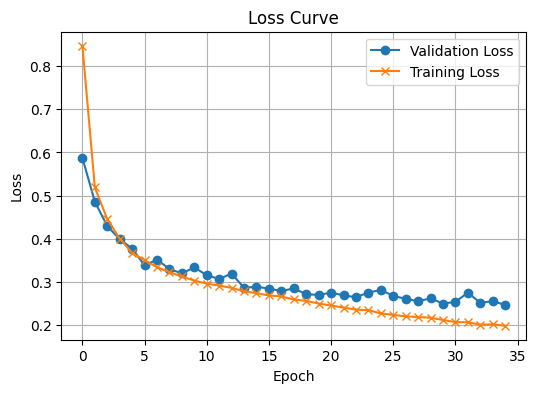

Test Accuracy: 0.9073


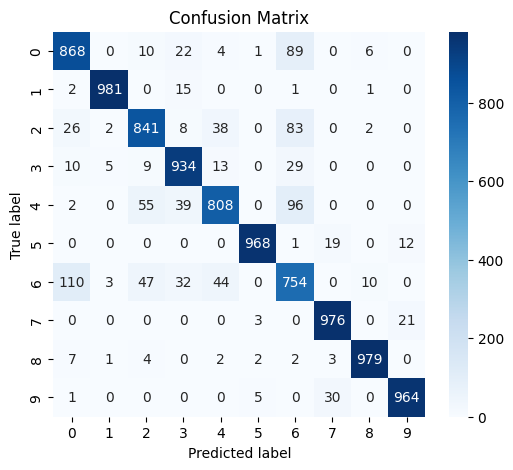

CNN with out_ch = 16
Early stopping at epoch 19
Train Accuracy: 0.96274
Best epoch: 19
Validation Score: 0.9193
Training Time: 40.92878746986389 seconds


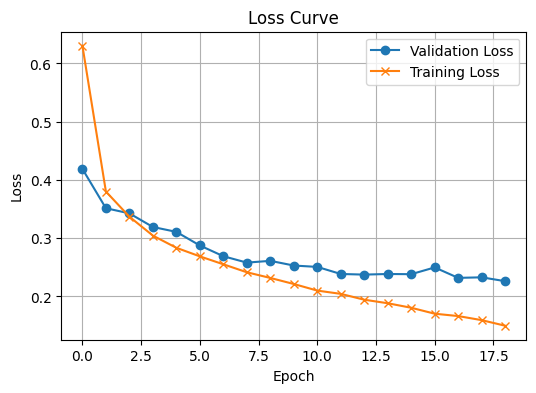

Test Accuracy: 0.9089


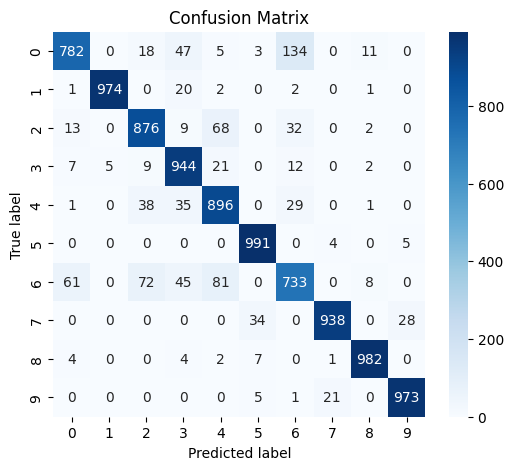

CNN with out_ch = 32
Early stopping at epoch 10
Train Accuracy: 0.97818
Best epoch: 10
Validation Score: 0.921
Training Time: 33.2546763420105 seconds


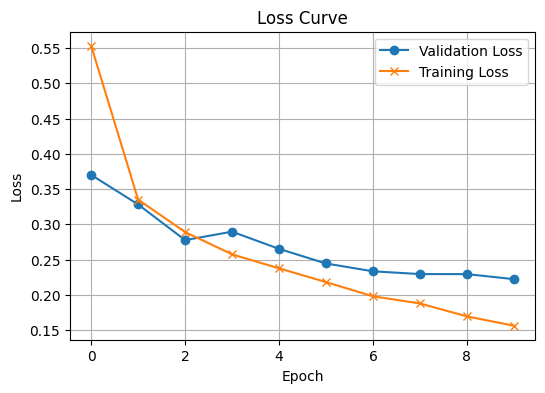

Test Accuracy: 0.9172


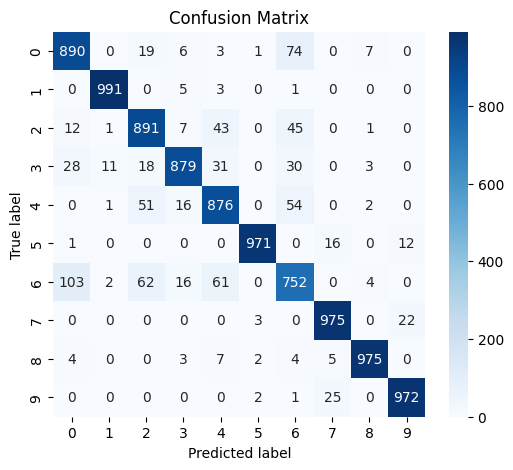

CNN with out_ch = 64
Early stopping at epoch 7
Train Accuracy: 0.99012
Best epoch: 7
Validation Score: 0.9219
Training Time: 49.47463798522949 seconds


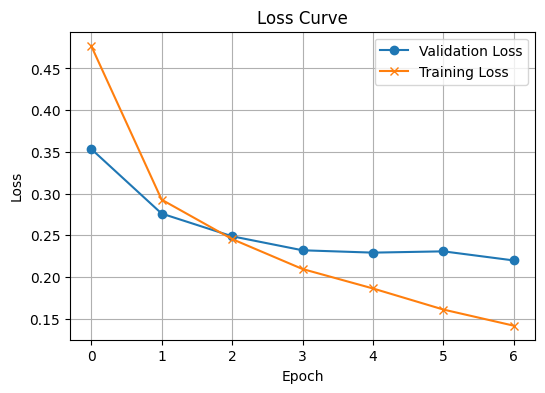

Test Accuracy: 0.9175


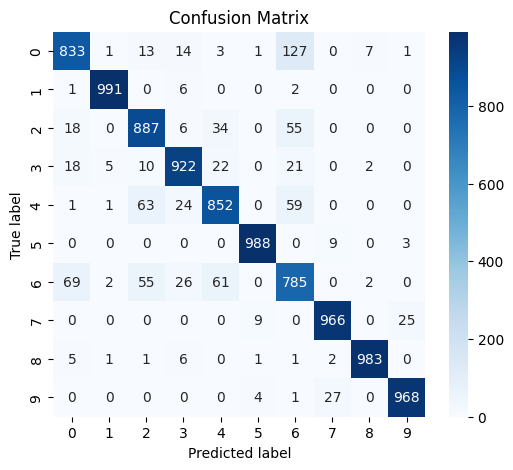

CNN with out_ch = 128
Early stopping at epoch 5
Train Accuracy: 0.99184
Best epoch: 5
Validation Score: 0.922
Training Time: 98.42986488342285 seconds


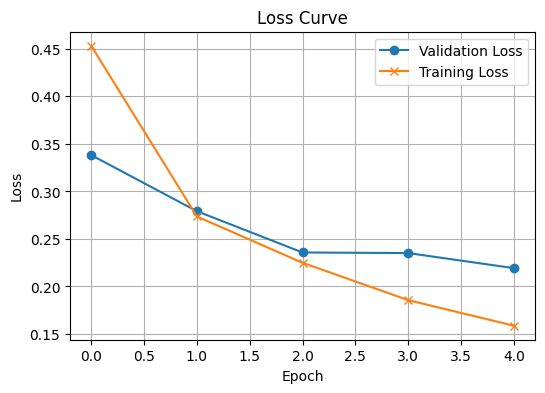

Test Accuracy: 0.9214


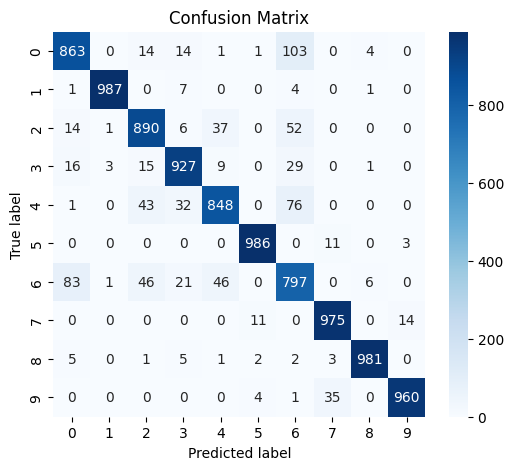

In [10]:
# CNN with diffrent output channel

for i in range(2, 8):
  print("CNN with out_ch =", 2**i)
  train_pipeline(model_class = SimpleCNN, model_params = {'out_ch': 2**i})

In [ ]:
# CNN with diffrent output channel

for i in range(2, 8):
  print("CNN with out_ch =", 2**i)
  train_pipeline_stats(model_class = SimpleCNN, model_params = {'out_ch': 2**i})

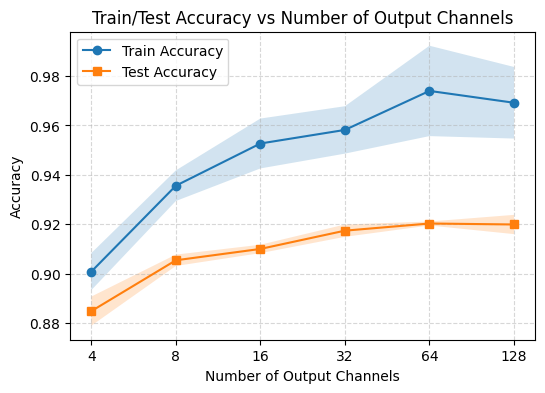

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Data
channels = np.array([4, 8, 16, 32, 64, 128])
train_acc = np.array([0.9008, 0.9356, 0.9527, 0.9582, 0.9740, 0.9692])
test_acc  = np.array([0.8848, 0.9054, 0.9100, 0.9174, 0.9203, 0.9199])

train_std = np.array([0.0075, 0.0062, 0.0101, 0.0096, 0.0183, 0.0145])
test_std  = np.array([0.0059, 0.0023, 0.0017, 0.0025, 0.0008, 0.0039])

# Plot
plt.figure(figsize=(6,4))
plt.plot(channels, train_acc, marker='o', label='Train Accuracy')
plt.fill_between(channels, train_acc - train_std, train_acc + train_std, alpha=0.2)
plt.plot(channels, test_acc, marker='s', label='Test Accuracy')
plt.fill_between(channels, test_acc - test_std, test_acc + test_std, alpha=0.2)

plt.xscale('log', base=2)
plt.xticks(channels, labels=[str(c) for c in channels])
plt.xlabel('Number of Output Channels')
plt.ylabel('Accuracy')
plt.title('Train/Test Accuracy vs Number of Output Channels')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


CNN with pool_size = 1
Early stopping at epoch 3
Train Accuracy: 0.99602
Best epoch: 3
Validation Score: 0.9071
Training Time: 62.063600301742554 seconds


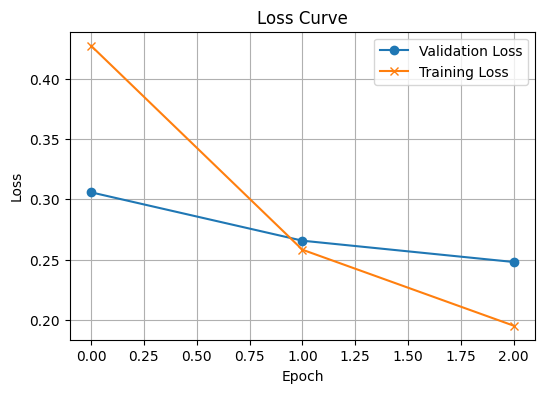

Test Accuracy: 0.9101


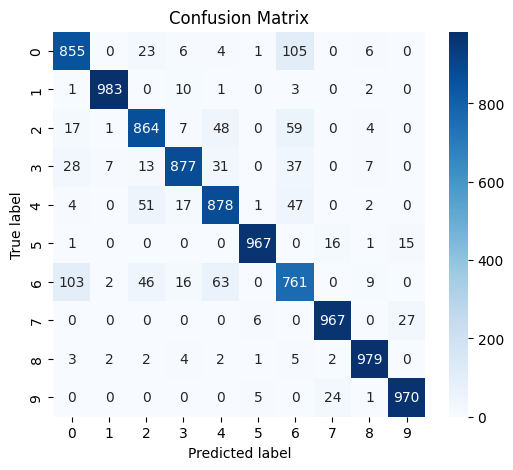

CNN with pool_size = 2
Early stopping at epoch 10
Train Accuracy: 0.97882
Best epoch: 10
Validation Score: 0.9198
Training Time: 34.23833107948303 seconds


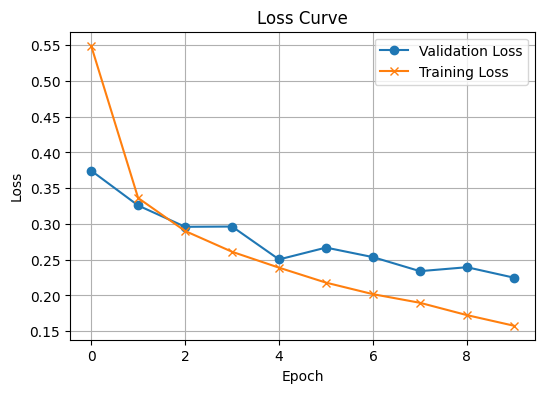

Test Accuracy: 0.9177


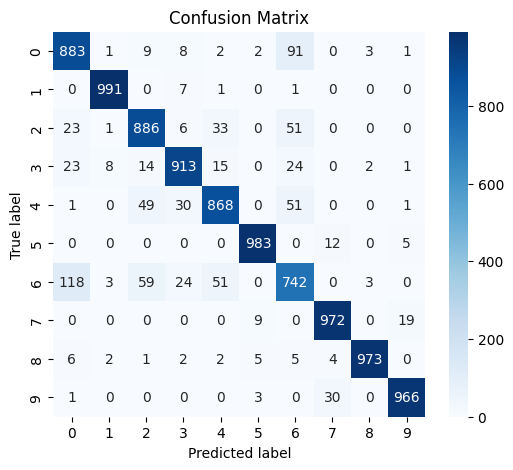

CNN with pool_size = 3
Early stopping at epoch 17
Train Accuracy: 0.95932
Best epoch: 17
Validation Score: 0.9174
Training Time: 41.42466425895691 seconds


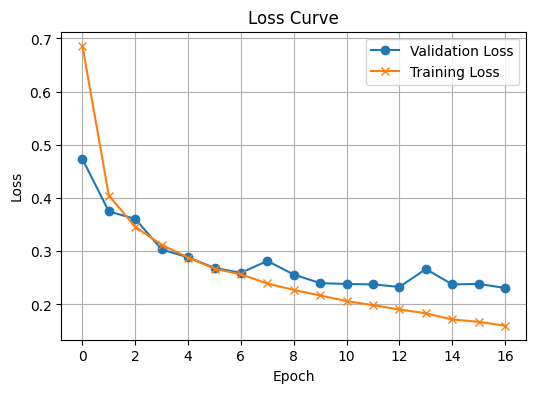

Test Accuracy: 0.9143


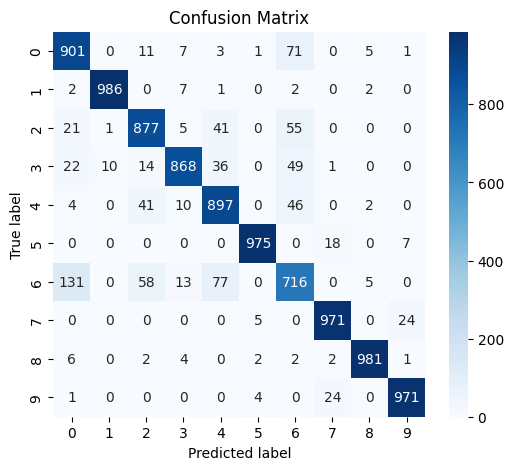

CNN with pool_size = 4
Early stopping at epoch 23
Train Accuracy: 0.91004
Best epoch: 23
Validation Score: 0.883
Training Time: 47.84422540664673 seconds


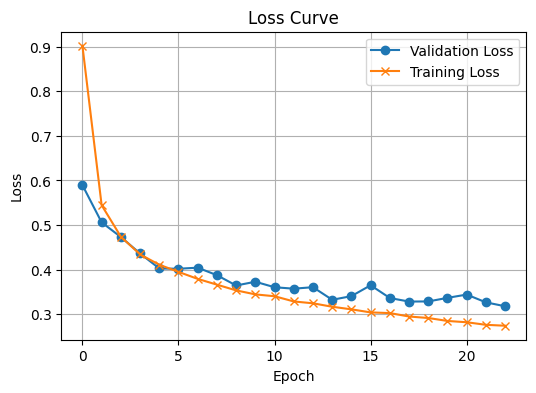

Test Accuracy: 0.8805


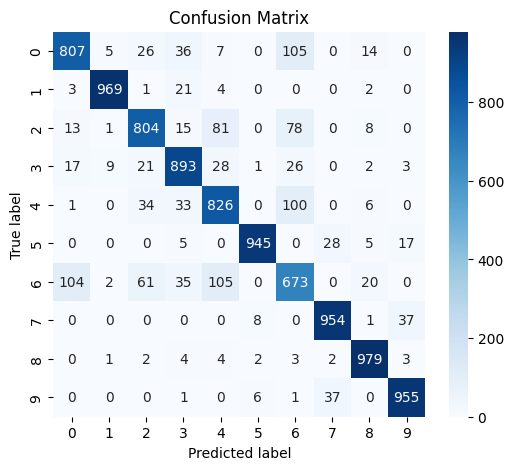

CNN with pool_size = 5
Early stopping at epoch 36
Train Accuracy: 0.9374
Best epoch: 36
Validation Score: 0.9064
Training Time: 67.74483752250671 seconds


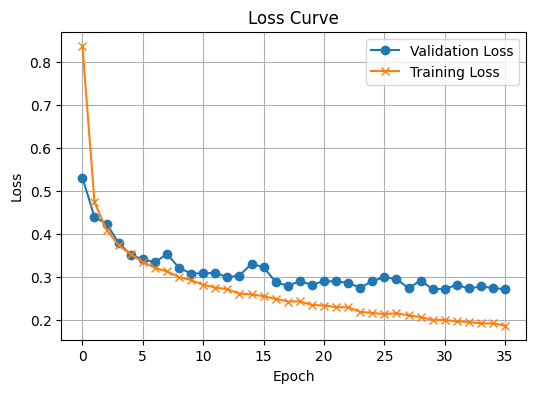

Test Accuracy: 0.8963


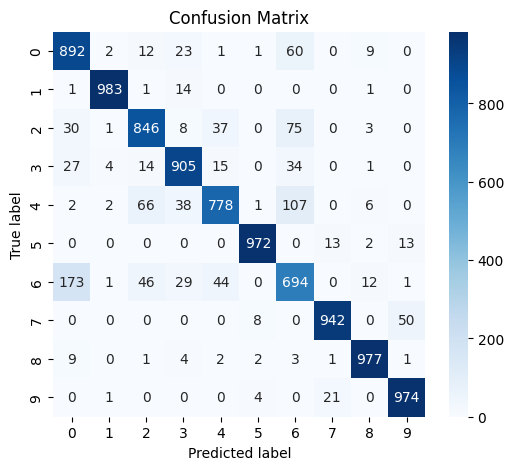

In [12]:
# Different pool size
for i in range(1, 6):
  print("CNN with pool_size =", i)
  train_pipeline(model_class = SimpleCNN, model_params = {'pool_size': i})

In [ ]:
# Different pool size
for i in range(1, 6):
  print("CNN with pool_size =", i)
  train_pipeline_stats(model_class = SimpleCNN, model_params = {'pool_size': i})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

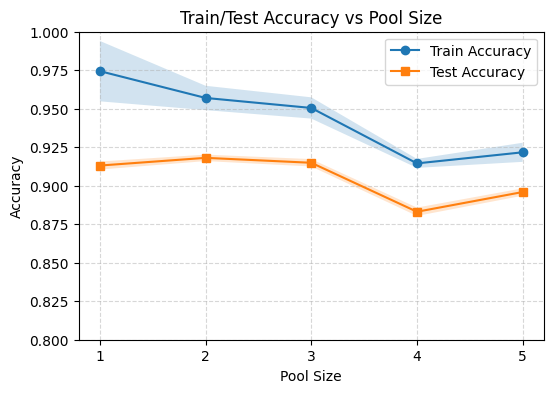

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data
pool_size = np.array([1, 2, 3, 4, 5])

# Train accuracy (mean, decimal)
train_acc = np.array([0.9744, 0.9570, 0.9505, 0.9145, 0.9217])
# Train accuracy (std, decimal)
train_std = np.array([0.0196, 0.0079, 0.0069, 0.0029, 0.0062])

# Test accuracy (mean, decimal)
test_acc = np.array([0.9131, 0.9181, 0.9149, 0.8831, 0.8959])
# Test accuracy (std, decimal)
test_std = np.array([0.0026, 0.0021, 0.0024, 0.0027, 0.0024])

plt.figure(figsize=(6,4))

# Plot train accuracy
plt.plot(pool_size, train_acc, marker='o', label='Train Accuracy')
plt.fill_between(pool_size, train_acc - train_std, train_acc + train_std, alpha=0.2)

# Plot test accuracy
plt.plot(pool_size, test_acc, marker='s', label='Test Accuracy')
plt.fill_between(pool_size, test_acc - test_std, test_acc + test_std, alpha=0.2)

plt.xlabel('Pool Size')
plt.ylabel('Accuracy')
plt.title('Train/Test Accuracy vs Pool Size')
plt.xticks(pool_size)
plt.ylim(0.8, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt


In [75]:
class SimpleCNNdropout(nn.Module):
    def __init__(self, out_ch=64, k=3, pool_size=2, p=0.5):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, out_ch, k, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(pool_size),

            nn.Conv2d(out_ch, out_ch * 2, k, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(pool_size)
        )


        with torch.no_grad():
            dummy = torch.zeros(1, 1, 28, 28)
            dummy_out = self.conv_layers(dummy)
            self.flatten_dim = dummy_out.view(1, -1).size(1)

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flatten_dim, out_ch * 4),
            nn.ReLU(),
            nn.Dropout(p=p),
            nn.Linear(out_ch * 4, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


In [76]:
train_pipeline_stats(model_class = SimpleCNNdropout, model_params={'p': 0.2})


=== Training Summary over 5 runs ===
Training Accuracy: 97.80% ± 0.81%
Testing Accuracy: 92.31% ± 0.03%
Validation Score: 92.89% ± 0.04%
Training Time: 76.65s ± 14.98s
N_Iter: 15.2 ± 5.0


{'training accuracy': (np.float64(0.978012), np.float64(0.008139283506550209)),
 'testing accuracy': (np.float64(0.9231), np.float64(0.00034058772731851655)),
 'validation score': (np.float64(0.92892), np.float64(0.00041665333311999313)),
 'training time': (np.float64(76.65335955619813),
  np.float64(14.975105763643267)),
 'n_iter': (np.float64(15.2), np.float64(4.955804677345546))}

In [77]:
train_pipeline_stats(model_class = SimpleCNNdropout, model_params={'p': 0.1})

=== Training Summary over 5 runs ===
Training Accuracy: 98.42% ± 0.95%
Testing Accuracy: 92.49% ± 0.20%
Validation Score: 92.81% ± 0.13%
Training Time: 85.65s ± 23.38s
N_Iter: 18.2 ± 7.7


{'training accuracy': (np.float64(0.984208), np.float64(0.00950337708396337)),
 'testing accuracy': (np.float64(0.92486), np.float64(0.0020105720578979676)),
 'validation score': (np.float64(0.9280799999999999),
  np.float64(0.0012639620247460205)),
 'training time': (np.float64(85.65443029403687),
  np.float64(23.375126309113192)),
 'n_iter': (np.float64(18.2), np.float64(7.678541528180987))}

In [78]:
train_pipeline_stats(model_class = SimpleCNNdropout, model_params={'p': 0.3})

=== Training Summary over 5 runs ===
Training Accuracy: 97.40% ± 0.77%
Testing Accuracy: 92.36% ± 0.08%
Validation Score: 92.96% ± 0.09%
Training Time: 75.93s ± 8.72s
N_Iter: 15.0 ± 2.9


{'training accuracy': (np.float64(0.9740279999999999),
  np.float64(0.007737923235597509)),
 'testing accuracy': (np.float64(0.92362), np.float64(0.0007573638491504629)),
 'validation score': (np.float64(0.92958), np.float64(0.0008704022058795307)),
 'training time': (np.float64(75.92561283111573),
  np.float64(8.717442741987538)),
 'n_iter': (np.float64(15.0), np.float64(2.898275349237888))}

In [79]:
train_pipeline_stats(model_class = SimpleCNNdropout, model_params={'p': 0.4})

=== Training Summary over 5 runs ===
Training Accuracy: 98.03% ± 0.89%
Testing Accuracy: 92.46% ± 0.23%
Validation Score: 93.06% ± 0.18%
Training Time: 92.06s ± 13.25s
N_Iter: 20.2 ± 4.3


{'training accuracy': (np.float64(0.98026), np.float64(0.008938259338372317)),
 'testing accuracy': (np.float64(0.9246399999999999),
  np.float64(0.0023448667339531514)),
 'validation score': (np.float64(0.93062), np.float64(0.0017780888616714208)),
 'training time': (np.float64(92.06021232604981),
  np.float64(13.245798505967578)),
 'n_iter': (np.float64(20.2), np.float64(4.261455150532504))}

In [80]:
train_pipeline_stats(model_class = SimpleCNNdropout, model_params={'p': 0.5})

=== Training Summary over 5 runs ===
Training Accuracy: 97.45% ± 1.06%
Testing Accuracy: 92.57% ± 0.11%
Validation Score: 93.06% ± 0.13%
Training Time: 93.98s ± 19.36s
N_Iter: 21.0 ± 6.4


{'training accuracy': (np.float64(0.974532), np.float64(0.01062999228598027)),
 'testing accuracy': (np.float64(0.9256599999999999),
  np.float64(0.0010613199329137166)),
 'validation score': (np.float64(0.93062), np.float64(0.0013120975573485418)),
 'training time': (np.float64(93.98182592391967),
  np.float64(19.355322711363616)),
 'n_iter': (np.float64(21.0), np.float64(6.418722614352485))}

Early stopping at epoch 17
Train Accuracy: 0.96718
Best epoch: 17
Validation Score: 0.9298
Training Time: 82.50870108604431 seconds


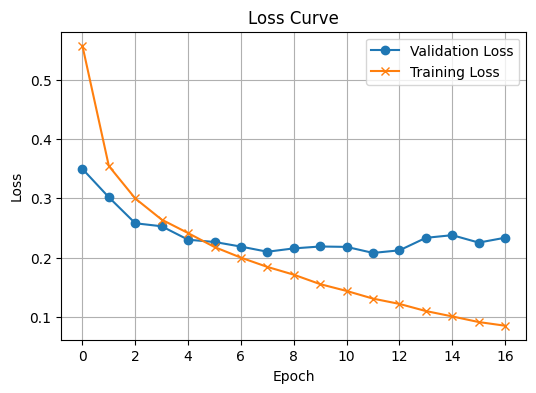

Test Accuracy: 0.9249


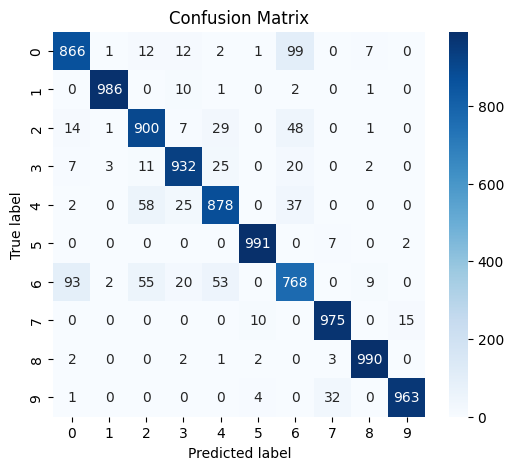

{'training accuracy': 0.96718,
 'testing accuracy': 0.9249,
 'validation score': 0.9298,
 'confusion_matrix': array([[866,   1,  12,  12,   2,   1,  99,   0,   7,   0],
        [  0, 986,   0,  10,   1,   0,   2,   0,   1,   0],
        [ 14,   1, 900,   7,  29,   0,  48,   0,   1,   0],
        [  7,   3,  11, 932,  25,   0,  20,   0,   2,   0],
        [  2,   0,  58,  25, 878,   0,  37,   0,   0,   0],
        [  0,   0,   0,   0,   0, 991,   0,   7,   0,   2],
        [ 93,   2,  55,  20,  53,   0, 768,   0,   9,   0],
        [  0,   0,   0,   0,   0,  10,   0, 975,   0,  15],
        [  2,   0,   0,   2,   1,   2,   0,   3, 990,   0],
        [  1,   0,   0,   0,   0,   4,   0,  32,   0, 963]]),
 'training_time': 82.50870108604431,
 'n_iter': 17}

In [82]:
train_pipeline(model_class = SimpleCNNdropout, model_params={'p': 0.5})

In [81]:
train_pipeline_stats(model_class = SimpleCNNdropout, model_params={'p': 0.6})

=== Training Summary over 5 runs ===
Training Accuracy: 95.93% ± 0.79%
Testing Accuracy: 92.49% ± 0.04%
Validation Score: 93.05% ± 0.05%
Training Time: 81.81s ± 10.24s
N_Iter: 17.0 ± 3.3


{'training accuracy': (np.float64(0.9593399999999999),
  np.float64(0.007855973523376986)),
 'testing accuracy': (np.float64(0.92494), np.float64(0.0004454211490263896)),
 'validation score': (np.float64(0.9305399999999999),
  np.float64(0.0005276362383309285)),
 'training time': (np.float64(81.81401476860046),
  np.float64(10.244991245756923)),
 'n_iter': (np.float64(17.0), np.float64(3.3466401061363023))}